# Exploratory Data Analysis

In [1]:
pip install numpy pandas matplotlib seaborn scikit-learn nbconvert pyppeteer

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd # dataframes
import numpy as np # convert to numeric values for inputs to model 
import matplotlib as plt # used for visualizations (graphs, heatmaps, etc)

## Convert data to utf-8 encoding from ANSI

In [3]:
# Each dataframe is set to a file from the data folder. 

df_accounts = pd.read_csv('data/Accounts.csv', sep=',', encoding='latin-1', low_memory=False)
df_distributor = pd.read_csv('data/Distributor.csv', sep=',', encoding='latin-1', low_memory=False)
df_order_data = pd.read_csv('data/order_data.csv', sep=',', encoding='latin-1', low_memory=False)
df_part_attributes = pd.read_csv('data/PartAttributes.csv',sep=',', encoding='latin-1', low_memory=False)

# this has on_bad_lines = skip, because some rows in the dataset were creating errors when reading
df_parts = pd.read_csv('data/Parts.csv', sep='|', encoding='latin-1', low_memory=False, on_bad_lines='skip')


df_pos_data = pd.read_csv('data/pos_data.csv', sep=',', encoding='latin-1', low_memory=False)
df_price_point = pd.read_csv('data/Price_point.csv', sep=',', encoding='latin-1', low_memory=False)
df_price_point_field = pd.read_csv('data/price_point_field.csv',sep=',', encoding='latin-1', low_memory=False)
df_pricing = pd.read_csv('data/Pricing.csv', sep=',', encoding='latin-1', low_memory=False)
df_quote_item = pd.read_csv('data/QuoteItem.csv', sep=',', encoding='latin-1', low_memory=False)
df_quotes = pd.read_csv('data/Quotes.csv', sep=',', encoding='latin-1', low_memory=False)


In [4]:
print(df_accounts['OID'])

0          2799360
1          2799364
2          2799365
3          2799366
4          2799370
            ...   
1689862    2012681
1689863    2012688
1689864    2012697
1689865    2012702
1689866    2012711
Name: OID, Length: 1689867, dtype: int64


### List all columns in all .csv files to find relationships

In [5]:
dataframes_list = [df_accounts, df_distributor, df_order_data, df_part_attributes, df_parts, df_pos_data, df_price_point, df_price_point_field, df_pricing, df_quote_item, df_quotes]
dataframes_names = ["df_accounts", "df_distributor", "df_order_data", "df_part_attributes", "df_parts", "df_post_data", "df_price_point", "df_price_point_field", "df_pricing", "df_quote_item", "df_quotes"]

In [6]:
count = 0
for df in dataframes_list:
    print(dataframes_names[count])
    print(df.columns.tolist()) 
    print("\n")
    count += 1


df_accounts
['OID', 'OBSOLETE_FLAG', 'DISPLAY_NAME', 'LOCATION', 'LEGAL_NAME', 'ACCOUNT_NUM', 'TYPE', 'STATUS', 'DISTRIBUTOR_OID', 'DISTI_NAME', 'GEOGRAPHY_OID', 'GEO_NAME', 'CUST_CATEGORY_OID', 'CUST_CATE_NAME', 'DEFAULT_BILL_TO_ADDRESS_OID', 'BILL_TO_ADDRESS1', 'DEFAULT_SHIP_TO_ADDRESS_OID', 'SHIP_TO_ADDRESS1', 'SHIPMENT_METHOD_OID', 'SHIP_MTH_NAME', 'PRICING_GROUP_TYPE', 'PRICING_REGION_OID', 'PR_REGION', 'CUSTOMER_LEVEL_OID', 'TYPE_KEY', 'PARENT_DISPLAY_NAME', 'IS_BLANKET', 'CUSTOM_FIELD1', 'CUSTOM_FIELD2', 'CUSTOM_FIELD3', 'CUSTOM_FIELD4', 'CUSTOM_FIELD5', 'CUSTOM_FIELD6', 'CUSTOM_FIELD7', 'CUSTOM_FIELD8', 'CUSTOM_FIELD9', 'CUSTOM_FIELD10']


df_distributor
['OID', ' OBSOLETE_FLAG', ' NAME', ' DIST_CATEGORY_OID', ' DIST_CATE_NAME', ' STATUS', ' CAN_DEBIT', ' IS_STOCKING_REP', ' DISTI_CORPORATE_ID_OID', ' DISTI_CORP_NAME', ' PRICING_REGION_OID', ' PR_REGION', ' CAN_SPECIAL_BUY', ' CAN_BLANKET', ' CUSTOM_FIELD1', ' CUSTOM_FIELD2', ' CUSTOM_FIELD3', ' CUSTOM_FIELD4', ' CUSTOM_FIELD5'

## Combining Datasets

- see quantity relative to MPN in GEO area (mising data)


#### data availability problems with this

In [7]:
# merge quotes OID with MPN and PRICE, and then location to see how it's priced. then sort by location. 
#df_merge_quotedata = pd.merge(df_quotes, df_post_data, on=['OID'], suffixes=('_quotes', '_postdata'))
df_merge_quotedata = pd.merge(df_quotes, df_price_point, on=['OID'], suffixes=('_quotes2', '_pricepoint'))
df_merge_quotedata = pd.merge(df_merge_quotedata, df_accounts, on=['OID'], suffixes=('_quotedata', '_accounts'))
print(df_merge_quotedata.head())
df_merge_quotedata = df_merge_quotedata.filter(['DISPLAY_NAME', 'GEO_NAME', 'MPN', 'QUANTITY'])
# can filter broader into GEO_NAME 
print(df_merge_quotedata.head(5))

## here we do not get many values after the filtering.

     OID  OBSOLETE_FLAG_quotes2  CUSTOMER_OID  \
0  50816                      0       1192836   
1  55140                      0       2850714   

             DISPLAY_NAME_quotedata  SALES_CHANNEL  DISTRIBUTOR_OID_quotedata  \
0              vhwaqowewobxzaybbqju              1                        337   
1  IT SUPPLY AND OA COMPANY LIMITED              1                        337   

                       NAME_quotes2  QUOTE_STATUS_OID  PREP_COMPLETE  \
0  ARROW ASIA PAC LIMITED-HK-544821                 0              1   
1  ARROW ASIA PAC LIMITED-HK-544821                 0              1   

   IS_FORWARD  ...  CUSTOM_FIELD1_accounts CUSTOM_FIELD2_accounts  \
0           0  ...                     NaN                    NaN   
1           0  ...                     NaN                    NaN   

   CUSTOM_FIELD3_accounts  CUSTOM_FIELD4_accounts CUSTOM_FIELD5_accounts  \
0                     NaN                     NaN                    NaN   
1                     NaN      

In [8]:
df_merged_accountsorder = pd.DataFrame()


# created a dataframe to merge the accountsa and quotes dataset based on the DISPLAY_NAME, which is the customer name. 
df_merged_accountsorder = pd.merge(df_accounts, df_quotes, on=['DISPLAY_NAME', ], suffixes=('_quoteitem', '_accounts'))

# print out the first 10 and last 10 values of the dataframe
print(df_merged_accountsorder.head(10))
print(df_merged_accountsorder.tail(10))


#print(df_merged_accountsorder.loc[0, ['OID', 'DISPLAY_NAME', 'GEO_NAME', 'MPN']])

   OID_quoteitem  OBSOLETE_FLAG_quoteitem       DISPLAY_NAME  LOCATION  \
0        1785883                        0                 AA        CA   
1        1230621                        0                 AA        CH   
2        1230633                        0                 AA        MY   
3        1230638                        0                 AA        US   
4        1992899                        0                 AA  11217275   
5        1992914                        0                 AA  11461370   
6        1992919                        0                 AA  12094695   
7        1799462                        0  American Tech Inc        FL   
8        1404172                        0  American Tech Inc        US   
9        2192259                        0  American Tech Inc  11092534   

          LEGAL_NAME ACCOUNT_NUM TYPE  STATUS  DISTRIBUTOR_OID_quoteitem  \
0                 AA         NaN  OEM  Active                          0   
1                 AA         NaN 

### Orders by Location, printed out

In [9]:
# simple program to print out all the customers, location, and geographical names based on the Geographical Category.

df_merged_accountsorder_filter = df_merged_accountsorder.filter(['DISPLAY_NAME', 'LOCATION', 'GEO_NAME'])
#print(df_merged_accountsorder_filter)

for geo, group in df_merged_accountsorder_filter.groupby('GEO_NAME'):
    print(f"GEO CATEGORY: {geo}")
    print(group)
    print() 


GEO CATEGORY: APAC
           DISPLAY_NAME  LOCATION GEO_NAME
2                    AA        MY     APAC
5                    AA  11461370     APAC
19                JABIL        MY     APAC
20                JABIL        MY     APAC
21                JABIL        MY     APAC
...                 ...       ...      ...
45570  ARRABON COMPUTER  12669265     APAC
45571  ARRABON COMPUTER  12669265     APAC
45572  ARRABON COMPUTER  12669265     APAC
45573  ARRABON COMPUTER  12669265     APAC
45574        Supermicro  11507167     APAC

[13375 rows x 3 columns]

GEO CATEGORY: ASMO
                                   DISPLAY_NAME  LOCATION GEO_NAME
0                                            AA        CA     ASMO
3                                            AA        US     ASMO
4                                            AA  11217275     ASMO
7                             American Tech Inc        FL     ASMO
8                             American Tech Inc        US     ASMO
...              

### Total orders by Location 

In [10]:
# answers to common business questions
print("Most orders from Asia-Pacific (APAC)")
total_APAC = df_merged_accountsorder_filter.loc[df_merged_accountsorder_filter['GEO_NAME'] == 'APAC', 'DISPLAY_NAME'].value_counts()
print(total_APAC, '\n')
     
print("Most orders from Peoples Republic of China (PROC)")
total_PROC = df_merged_accountsorder_filter.loc[df_merged_accountsorder_filter['GEO_NAME'] == 'PROC', 'DISPLAY_NAME'].value_counts()
print(total_PROC, '\n')

print("Most orders from America Sales and Marketing Organization (ASMO)")
total_ASMO = df_merged_accountsorder_filter.loc[df_merged_accountsorder_filter['GEO_NAME'] == 'ASMO', 'DISPLAY_NAME'].value_counts()
print(total_ASMO, '\n')

      
print("Most orders from Europe, Middle East, and Africa (EMEA)")
total_EMEA = df_merged_accountsorder_filter.loc[df_merged_accountsorder_filter['GEO_NAME'] == 'EMEA', 'DISPLAY_NAME'].value_counts()
print(total_EMEA, '\n')

print("Most orders from Japan (IJKK)")
total_IJKK = df_merged_accountsorder_filter.loc[df_merged_accountsorder_filter['GEO_NAME'] == 'IJKK', 'DISPLAY_NAME'].value_counts()
print(total_IJKK, '\n')



Most orders from Asia-Pacific (APAC)
IT SUPPLY AND OA COMPANY LIMITED     9192
ARRABON COMPUTER                     1548
CISCO                                 884
kevin                                 818
AC DIGITAL LIFESTYLES INC             625
ACA DIGITAL CORPORATION                77
DELL COMPUTER                          25
ACULA                                  24
IBM                                    18
ABBOTT LABORATORIES                    16
GIGABYTE                               12
WISTRON                                12
AAEON                                   9
ACROSSER                                8
NETZONE                                 8
JABIL                                   8
ABC                                     8
PEGATRON                                6
LG                                      6
INVENTEC                                6
PORTWELL                                5
TOSHIBA                                 5
AIC                                    

### Visualization of Most Orders by Region

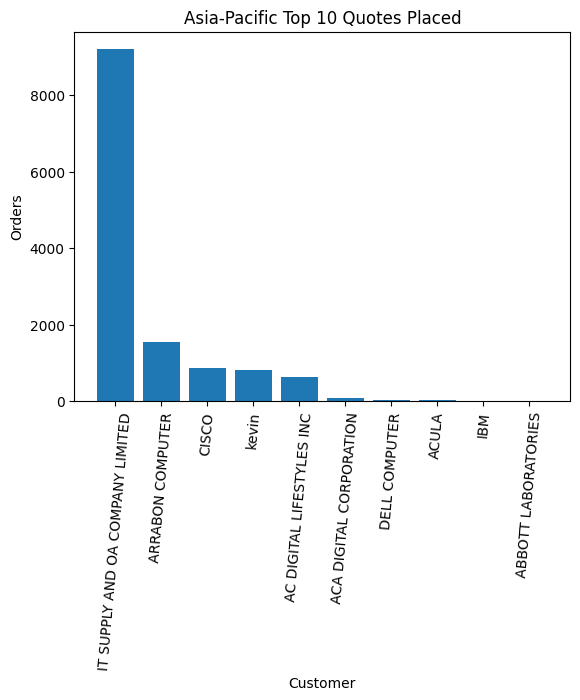

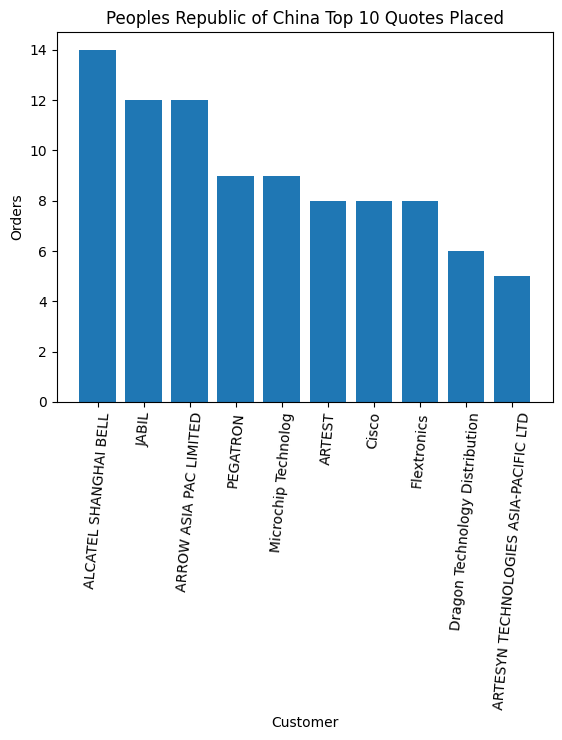

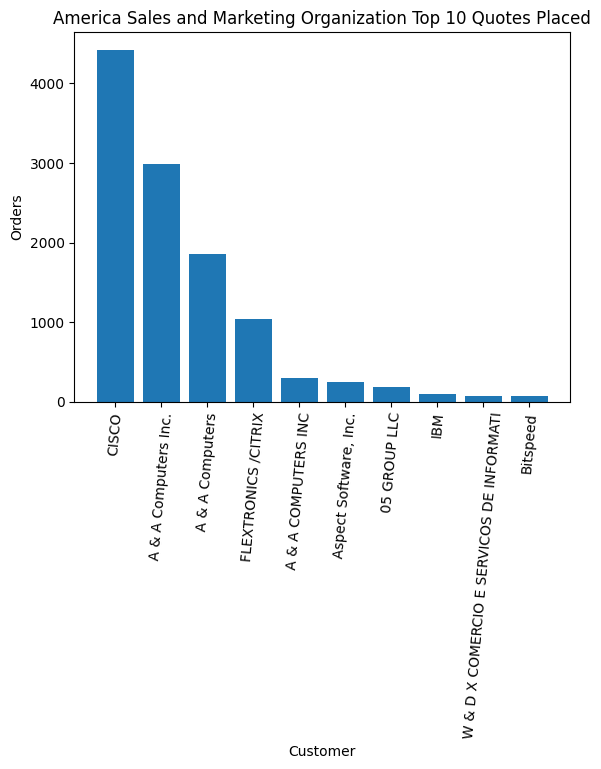

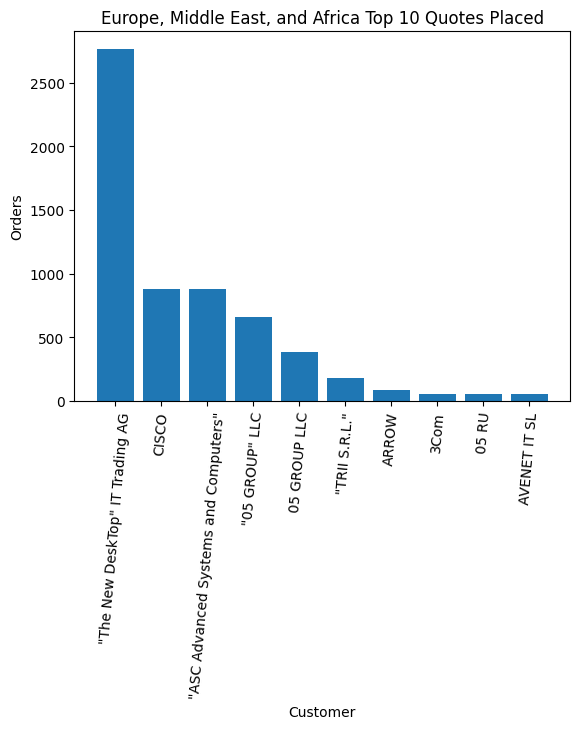

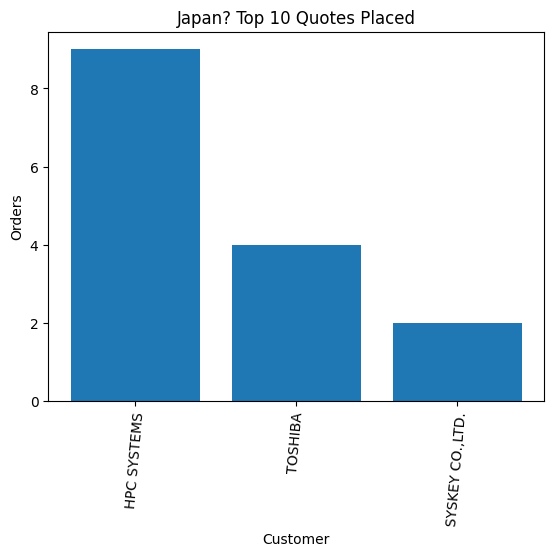

In [11]:
import matplotlib.pyplot as plt

region_total_list = [total_APAC, total_PROC, total_ASMO, total_EMEA, total_IJKK]
region_total_list_name = ['Asia-Pacific', 'Peoples Republic of China', 'America Sales and Marketing Organization', 'Europe, Middle East, and Africa', 'Japan?']

# probably can enumerate this instead instead of incrementing with count variable. 
count = 0
for region in region_total_list:
    region_top = region.head(10)
    plt.title(region_total_list_name[count] + " Top 10 Quotes Placed")
    plt.xlabel("Customer")
    plt.xticks(rotation=85)
    plt.ylabel("Orders")
    plt.bar(region_top.index, region_top.values)
    plt.show()
    count += 1

### Total orders by Region

In [12]:

geo_meaning = {"APAC": "Asia-Pacific", 
               "PROC": "Peoples Republic of China", 
               "ASMO": "America Sales and Marketing Organization", 
               "EMEA": "Europe, Middle East, and Africa", 
               "IJKK": "Japan?"} ## not sure if this is JAPAN

df_merged_accounts_total = df_merged_accountsorder_filter

# finding the total amount of orders by region by returning a new series with the GEO_Names summed up
df_merged_accounts_total['GEO_NAME'] = df_merged_accounts_total['GEO_NAME'].apply(lambda x: 'Asia-Pacific' if x == 'APAC' else 'Peoples Republic of China' if x == 'PROC' else 'America Sales and Marketing Organization' if x == 'ASMO' else 'Europe, Middle East, and Africa' if x == 'EMEA' else 'Japan?' if x == 'IJKK' else x)
df_merged_accounts_total = df_merged_accounts_total.groupby('GEO_NAME').size().sort_values(ascending=False)

print(df_merged_accounts_total.to_string(index=True))

GEO_NAME
America Sales and Marketing Organization    25503
Asia-Pacific                                13375
Europe, Middle East, and Africa              6592
Peoples Republic of China                     146
Japan?                                         15


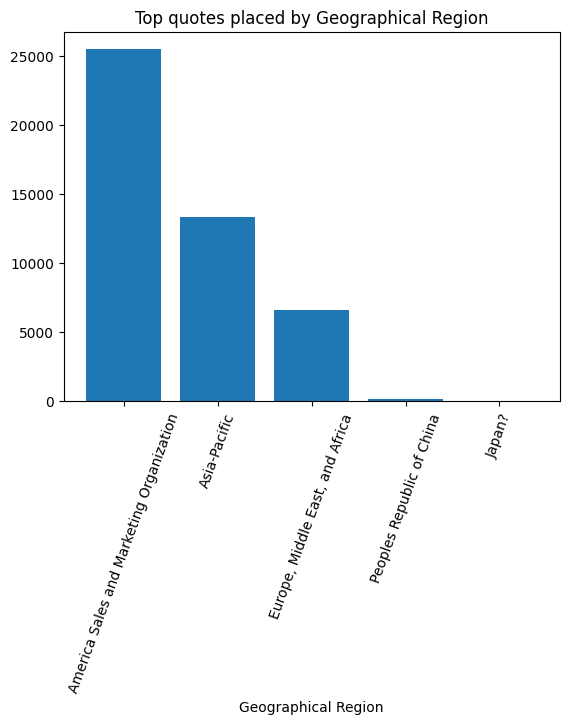

In [13]:
# Visualization with matplotlib
pie_labels = ["America Sales and Marketing Organization","Asia-Pacific","Europe, Middle East, and Africa", "Peoples Republic of China", "Japan"  ]
plt.bar(df_merged_accounts_total.index, df_merged_accounts_total.values)
plt.xticks(rotation=70)
plt.xlabel('Geographical Region')
plt.rcParams["figure.figsize"] = (10, 8)
plt.title("Top quotes placed by Geographical Region")
plt.show()


### Quote Approvals


In [14]:
# Here I handled duplicate rows by manually identifying the right one, and setting the .4 suffix for thes STATUS. In pandas, duplicate columns will have .1, .2, .3, etc...
df_quote_item_analysis = df_quote_item
df_quote_item_analysis = df_quote_item.filter(['OID','QUOTE_NUM', 'QUANTITY_REQUESTED', 'MPN', 'DISTI_BOOK_COST', 'WORKFLOW_STATUS', 'STATUS.4', 'DISTI_REBATE_AMT', 'ITEM_NUM', 'PART_OID', 'REBATE_AMT'])

In [15]:
# check all quotes that have been "approved" THen check if they have a distributor cost associated with it. 
# bq is column

status_cleaned = df_quote_item_analysis
status_cleaned['ACTUAL_STATUS'] = np.where((df_quote_item_analysis['WORKFLOW_STATUS'] == 'Approved') | (df_quote_item_analysis['STATUS.4'] =='Approved'), 'Approved', 'Other')
status_cleaned['ACTUAL_STATUS'] = status_cleaned['ACTUAL_STATUS'].replace('\xa0', '')
status_cleaned['WORKFLOW_STATUS'] = df_quote_item_analysis['WORKFLOW_STATUS']
status_cleaned['STATUS'] = df_quote_item_analysis['STATUS.4']
print(status_cleaned['ACTUAL_STATUS'].str.count("Approved").sum())

# handling of NA values with .notnull and .isnull
df_disti_yes_approved_count = status_cleaned[(status_cleaned['ACTUAL_STATUS'] == 'Approved') & (status_cleaned['DISTI_BOOK_COST'].notnull())].shape[0] 
df_disti_yes_unapproved_count = status_cleaned[(status_cleaned['ACTUAL_STATUS'] == 'Other') & (status_cleaned['DISTI_BOOK_COST'].notnull())].shape[0]

# save them into dataframes, and don't count them.  total amount of NO DBC Approved and NO DBC Unapproved respectively
df_disti_yes_approved = status_cleaned[(status_cleaned['ACTUAL_STATUS'] == 'Approved') & (status_cleaned['DISTI_BOOK_COST'].notnull())]
df_disti_yes_unapproved = status_cleaned[(status_cleaned['ACTUAL_STATUS'] == 'Other') & (status_cleaned['DISTI_BOOK_COST'].notnull())]


# No DBC, Approved Quotes
df_disti_no_approved_count = status_cleaned[(status_cleaned['DISTI_BOOK_COST'].isnull()) & ((status_cleaned['WORKFLOW_STATUS']=='Approved') | (status_cleaned['STATUS']) == 'Approved')].shape[0]

# No DBC, Unapproved QUotes
df_disti_no_unapproved_count = status_cleaned[((status_cleaned['WORKFLOW_STATUS']=='Open') | (status_cleaned['WORKFLOW_STATUS']=='Submitted') | (status_cleaned['WORKFLOW_STATUS']=='Quoted')  & ((status_cleaned['WORKFLOW_STATUS']!='Approved') | (status_cleaned['STATUS']!='Approved')) & (status_cleaned['DISTI_BOOK_COST'].isnull()))].shape[0]
total_dbc = status_cleaned['DISTI_BOOK_COST'].notnull().sum()

# save into dataframes, don't count them. total amount of NO DBC Approved and NO DBC Unapproved respectively
df_disti_no_approved = status_cleaned[(status_cleaned['DISTI_BOOK_COST'].isnull()) & ((status_cleaned['WORKFLOW_STATUS']=='Approved') | (status_cleaned['STATUS']) == 'Approved')].shape[0]
df_disti_no_unapproved = status_cleaned[((status_cleaned['WORKFLOW_STATUS']=='Open') | (status_cleaned['WORKFLOW_STATUS']=='Submitted') | (status_cleaned['WORKFLOW_STATUS']=='Quoted')  & ((status_cleaned['WORKFLOW_STATUS']!='Approved') | (status_cleaned['STATUS']!='Approved')) & (status_cleaned['DISTI_BOOK_COST'].isnull()))].shape[0]

print("Total DBC Quotes: ", total_dbc, '\n')


print("DBC QUOTE APPROVED: ", df_disti_yes_approved_count)
print("DBC QUOTE DENIED: ", df_disti_yes_unapproved_count, '\n')

print("NO DBC, QUOTE APPROVED: ",df_disti_no_approved_count) # wrong
print("NO DBC, QUOTE DENIED", df_disti_no_unapproved_count) # wrong


print("Total successful dbc quotes percent: ", df_disti_yes_approved_count / total_dbc * 100,"%")



47110
Total DBC Quotes:  123242 

DBC QUOTE APPROVED:  47110
DBC QUOTE DENIED:  76132 

NO DBC, QUOTE APPROVED:  0
NO DBC, QUOTE DENIED 247002
Total successful dbc quotes percent:  38.225604907417924 %


### Correlation Matrices

47110


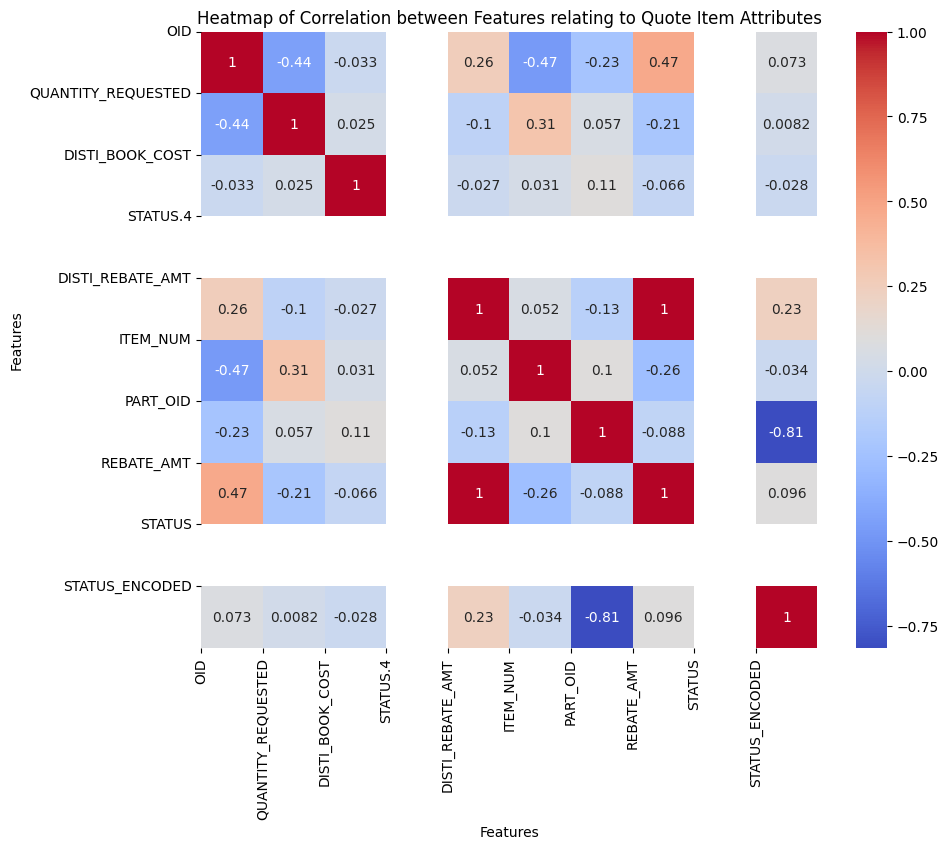

In [16]:
### df_quote_item
# Nominal encoding and visualization
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

#print(df_quote_item_analysis)

## here we label encode the string values, so correlation matrix can handle better. 
le = LabelEncoder()
df_dbc_quote_success_matrix = df_quote_item_analysis 
df_dbc_quote_success_matrix['STATUS_ENCODED'] = le.fit_transform(df_dbc_quote_success_matrix['ACTUAL_STATUS'])
#df_dbc_quote_success_matrix['MPN'] = le.fit(transform())

#print(df_dbc_quote_success_matrix)
#df_dbc_quote_success_matrix.dropna(how='any', axis=1, inplace=True)

#df_dbc_quote_success_matrix =df_dbc_quote_success_matrix.select_dtypes(include=[int, float])

df_dbc_quote_success_matrix2 = df_dbc_quote_success_matrix
df_quote_item_encoded = df_dbc_quote_success_matrix2
print(df_quote_item_encoded['ACTUAL_STATUS'].str.count("Approved").sum())

dbc_quote_success_matrix = df_dbc_quote_success_matrix.corr()
#dbc_quote_success_matrix = df_dbc_quote_success_matrix[['STATUS_ENCODED', 'DISTI_REBATE_AMT', 'DISTI_BOOK_COST', 'ITEM_NUM', 'PART_OID', 'REBATE_AMT']]

sns.heatmap(dbc_quote_success_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Heatmap of Correlation between Features relating to Quote Item Attributes')
plt.xlabel('Features')
plt.ylabel('Features')
plt.xticks(range(len(dbc_quote_success_matrix.columns)), dbc_quote_success_matrix.columns)
plt.yticks(range(len(dbc_quote_success_matrix.columns)), dbc_quote_success_matrix.columns)
plt.rcParams["figure.figsize"] = (6, 6)

## here we can see that this correlation matrix is broken apart into sections, which means this datatsets attributes are lowly correlated with each other. 



In [17]:
# most related values sorting
quote_item_most_related = dbc_quote_success_matrix.stack().sort_values(ascending=False)
quote_item_most_related.columns = ['Feature_1', 'Feature_2', 'Relation_Score']
print(quote_item_most_related.columns)
# here we define the threshold, to print out the most relevant features. Extremely High and Extremely Low features do not mean better features, just more correlation. 
print(quote_item_most_related[((quote_item_most_related < 0.99) & (quote_item_most_related > 0.20) ) | ((quote_item_most_related <= -0.25) & (quote_item_most_related > -0.99))].sort_values(ascending=True))


['Feature_1', 'Feature_2', 'Relation_Score']
STATUS_ENCODED      PART_OID             -0.814218
PART_OID            STATUS_ENCODED       -0.814218
OID                 ITEM_NUM             -0.468479
ITEM_NUM            OID                  -0.468479
OID                 QUANTITY_REQUESTED   -0.444832
QUANTITY_REQUESTED  OID                  -0.444832
REBATE_AMT          ITEM_NUM             -0.263772
ITEM_NUM            REBATE_AMT           -0.263772
STATUS_ENCODED      DISTI_REBATE_AMT      0.228815
DISTI_REBATE_AMT    STATUS_ENCODED        0.228815
OID                 DISTI_REBATE_AMT      0.255496
DISTI_REBATE_AMT    OID                   0.255496
ITEM_NUM            QUANTITY_REQUESTED    0.313168
QUANTITY_REQUESTED  ITEM_NUM              0.313168
REBATE_AMT          OID                   0.472417
OID                 REBATE_AMT            0.472417
dtype: float64


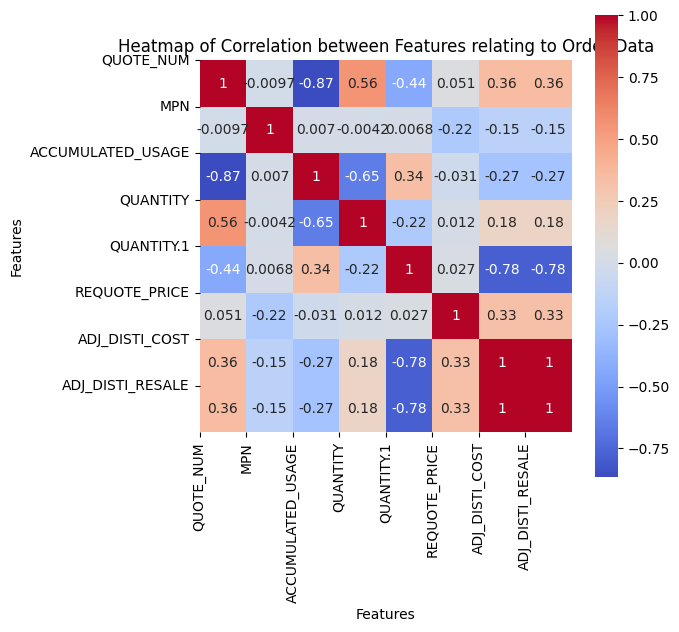

Feature_1                  Feature_2               Relation_Score
ACCUMULATED_USAGE  QUOTE_NUM           -0.866738
QUOTE_NUM          ACCUMULATED_USAGE   -0.866738
QUANTITY.1         ADJ_DISTI_COST      -0.781447
ADJ_DISTI_RESALE   QUANTITY.1          -0.781447
QUANTITY.1         ADJ_DISTI_RESALE    -0.781447
ADJ_DISTI_COST     QUANTITY.1          -0.781447
QUANTITY           ACCUMULATED_USAGE   -0.652003
ACCUMULATED_USAGE  QUANTITY            -0.652003
QUANTITY.1         QUOTE_NUM           -0.436466
QUOTE_NUM          QUANTITY.1          -0.436466
QUANTITY           QUOTE_NUM            0.559781
QUOTE_NUM          QUANTITY             0.559781
dtype: float64


In [18]:
# df_order_data
le_order_data = LabelEncoder()
df_order_data_analysis = df_order_data
order_data_matrix = df_order_data_analysis
## here we label encode the string values, so correlation matrix can handle better. 
order_data_matrix['MPN'] = le_order_data.fit_transform(df_order_data_analysis['MPN'])
order_data_matrix['QUOTE_NUM'] = le_order_data.fit_transform(df_order_data_analysis['QUOTE_NUM'])


# take specific attributes from the order_data dataset to put into a correlation matrix
order_data_matrix = order_data_matrix[['QUOTE_NUM', 'MPN', 'ACCUMULATED_USAGE', 'QUANTITY', 'QUANTITY.1', 'REQUOTE_PRICE', 'ADJ_DISTI_COST', 'ADJ_DISTI_RESALE']].corr()



sns.heatmap(order_data_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Heatmap of Correlation between Features relating to Order Data')
plt.xlabel('Features')
plt.ylabel('Features')
plt.xticks(range(len(order_data_matrix.columns)), order_data_matrix.columns)
plt.yticks(range(len(order_data_matrix.columns)), order_data_matrix.columns)
plt.rcParams["figure.figsize"] = (12, 8)
plt.show()

# most related values
order_data_most_related = order_data_matrix.stack().sort_values(ascending=False)

# here we define the threshold, to print out the most relevant features. Extremely High and Extremely Low features do not mean better features, just more correlation. 

order_data_most_related = order_data_most_related[((order_data_most_related < 0.99) & (order_data_most_related > 0.4) ) | ((order_data_most_related <= -0.4) & (order_data_most_related > -0.99))].sort_values(ascending=True)
order_data_most_related.columns = ['Feature_1', 'Feature_2', 'Relation_Score']
print(order_data_most_related.columns[0], "                ", order_data_most_related.columns[1], "             ", order_data_most_related.columns[2])
print(order_data_most_related)

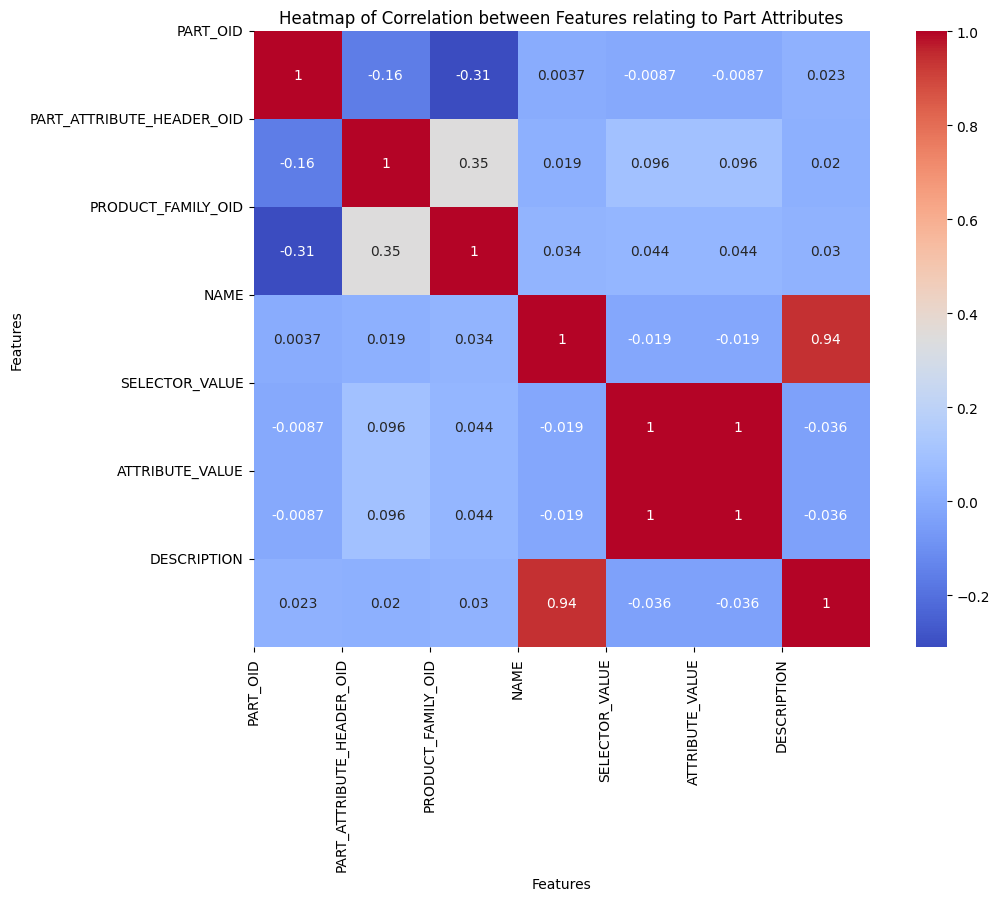

Feature_1                  Feature_2               Relation_Score
PART_OID                   PRODUCT_FAMILY_OID          -0.311405
PRODUCT_FAMILY_OID         PART_OID                    -0.311405
PART_ATTRIBUTE_HEADER_OID  PRODUCT_FAMILY_OID           0.347231
PRODUCT_FAMILY_OID         PART_ATTRIBUTE_HEADER_OID    0.347231
DESCRIPTION                NAME                         0.939300
NAME                       DESCRIPTION                  0.939300
dtype: float64


In [19]:
### df_part_attributes
le_part_attributes = LabelEncoder()
df_part_attributes_analysis = df_part_attributes
part_attributes_matrix = df_part_attributes_analysis

## here we label encode the string values, so correlation matrix can handle better. 
part_attributes_matrix['FAMILY'] = le_part_attributes.fit_transform(df_part_attributes_analysis['FAMILY'])
part_attributes_matrix['NAME'] = le_part_attributes.fit_transform(df_part_attributes_analysis['NAME'])
part_attributes_matrix['SELECTOR_VALUE'] = le_part_attributes.fit_transform(df_part_attributes_analysis['SELECTOR_VALUE'])
part_attributes_matrix['ATTRIBUTE_VALUE'] = le_part_attributes.fit_transform(df_part_attributes_analysis['ATTRIBUTE_VALUE'])
part_attributes_matrix['DESCRIPTION'] = le_part_attributes.fit_transform(df_part_attributes_analysis['DESCRIPTION'])


part_attributes_matrix = part_attributes_matrix[['PART_OID', 'MPN', 'PART_ATTRIBUTE_HEADER_OID', 'PRODUCT_FAMILY_OID', 'NAME', 'SELECTOR_VALUE', 'ATTRIBUTE_VALUE', 'DESCRIPTION']].corr()



sns.heatmap(part_attributes_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Heatmap of Correlation between Features relating to Part Attributes')
plt.xlabel('Features')
plt.ylabel('Features')
plt.xticks(range(len(part_attributes_matrix.columns)), part_attributes_matrix.columns)
plt.yticks(range(len(part_attributes_matrix.columns)), part_attributes_matrix.columns)
plt.rcParams["figure.figsize"] = (10, 8)
plt.show()

# most related values
part_attributes_most_related = part_attributes_matrix.stack().sort_values(ascending=False)

# here we define the threshold, to print out the most relevant features. Extremely High and Extremely Low features do not mean better features, just more correlation. 

part_attributes_most_related = part_attributes_most_related[((part_attributes_most_related < 0.99) & (part_attributes_most_related > 0.3) ) | ((part_attributes_most_related <= -0.3) & (part_attributes_most_related > -0.99))].sort_values(ascending=True)
part_attributes_most_related.columns = ['Feature_1', 'Feature_2', 'Relation_Score']
print(part_attributes_most_related.columns[0], "                ", part_attributes_most_related.columns[1], "             ", part_attributes_most_related.columns[2])
print(part_attributes_most_related)

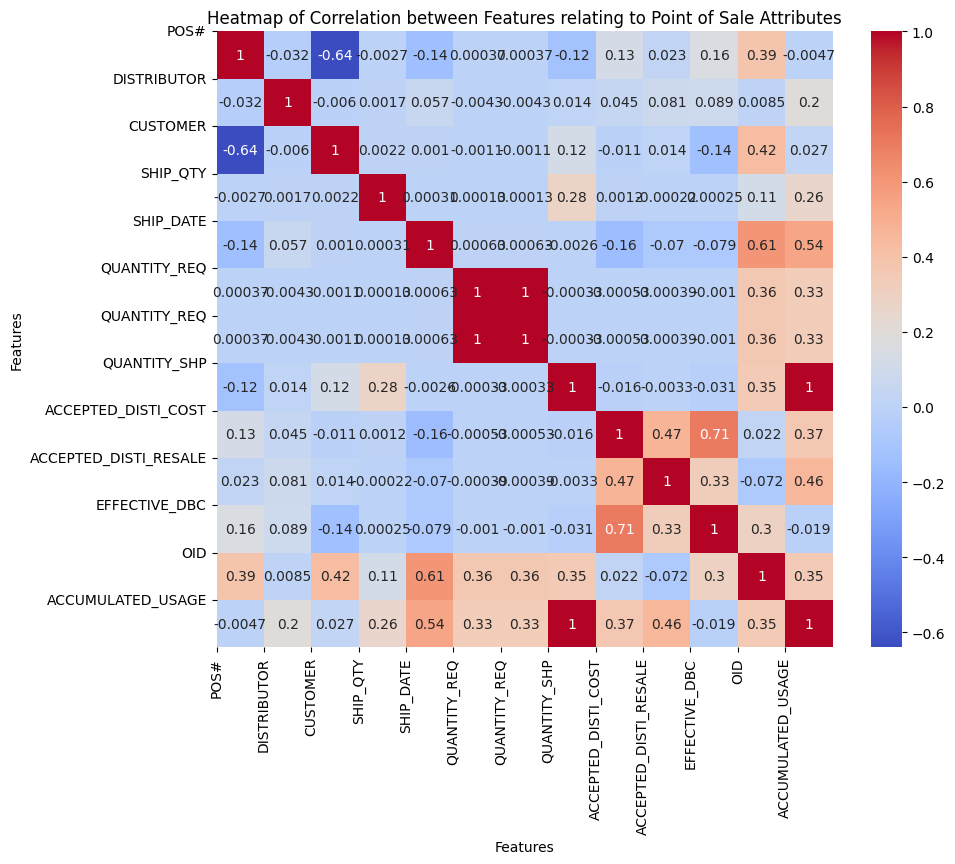

Feature_1                  Feature_2               Relation_Score
PART_OID                   PRODUCT_FAMILY_OID          -0.311405
PRODUCT_FAMILY_OID         PART_OID                    -0.311405
PART_ATTRIBUTE_HEADER_OID  PRODUCT_FAMILY_OID           0.347231
PRODUCT_FAMILY_OID         PART_ATTRIBUTE_HEADER_OID    0.347231
DESCRIPTION                NAME                         0.939300
NAME                       DESCRIPTION                  0.939300
dtype: float64


In [20]:
### df_pos_data
le_pos_data = LabelEncoder()
df_pos_data_analysis = df_pos_data
pos_data_matrix = df_pos_data_analysis

## here we label encode the string values, so correlation matrix can handle better. 
pos_data_matrix['DISTRIBUTOR'] = le_part_attributes.fit_transform(df_pos_data_analysis['DISTRIBUTOR'])
pos_data_matrix['CUSTOMER'] = le_part_attributes.fit_transform(df_pos_data_analysis['CUSTOMER'])
pos_data_matrix['SHIP_DATE'] = le_part_attributes.fit_transform(df_pos_data_analysis['SHIP_DATE'])

df_pos_data_encoded = pos_data_matrix

pos_data_matrix = pos_data_matrix[['POS#', 'DISTRIBUTOR', 'CUSTOMER', 'SHIP_QTY', 'SHIP_DATE', 'DEBIT_NUM', 'QUANTITY_REQ', 'QUANTITY_REQ', 'QUANTITY_SHP', 'ACCEPTED_DISTI_COST', 'ACCEPTED_DISTI_RESALE', 'EFFECTIVE_DBC', 'OID', 'ACCUMULATED_USAGE']].corr()
pos_data_matrix.dropna(axis=1, how='all', inplace=True) # drop the rows that have ALL NA values. 


sns.heatmap(pos_data_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Heatmap of Correlation between Features relating to Point of Sale Attributes')
plt.xlabel('Features')
plt.ylabel('Features')
plt.xticks(range(len(pos_data_matrix.columns)), pos_data_matrix.columns)
plt.yticks(range(len(pos_data_matrix.columns)), pos_data_matrix.columns)
plt.rcParams["figure.figsize"] = (10, 8)
plt.show()

# most related values
pos_data_most_related = pos_data_matrix.stack().sort_values(ascending=False)

# here we define the threshold, to print out the most relevant features. Extremely High and Extremely Low features do not mean better features, just more correlation. 

pos_data_most_related = pos_data_most_related[((pos_data_most_related < 0.99) & (pos_data_most_related > 0.3) ) | ((pos_data_most_related <= -0.3) & (pos_data_most_related > -0.99))].sort_values(ascending=True)
pos_data_most_related.columns = ['Feature_1', 'Feature_2', 'Relation_Score']
print(pos_data_most_related.columns[0], "                ", part_attributes_most_related.columns[1], "             ", part_attributes_most_related.columns[2])
print(part_attributes_most_related)

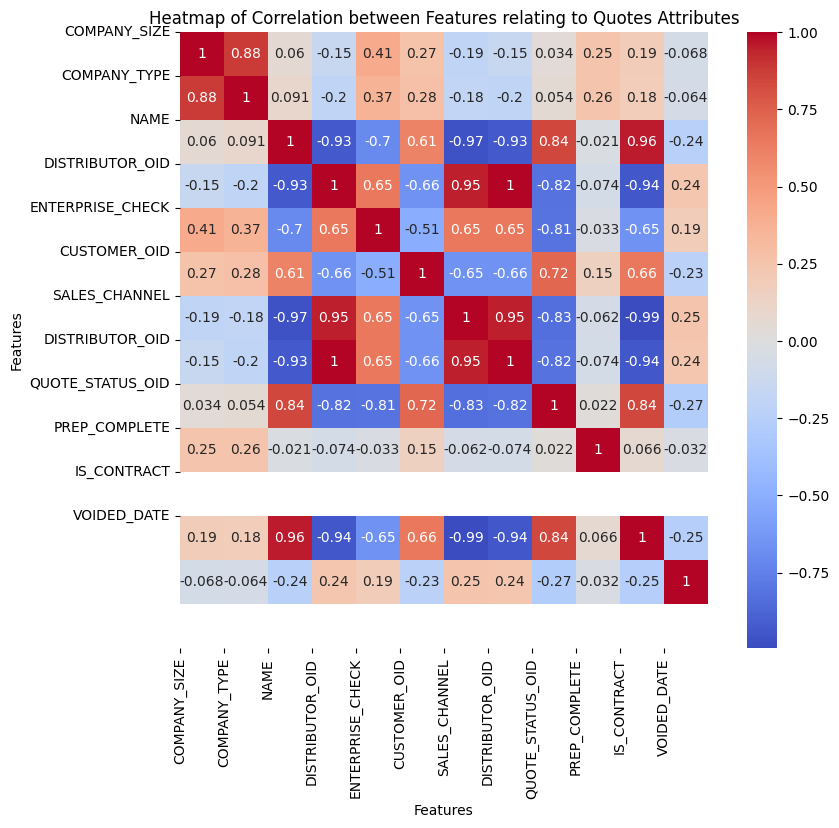

Feature_1                  Feature_2               Relation_Score
NAME              SALES_CHANNEL      -0.965678
SALES_CHANNEL     NAME               -0.965678
DISTRIBUTOR_OID   IS_CONTRACT        -0.941104
IS_CONTRACT       DISTRIBUTOR_OID    -0.941104
DISTRIBUTOR_OID   IS_CONTRACT        -0.941104
IS_CONTRACT       DISTRIBUTOR_OID    -0.941104
DISTRIBUTOR_OID   NAME               -0.926175
NAME              DISTRIBUTOR_OID    -0.926175
DISTRIBUTOR_OID   NAME               -0.926175
NAME              DISTRIBUTOR_OID    -0.926175
QUOTE_STATUS_OID  SALES_CHANNEL      -0.833603
SALES_CHANNEL     QUOTE_STATUS_OID   -0.833603
QUOTE_STATUS_OID  DISTRIBUTOR_OID    -0.817854
                  DISTRIBUTOR_OID    -0.817854
DISTRIBUTOR_OID   QUOTE_STATUS_OID   -0.817854
                  QUOTE_STATUS_OID   -0.817854
QUOTE_STATUS_OID  ENTERPRISE_CHECK   -0.814403
ENTERPRISE_CHECK  QUOTE_STATUS_OID   -0.814403
                  NAME               -0.700408
NAME              ENTERPRISE_CHECK   -0.7

In [21]:
### df_quotes
le_quotes = LabelEncoder()
df_quotes_data_analysis = df_quotes
quotes_data_matrix = df_quotes_data_analysis

## here we label encode the string values, so correlation matrix can handle better. 
quotes_data_matrix['COMPANY_SIZE'] = le_quotes.fit_transform(df_quotes_data_analysis['CUSTOM_FIELD2'])
quotes_data_matrix['COMPANY_TYPE'] = le_quotes.fit_transform(df_quotes_data_analysis['CUSTOM_FIELD3'])
quotes_data_matrix['NAME'] = le_quotes.fit_transform(df_quotes_data_analysis['NAME'])
quotes_data_matrix['DISTRIBUTOR_OID'] = le_quotes.fit_transform(df_quotes_data_analysis['DISTRIBUTOR_OID'])
quotes_data_matrix['ENTERPRISE_CHECK'] = le_quotes.fit_transform(df_quotes_data_analysis['CUSTOM_FIELD9'])
quotes_data_matrix['VOIDED_DATE'] = le_quotes.fit_transform(df_quotes_data_analysis['VOIDED_DATE'])


df_quotes_encoded = quotes_data_matrix

quotes_data_matrix = quotes_data_matrix[['COMPANY_SIZE', 'COMPANY_TYPE', 'NAME', 'DISTRIBUTOR_OID', 'ENTERPRISE_CHECK', 'CUSTOMER_OID', 'SALES_CHANNEL', 'DISTRIBUTOR_OID', 'QUOTE_STATUS_OID', 'PREP_COMPLETE', 'IS_FORWARD', 'IS_CONTRACT', 'QUOTE_NUM', 'VOIDED_DATE','PRICING_GROUP_TYPE' ]].corr()
quotes_data_matrix.dropna(axis=1, how='all', inplace=True)


sns.heatmap(quotes_data_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Heatmap of Correlation between Features relating to Quotes Attributes')
plt.xlabel('Features')
plt.ylabel('Features')
plt.xticks(range(len(quotes_data_matrix.columns)), quotes_data_matrix.columns)
plt.yticks(range(len(quotes_data_matrix.columns)), quotes_data_matrix.columns)
plt.rcParams["figure.figsize"] = (10, 10)
plt.show()

# most related values
quotes_data_most_related = quotes_data_matrix.stack().sort_values(ascending=False)

# here we define the threshold, to print out the most relevant features. Extremely High and Extremely Low features do not mean better features, just more correlation. 
quotes_data_most_related = quotes_data_most_related[((quotes_data_most_related < 0.99) & (quotes_data_most_related > 0.5) ) | ((quotes_data_most_related <= -0.5) & (quotes_data_most_related > -0.99))].sort_values(ascending=True)
quotes_data_most_related.columns = ['Feature_1', 'Feature_2', 'Relation_Score']
print(quotes_data_most_related.columns[0], "                ", quotes_data_most_related.columns[1], "             ", quotes_data_most_related.columns[2])
print(quotes_data_most_related)

### Detecting Outliers with Z-Score

In [22]:
## calculate total bins
total_values_quote_item = dbc_quote_success_matrix.values.flatten() 
print("Total values: ", len(total_values_quote_item))
quote_item_bins = int(np.sqrt(len(total_values_quote_item)))
print("Bins: ", quote_item_bins)

# total bins tells use total observations that can be considered outliers. 

Total values:  100
Bins:  10


In [23]:
from scipy import stats
import seaborn as sns

## let's take the outlier z-score for the quote_item dataset

zscores_quote_item = np.abs(stats.zscore(df_quote_item['PART_OID']))

# take outliers as part_oid quote_items with a value greater than 3. 
threshold_quote_item = 3
outliers_quote_item = df_quote_item[zscores_quote_item > threshold_quote_item]

print(outliers_quote_item.head(10))


'''
zscores_quote_item = dbc_quote_success_matrix.apply(stats.zscore)
#zscores_quote_item.dropna(inplace=True)

outliers_quote_item = np.abs(zscores_quote_item) > 2

outlier_values_quote_item = dbc_quote_success_matrix[outliers_quote_item]

sns.boxplot(data=outlier_values_quote_item)

plt.title("Box Plot Quote Item Outliers")

plt.show()



zscore_dbc_quote_success_matrix = zscore_dbc_quote_success_matrix.apply(lambda x: (x - x.mean()) / x.std())


outliers_quote_item = zscore_dbc_quote_success_matrix[(zscore_dbc_quote_success_matrix > 2) | (zscore_dbc_quote_success_matrix < -2)]

#outliers rows
outliers_quote_item_rows = zscore_dbc_quote_success_matrix[outliers_quote_item.any(axis=1)]
outlier_neat = pd.concat([outliers_quote_item_rows, outliers_quote_item[outliers_quote_item.any(axis=1)]], axis=1)


print("Outliers: ")
print(outlier_neat.head(10))

plt.hist(outlier_neat['DISTI_REBATE_AMT'])
plt.xlabel('DISTI REBATE AMT Z-SCORE')
plt.ylabel('Frequency')
plt.title('HISTOGRAM OF DISTI REBATE Z-scores')

'''


         OID          CREATED_DATE         MODIFIED_DATE  \
1716  297552  22-DEC-2015 21:48:24  23-MAR-2017 00:00:00   
1717  297552  22-DEC-2015 21:48:24  23-MAR-2017 00:00:00   
1718  297552  22-DEC-2015 21:48:24  23-MAR-2017 00:00:00   
1719  297552  22-DEC-2015 21:48:24  23-MAR-2017 00:00:00   
1720  297552  22-DEC-2015 21:48:24  23-MAR-2017 00:00:00   
1721  297552  22-DEC-2015 21:48:24  23-MAR-2017 00:00:00   
1722  297552  22-DEC-2015 21:48:24  23-MAR-2017 00:00:00   
1723  297552  22-DEC-2015 21:48:24  23-MAR-2017 00:00:00   
1724  297552  22-DEC-2015 21:48:24  23-MAR-2017 00:00:00   
1725  297552  22-DEC-2015 21:48:24  23-MAR-2017 00:00:00   

         GUI_MODIFIED_DATE  OBSOLETE_FLAG  QUOTE_OID QUOTE_NUM  ITEM_NUM  \
1716  22-DEC-2015 21:51:27              0      11721    Q10358         1   
1717  22-DEC-2015 21:51:27              0      11721    Q10358         1   
1718  22-DEC-2015 21:51:27              0      11721    Q10358         1   
1719  22-DEC-2015 21:51:27         

'\nzscores_quote_item = dbc_quote_success_matrix.apply(stats.zscore)\n#zscores_quote_item.dropna(inplace=True)\n\noutliers_quote_item = np.abs(zscores_quote_item) > 2\n\noutlier_values_quote_item = dbc_quote_success_matrix[outliers_quote_item]\n\nsns.boxplot(data=outlier_values_quote_item)\n\nplt.title("Box Plot Quote Item Outliers")\n\nplt.show()\n\n\n\nzscore_dbc_quote_success_matrix = zscore_dbc_quote_success_matrix.apply(lambda x: (x - x.mean()) / x.std())\n\n\noutliers_quote_item = zscore_dbc_quote_success_matrix[(zscore_dbc_quote_success_matrix > 2) | (zscore_dbc_quote_success_matrix < -2)]\n\n#outliers rows\noutliers_quote_item_rows = zscore_dbc_quote_success_matrix[outliers_quote_item.any(axis=1)]\noutlier_neat = pd.concat([outliers_quote_item_rows, outliers_quote_item[outliers_quote_item.any(axis=1)]], axis=1)\n\n\nprint("Outliers: ")\nprint(outlier_neat.head(10))\n\nplt.hist(outlier_neat[\'DISTI_REBATE_AMT\'])\nplt.xlabel(\'DISTI REBATE AMT Z-SCORE\')\nplt.ylabel(\'Frequency\

In [24]:
## IQR
print("test")

df_quote_item_all_encoded = df_quote_item
df_quote_item_all_encoded['STATUS_ENCODED'] = df_dbc_quote_success_matrix['STATUS_ENCODED']
df_quote_item_all_encoded.dropna(axis=1, how='all')

le_quote_item_encoded = LabelEncoder()

## encode all columns that have strings with LabelEncoder
for col in df_quote_item_all_encoded.columns:
    if (df_quote_item_all_encoded[col].dtype == 'object'):
        df_quote_item_all_encoded[col] = le_quote_item_encoded.fit_transform(df_quote_item_all_encoded[col])
    
## here we identify values that are less than 1.5 times than interquartile range or 1.5 above the interquartile range as an outlier. 
for attribute in df_quote_item_all_encoded.columns:
    Q1 = df_quote_item[attribute].quantile(0.25)
    Q3 = df_quote_item[attribute].quantile(0.75)
    IQR = Q3 - Q1

    threshold  = 1.5
    outliers = df_quote_item[(df_quote_item[attribute] < Q1 - threshold * IQR) | (df_quote_item[attribute] > Q3 + threshold * IQR)]
    
    print(f"Outliers in {attribute}")
    print('Mean: ', df_quote_item[attribute].mean())
    print('Median: ', df_quote_item[attribute].median())
    print('Standard Deviation: ', df_quote_item[attribute].std())
    print('Number of Outliers: ', len(outliers))
    print('\n')
    






test
Outliers in OID
Mean:  2098208.8348294436
Median:  1733352.0
Standard Deviation:  748630.7643580899
Number of Outliers:  93226


Outliers in CREATED_DATE
Mean:  151.7884500299222
Median:  168.0
Standard Deviation:  60.95435673463235
Number of Outliers:  25340


Outliers in MODIFIED_DATE
Mean:  104.52128216636744
Median:  106.0
Standard Deviation:  26.98658148268543
Number of Outliers:  71260


Outliers in GUI_MODIFIED_DATE
Mean:  192.84406792339917
Median:  210.0
Standard Deviation:  78.32329278042761
Number of Outliers:  99554


Outliers in OBSOLETE_FLAG
Mean:  0.0
Median:  0.0
Standard Deviation:  0.0
Number of Outliers:  0


Outliers in QUOTE_OID
Mean:  25530.28194195093
Median:  19883.0
Standard Deviation:  10529.09006012626
Number of Outliers:  93296


Outliers in QUOTE_NUM
Mean:  47.673099940155595
Median:  10.0
Standard Deviation:  61.594533771805914
Number of Outliers:  23870


Outliers in ITEM_NUM
Mean:  163.54039497307002
Median:  116.0
Standard Deviation:  164.753089154

/home/arao/.local/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/arao/.local/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/arao/.local/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Median:  nan
Standard Deviation:  nan
Number of Outliers:  0


Outliers in REF_PRICE
Mean:  1.3839753466872111
Median:  1.0
Standard Deviation:  3.8597036992698177
Number of Outliers:  140


Outliers in MINIMUM_PRICE
Mean:  2.334742180896027
Median:  2.0
Standard Deviation:  8.134352987179424
Number of Outliers:  140


Outliers in FIELD_MIN
Mean:  4267.437537552573
Median:  2.0
Standard Deviation:  15559.252538574245
Number of Outliers:  27930


Outliers in DISTI_BOOK_COST
Mean:  425.58013177325915
Median:  2.0
Standard Deviation:  5413.83933158489
Number of Outliers:  11830


Outliers in MANUFACTURER_COST
Mean:  9.63961038961039
Median:  2.0
Standard Deviation:  36.76738146933893
Number of Outliers:  3570


Outliers in MPP_OID
Mean:  0.0
Median:  0.0
Standard Deviation:  0.0
Number of Outliers:  0


Outliers in STATUS.1
Mean:  nan
Median:  nan
Standard Deviation:  nan
Number of Outliers:  0


Outliers in MPP_ITEM_OID
Mean:  0.0
Median:  0.0
Standard Deviation:  0.0
Number of Outliers:

/home/arao/.local/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/arao/.local/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/arao/.local/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/arao/.local/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Mean:  2.848967684021544
Median:  0.0
Standard Deviation:  4.727571255887125
Number of Outliers:  92330


Outliers in PROGRAM_OID
Mean:  77.17010771992818
Median:  102.0
Standard Deviation:  39.63345981242074
Number of Outliers:  93366


Outliers in NAME
Mean:  7.318185218432077
Median:  6.0
Standard Deviation:  2.62132796624861
Number of Outliers:  35560


Outliers in ASSEMBLY_OID
Mean:  0.01335278276481149
Median:  0.0
Standard Deviation:  0.7128036679157977
Number of Outliers:  154


Outliers in NAME.1
Mean:  1.1999177139437462
Median:  1.0
Standard Deviation:  1.1662798096006568
Number of Outliers:  0


Outliers in AUTO_REQUOTE_PRICE
Mean:  3736.100587979094
Median:  199.0
Standard Deviation:  13907.887479489955
Number of Outliers:  32340


Outliers in AUTO_ADJ_DISTI_COST
Mean:  3252.0746483794883
Median:  222.0
Standard Deviation:  12764.84831458255
Number of Outliers:  31500


Outliers in AUTO_ADJ_DISTI_RESALE
Mean:  531.9677796944308
Median:  210.0
Standard Deviation:  912.27916

/home/arao/.local/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Standard Deviation:  17043.304010861575
Number of Outliers:  17850


Outliers in RECOMM_BUNDLE_POCKET_COST
Mean:  23.5
Median:  23.5
Standard Deviation:  0.5000163835050915
Number of Outliers:  0


Outliers in DISTI_POCKET_PRICE
Mean:  278.34413401109055
Median:  24.0
Standard Deviation:  1307.65458068554
Number of Outliers:  9842


Outliers in THRESHOLD_OVERRIDE
Mean:  0.0
Median:  0.0
Standard Deviation:  0.0
Number of Outliers:  0


Outliers in IS_UNLIMITED_QUANTITY
Mean:  0.00037402752842609214
Median:  0.0
Standard Deviation:  0.01933620000735306
Number of Outliers:  140


Outliers in DEAL_SCORE
Mean:  0.0
Median:  0.0
Standard Deviation:  0.0
Number of Outliers:  0


Outliers in IS_MATRIX
Mean:  0.2324581089168163
Median:  0.0
Standard Deviation:  0.42240006296382904
Number of Outliers:  87010


Outliers in QUANTITY_RECOMMENDED
Mean:  37570.33598892878
Median:  1000.0
Standard Deviation:  52473.49926594756
Number of Outliers:  0


Outliers in DEAL_AUTH_PRICE
Mean:  6390.259996907

/home/arao/.local/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/arao/.local/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Outliers in CUSTOM_FIELD6
Mean:  22.824431478156793
Median:  24.0
Standard Deviation:  11.19443995713687
Number of Outliers:  0


Outliers in CUSTOM_FIELD7
Mean:  nan
Median:  nan
Standard Deviation:  nan
Number of Outliers:  0


Outliers in CUSTOM_FIELD8
Mean:  0.999812986235787
Median:  1.0
Standard Deviation:  0.01367403706312161
Number of Outliers:  70


Outliers in CUSTOM_FIELD9
Mean:  80.4375
Median:  28.0
Standard Deviation:  92.77556026622727
Number of Outliers:  0


Outliers in CUSTOM_FIELD10
Mean:  14.966113105924595
Median:  16.0
Standard Deviation:  3.392058924435953
Number of Outliers:  38234


Outliers in STATUS_ENCODED
Mean:  0.87413973668462
Median:  1.0
Standard Deviation:  0.3316922540022661
Number of Outliers:  47110




/home/arao/.local/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


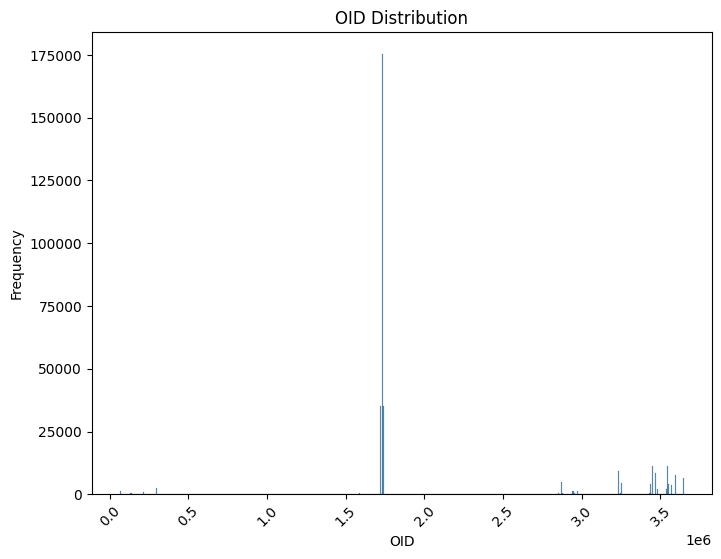

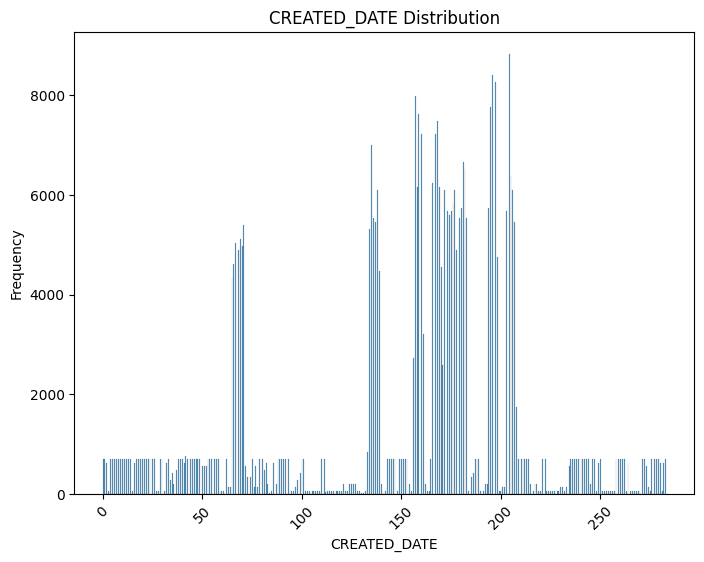

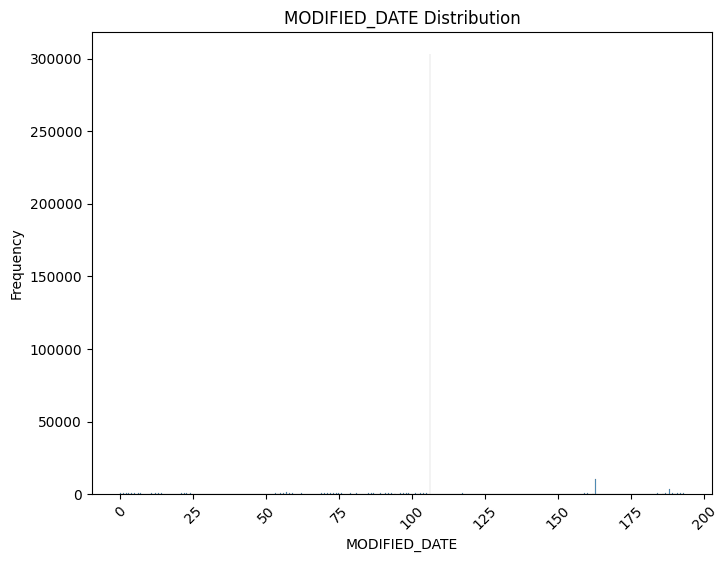

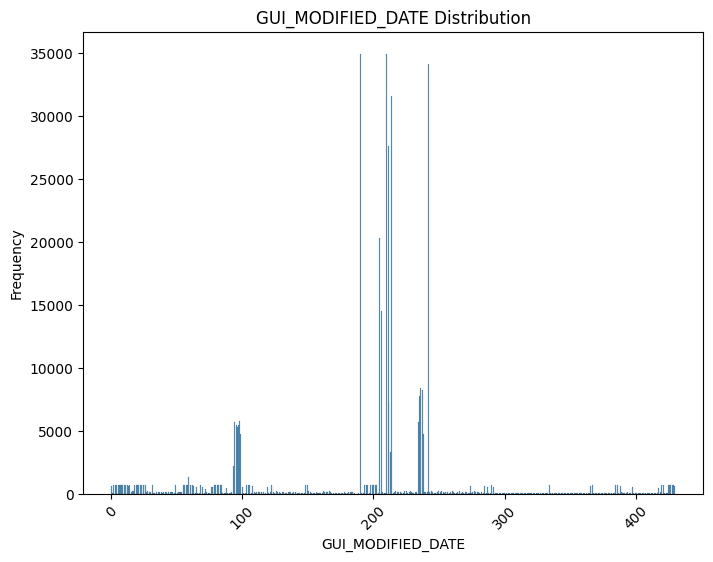

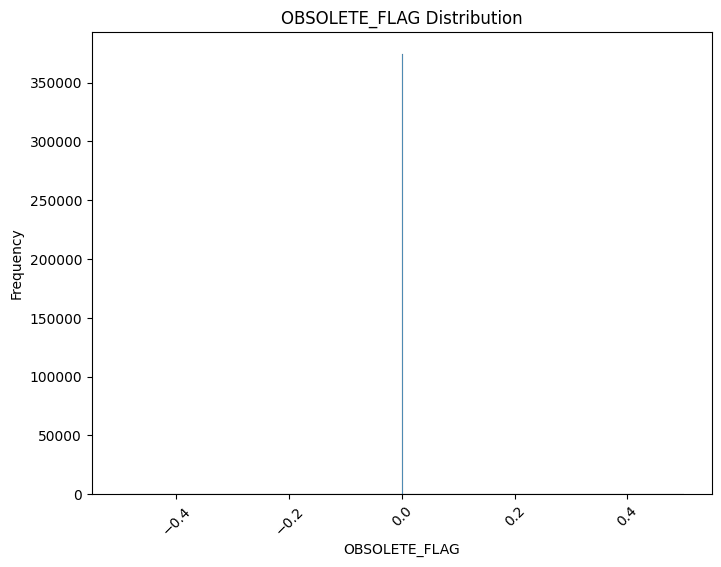

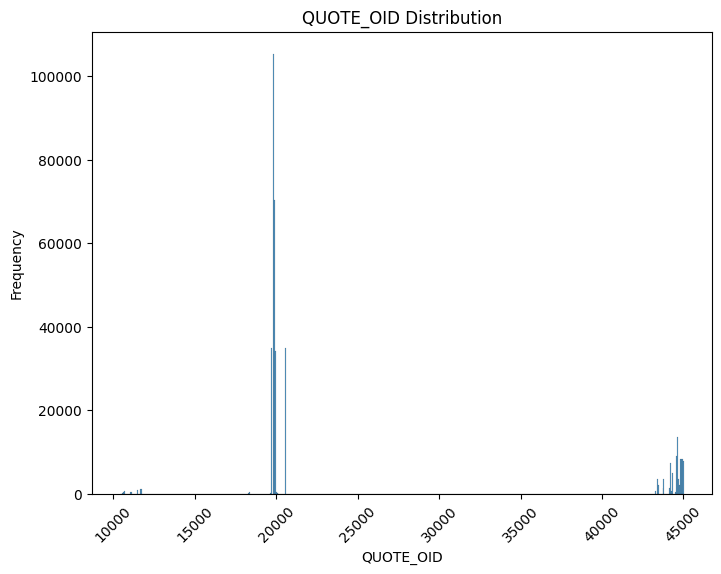

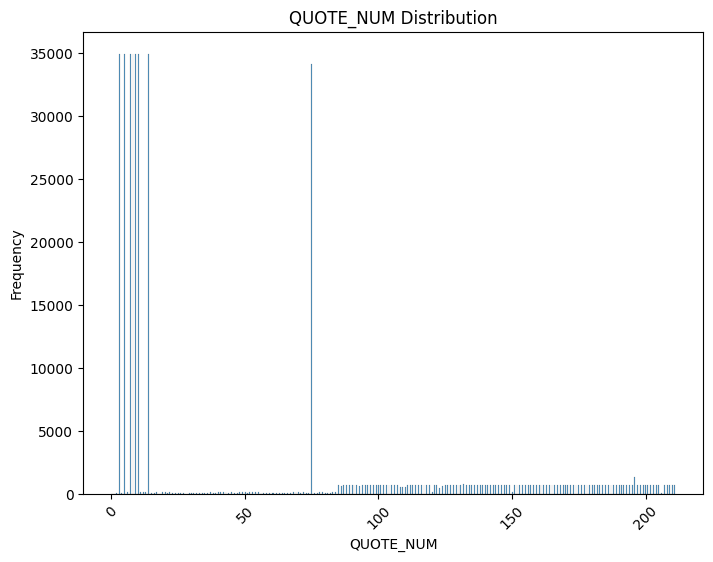

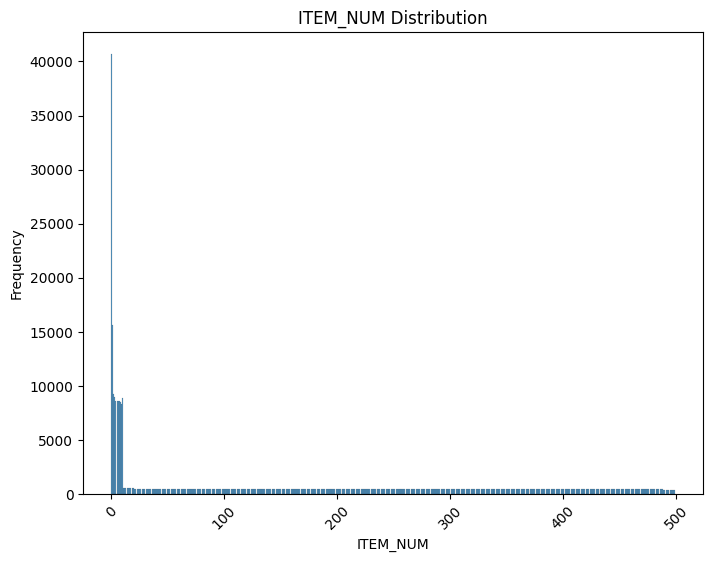

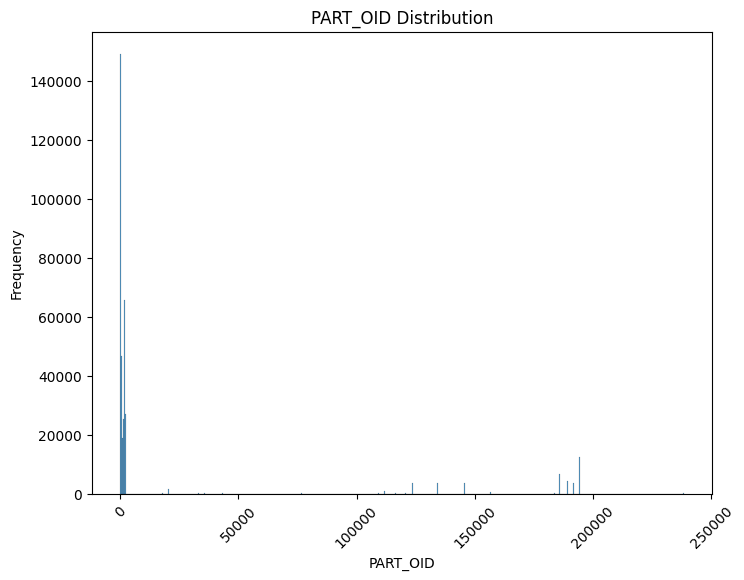

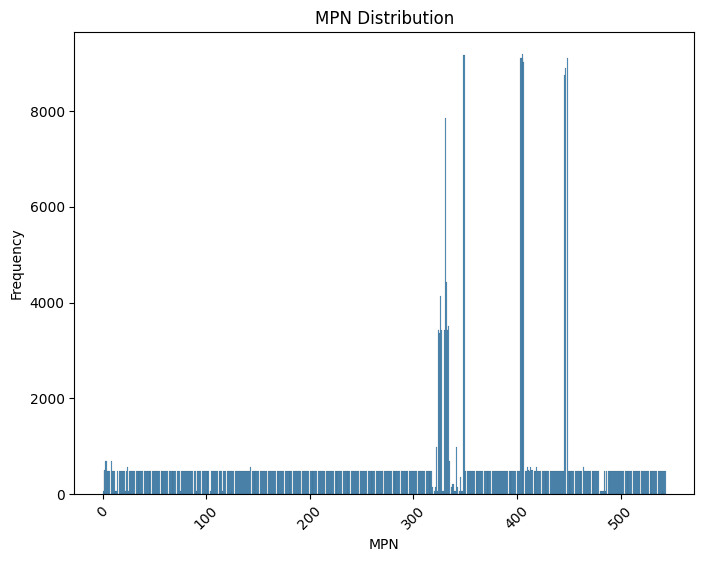

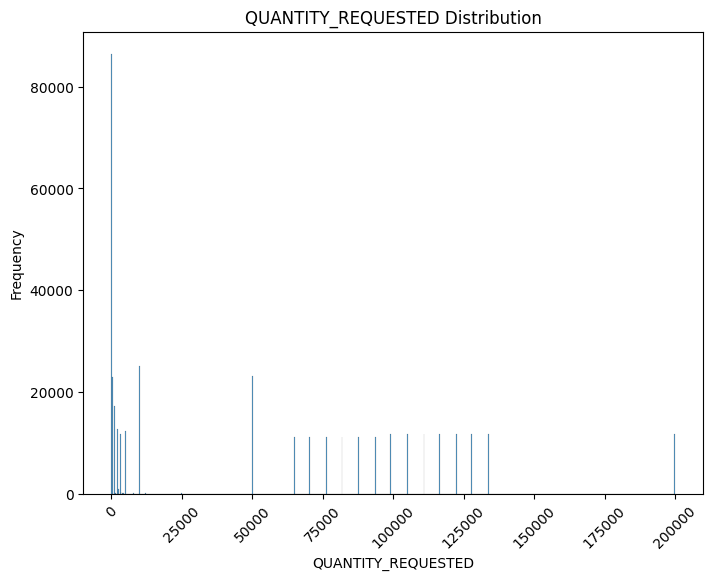

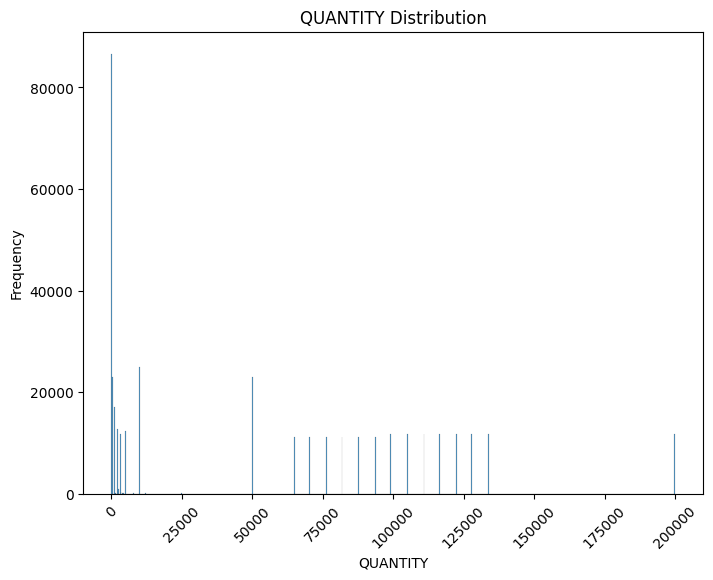

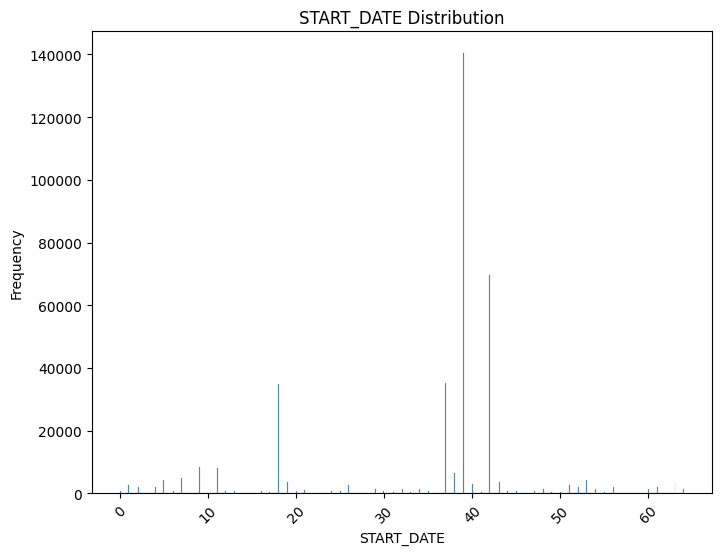

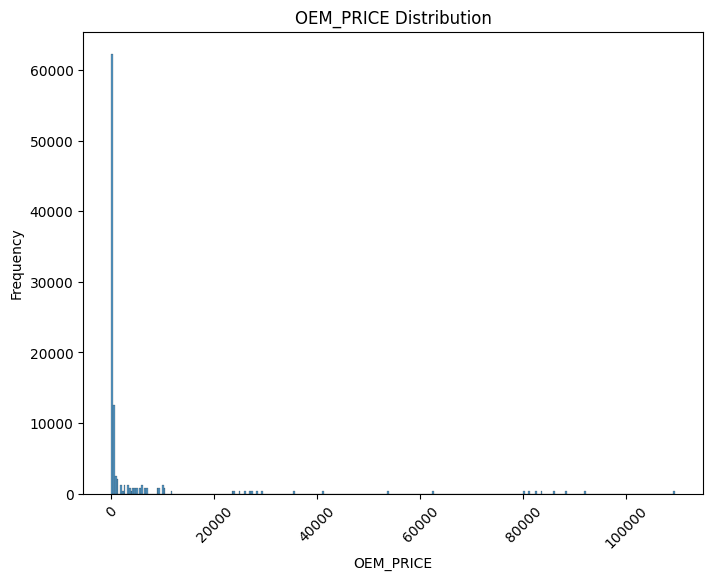

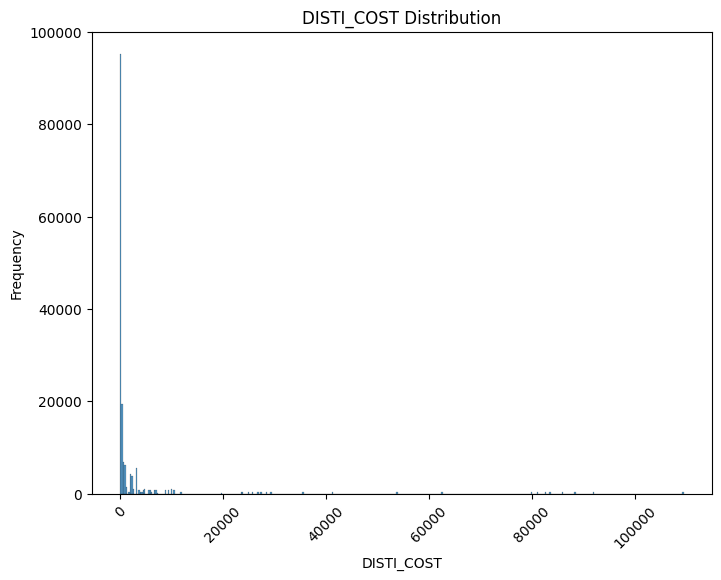

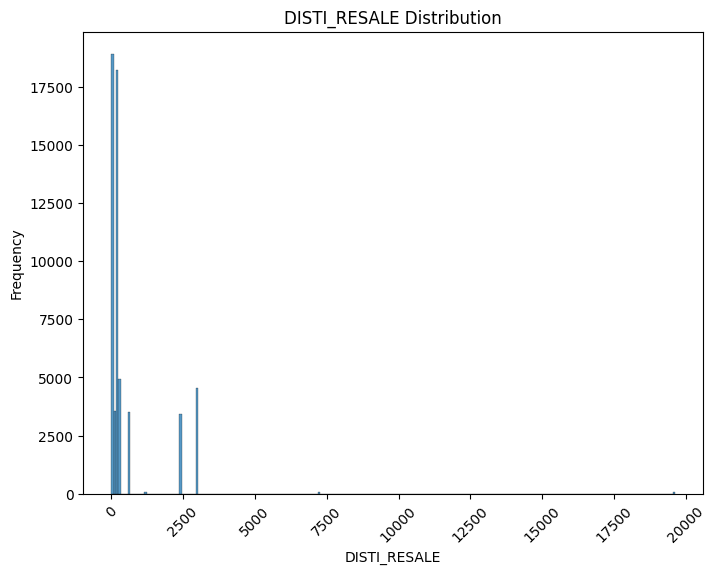

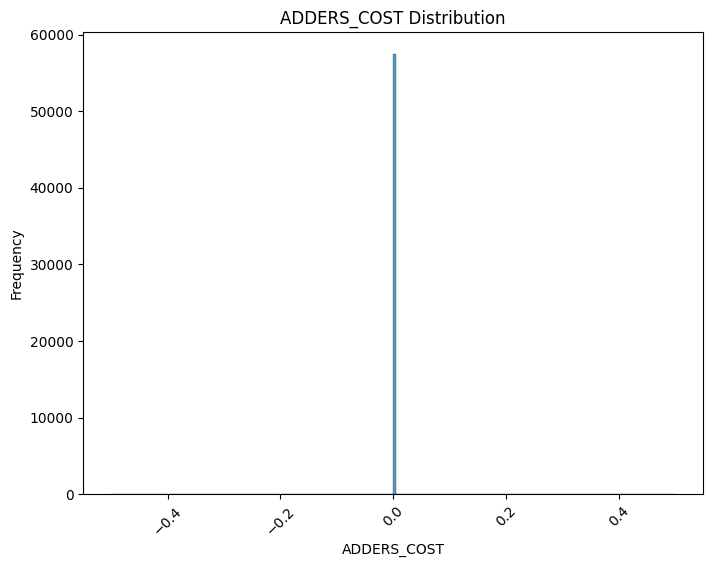

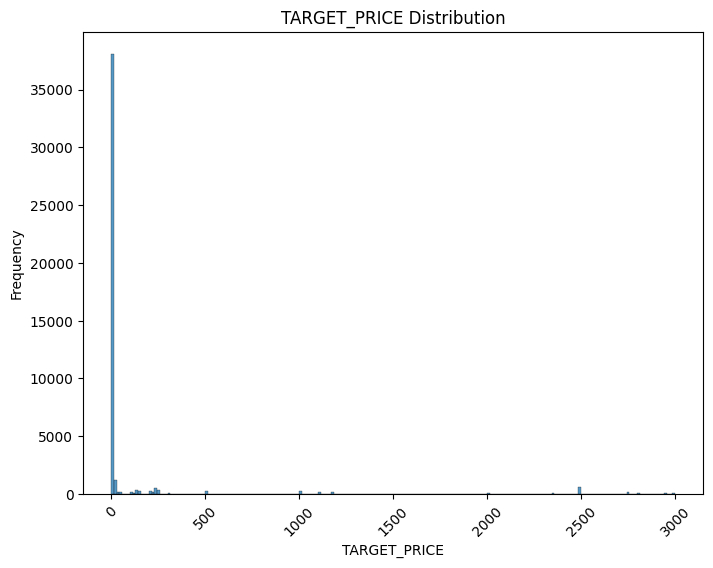

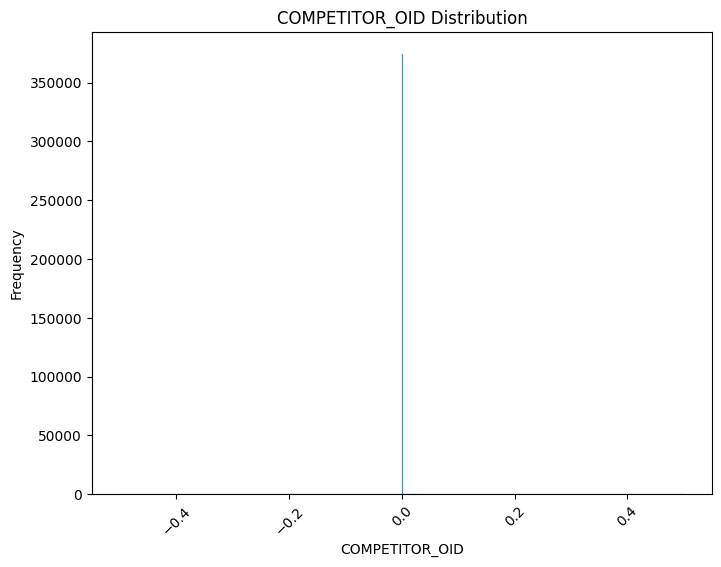

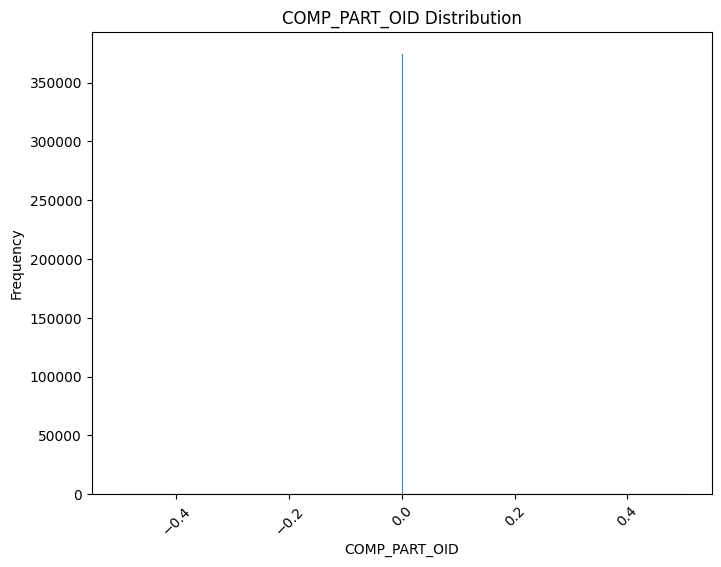

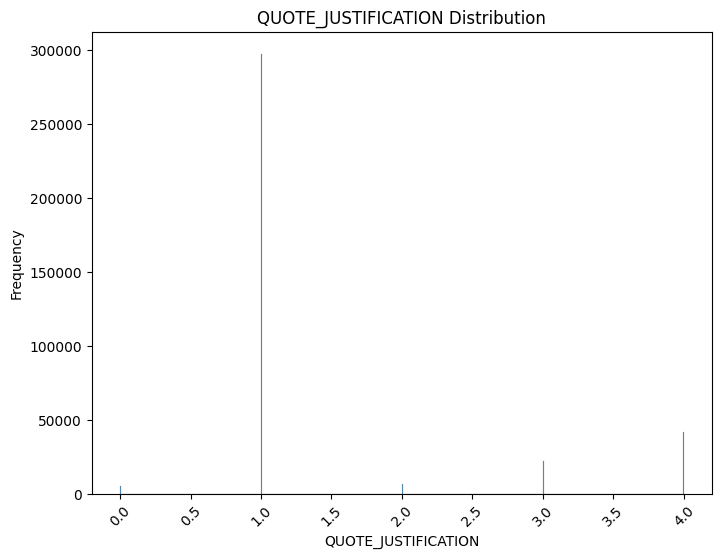

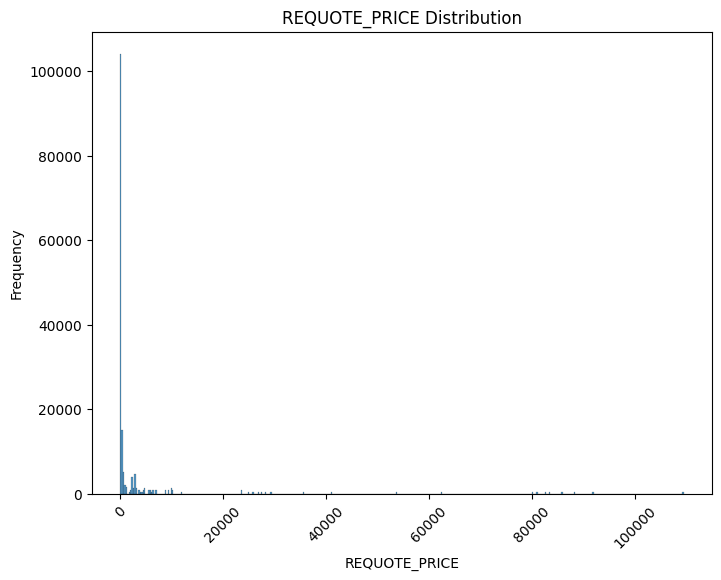

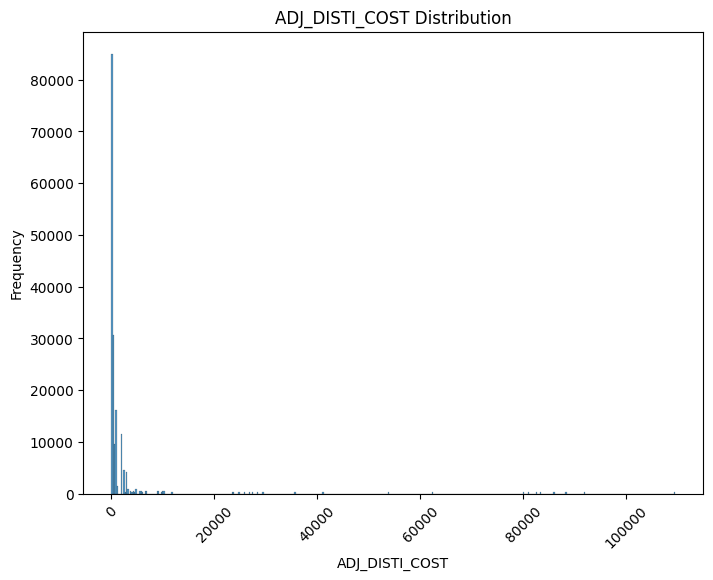

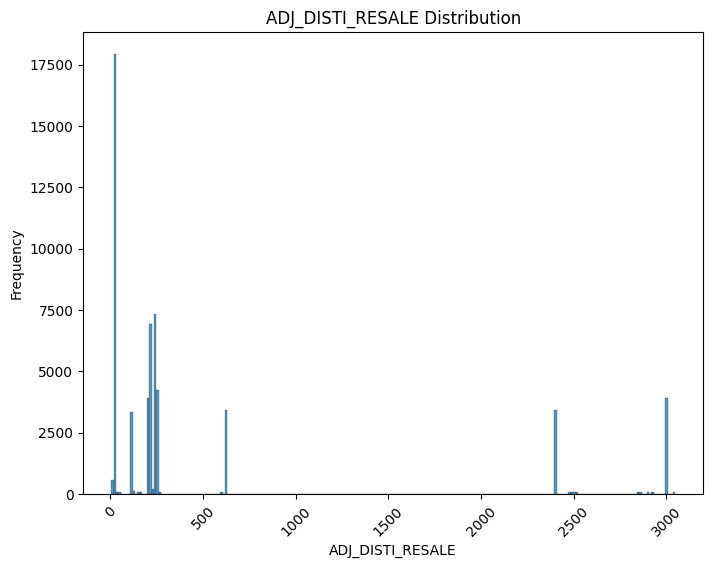

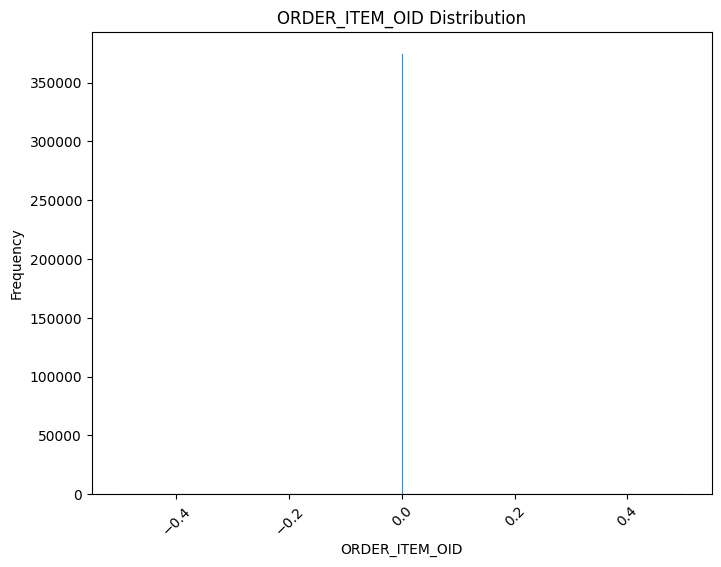

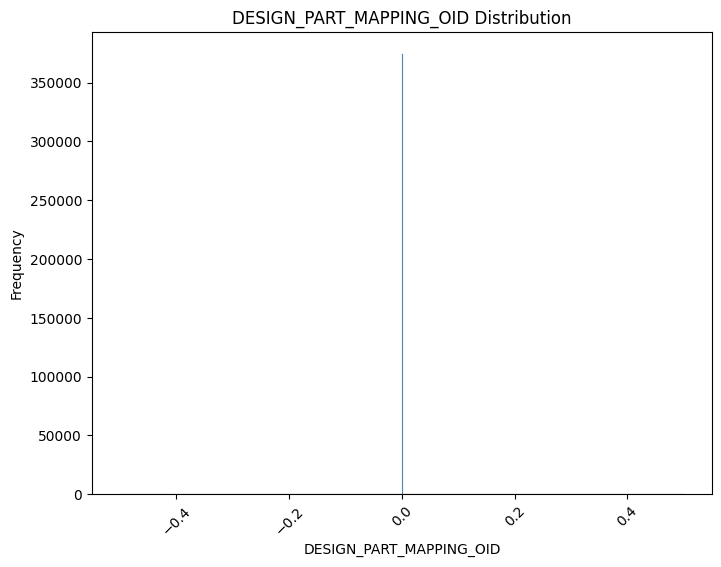

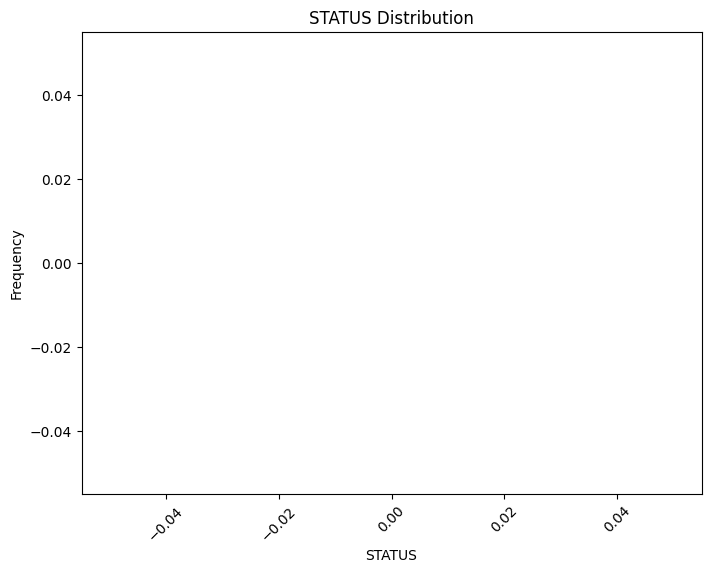

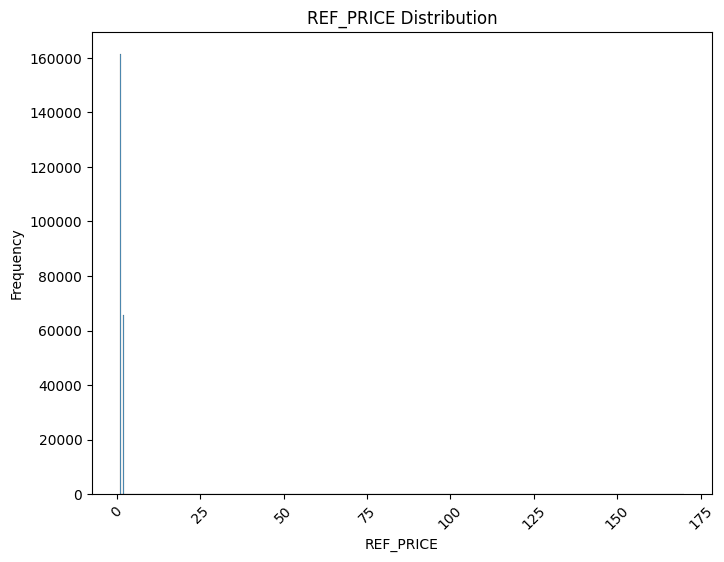

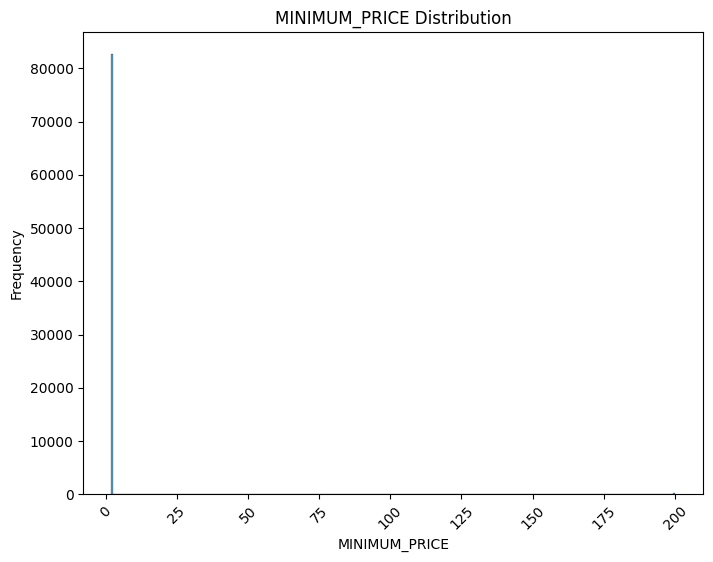

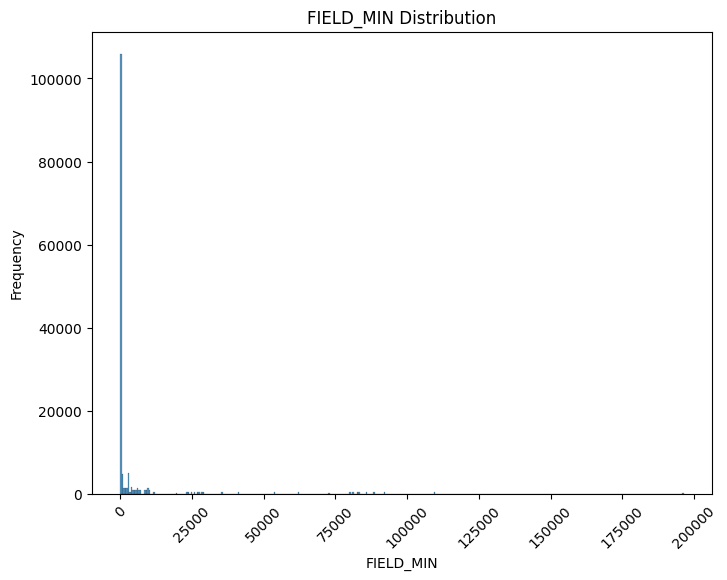

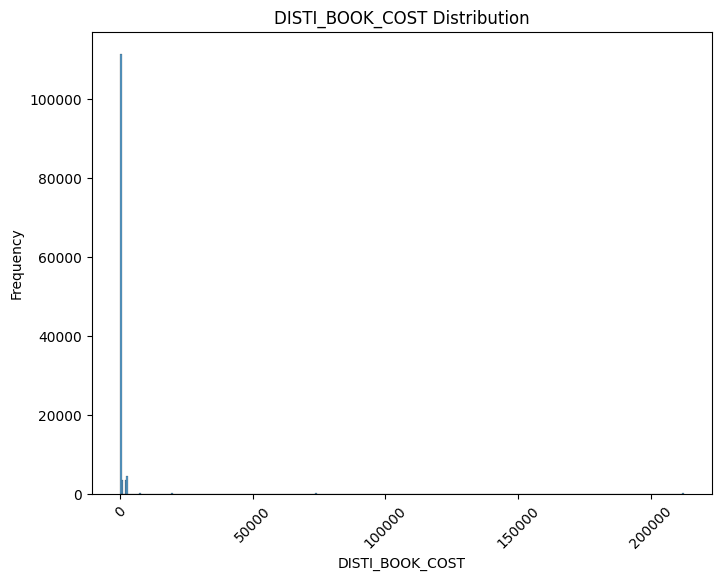

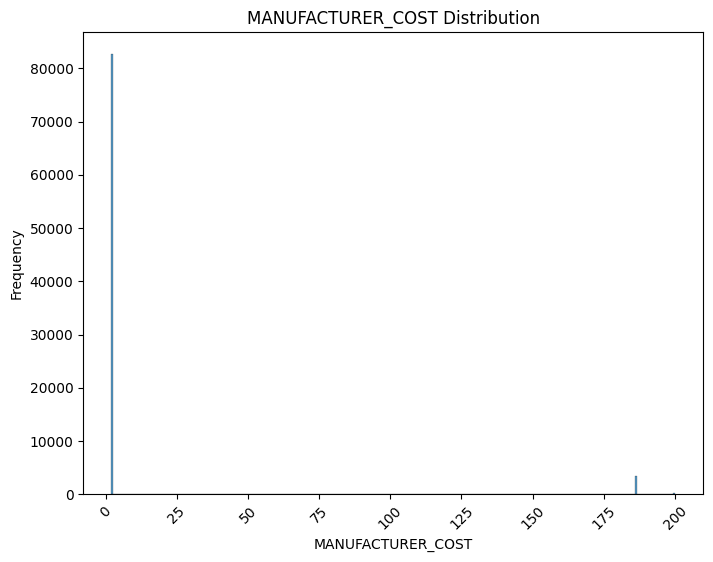

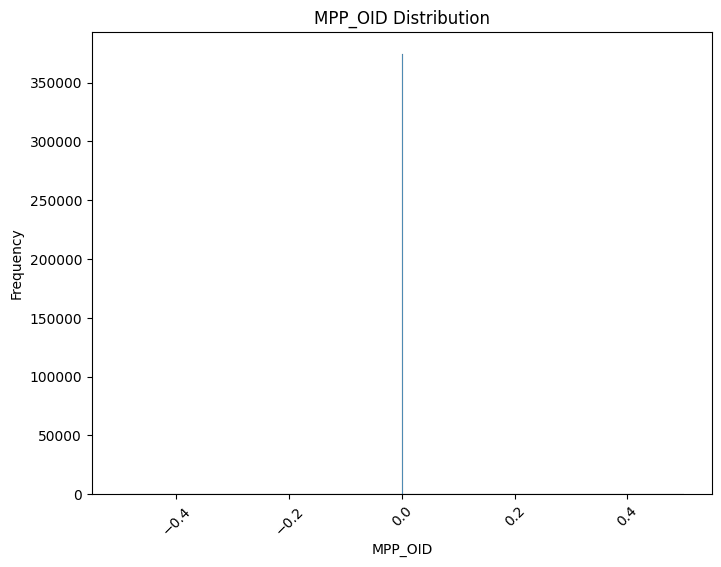

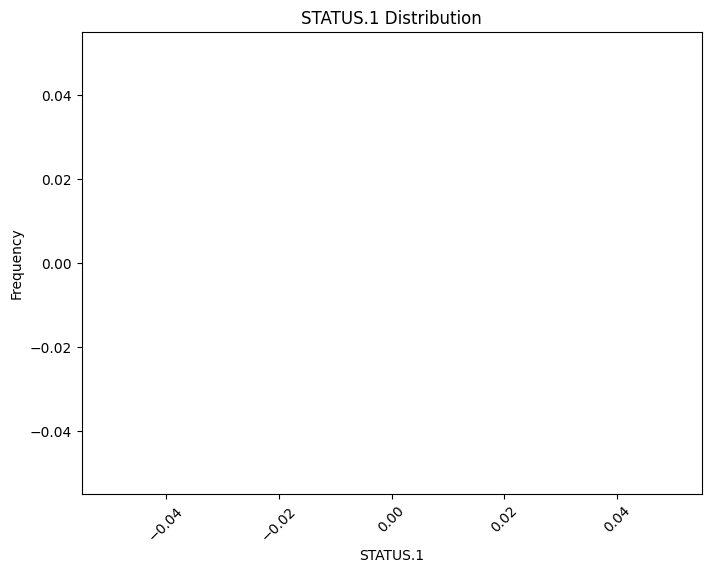

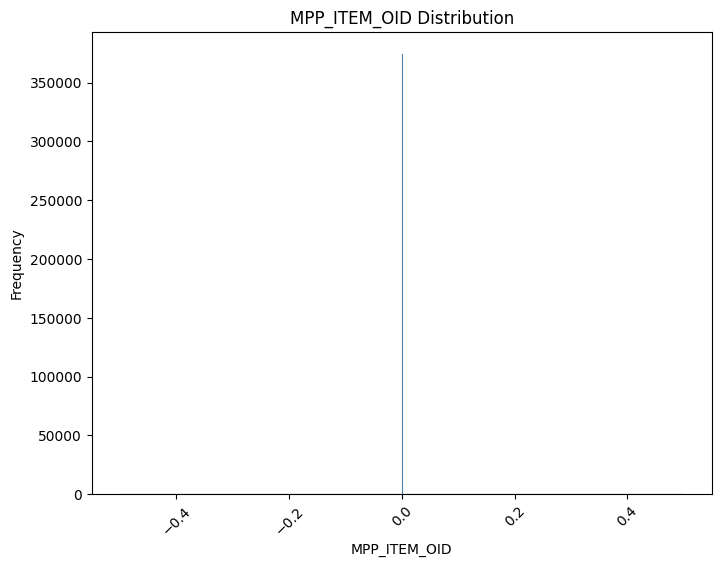

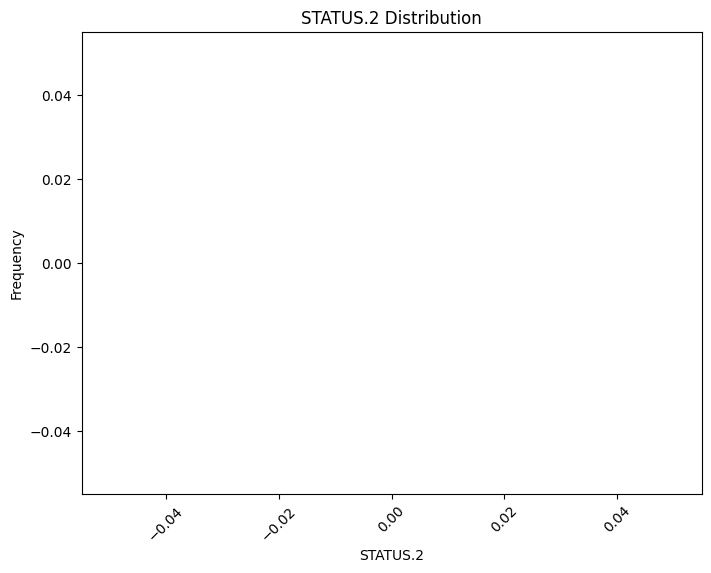

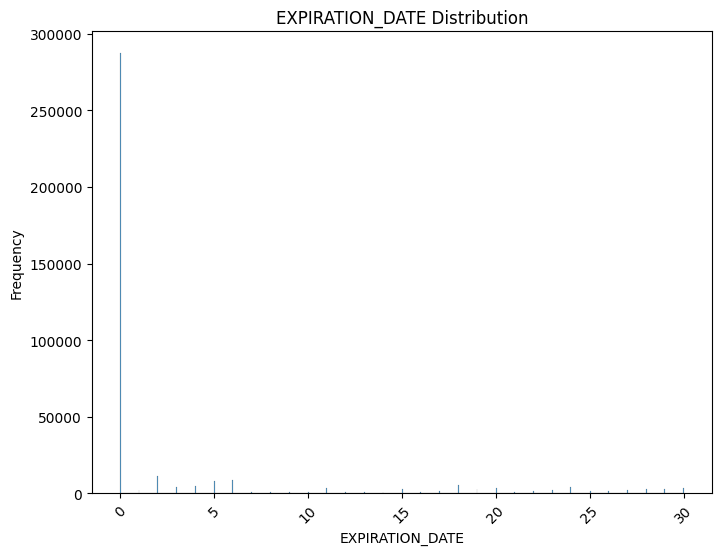

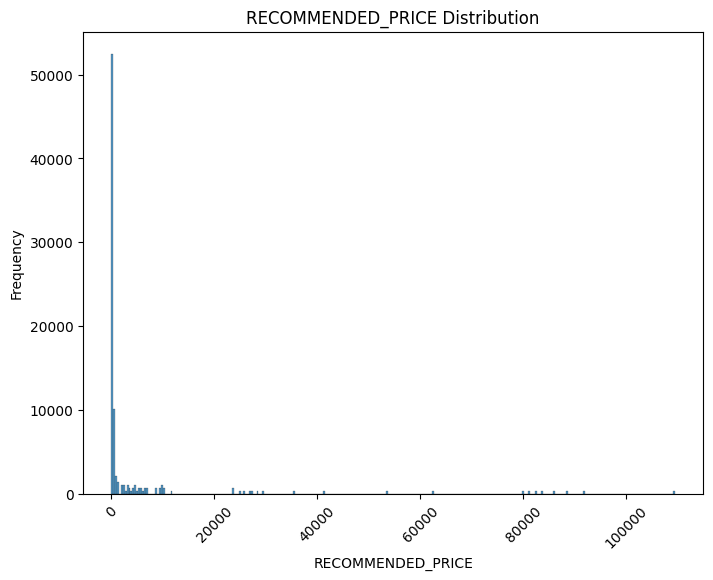

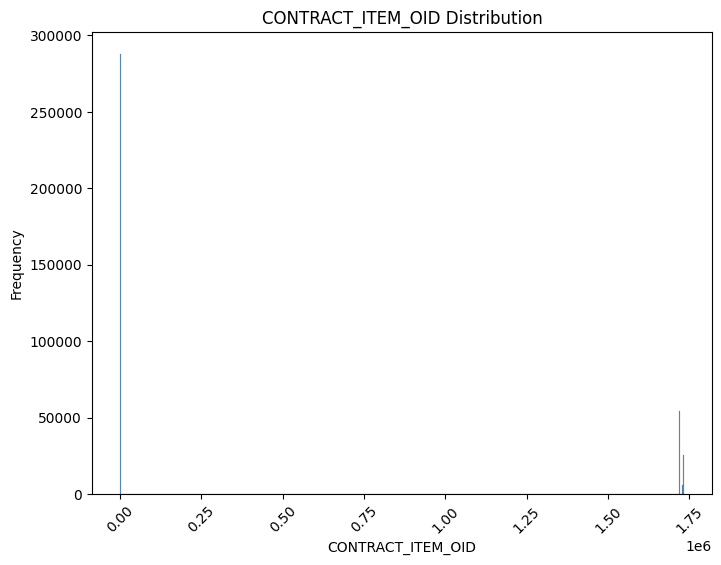

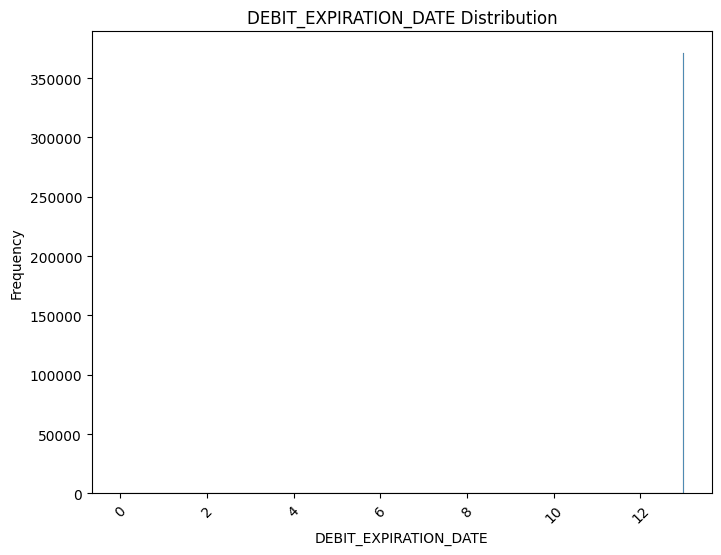

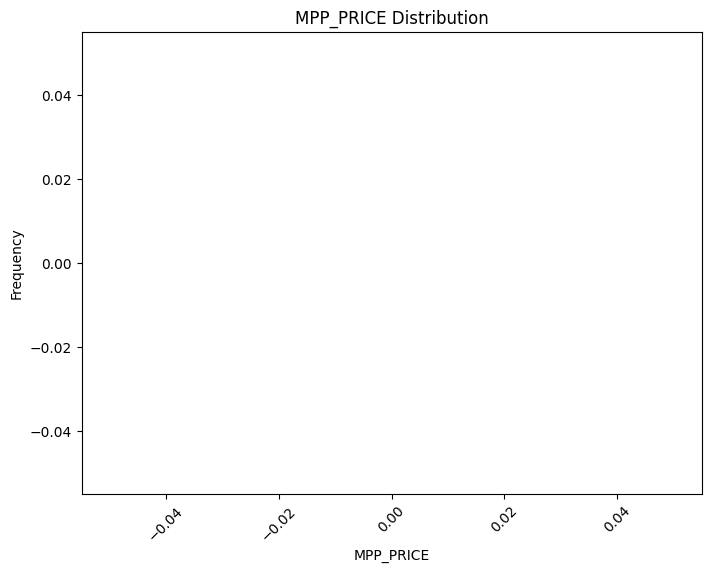

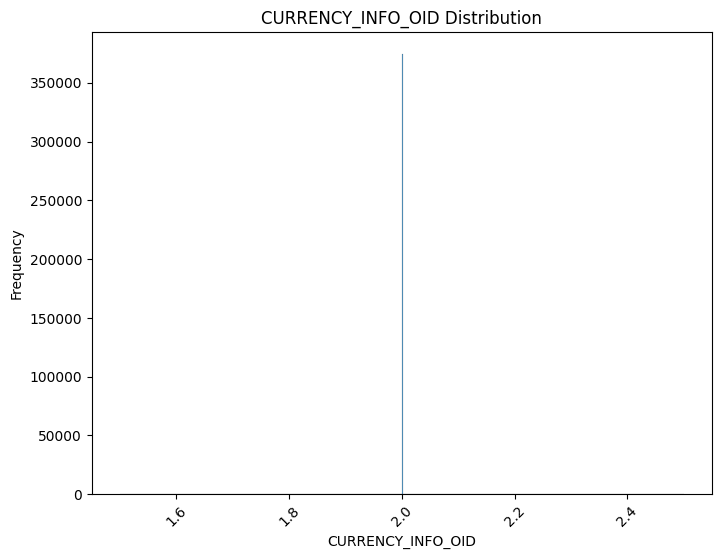

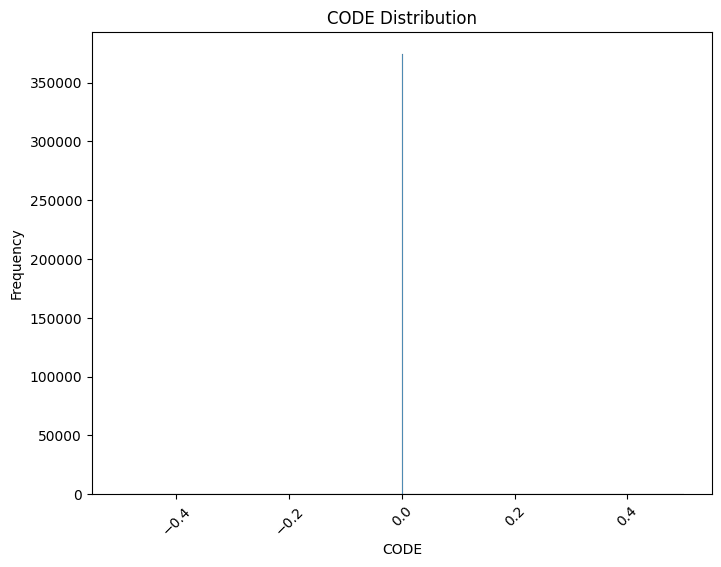

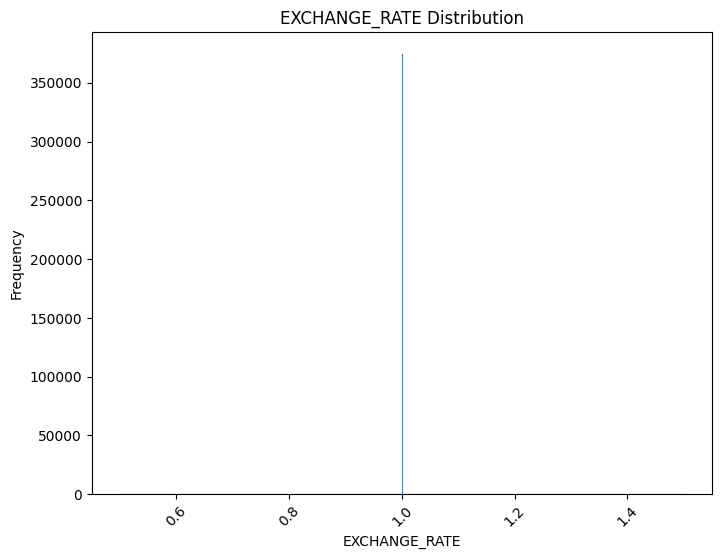

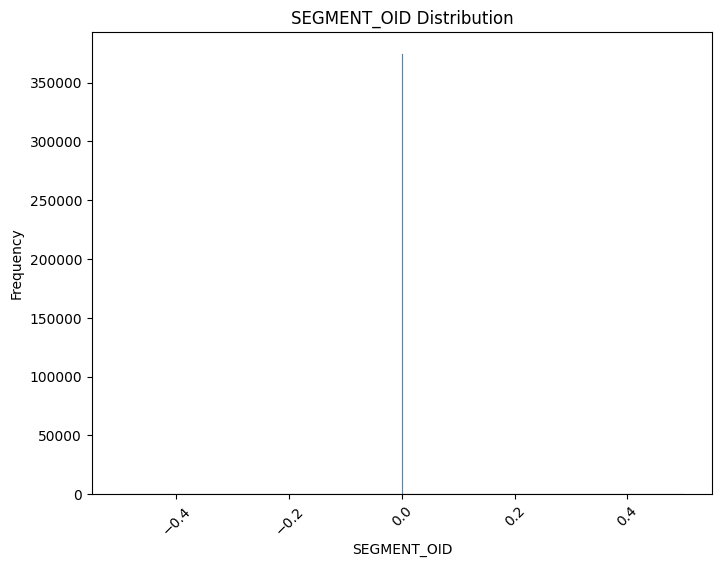

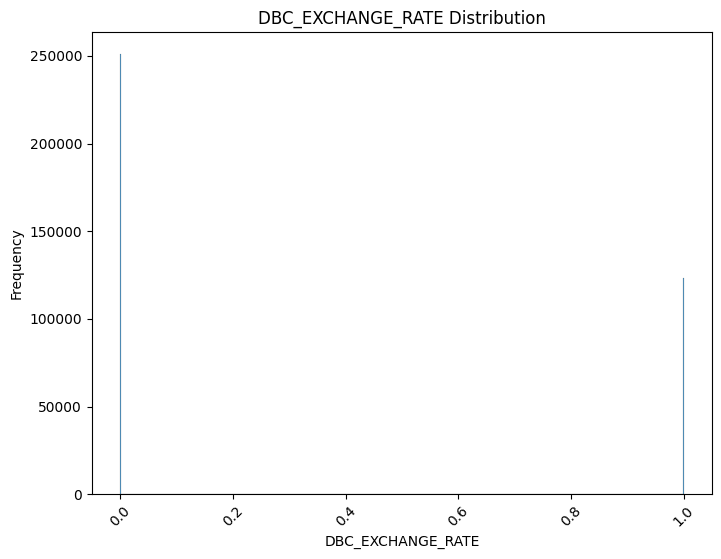

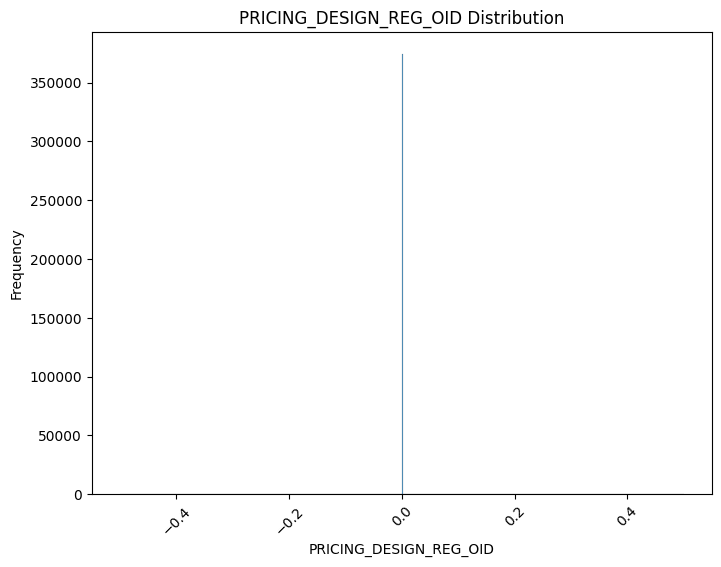

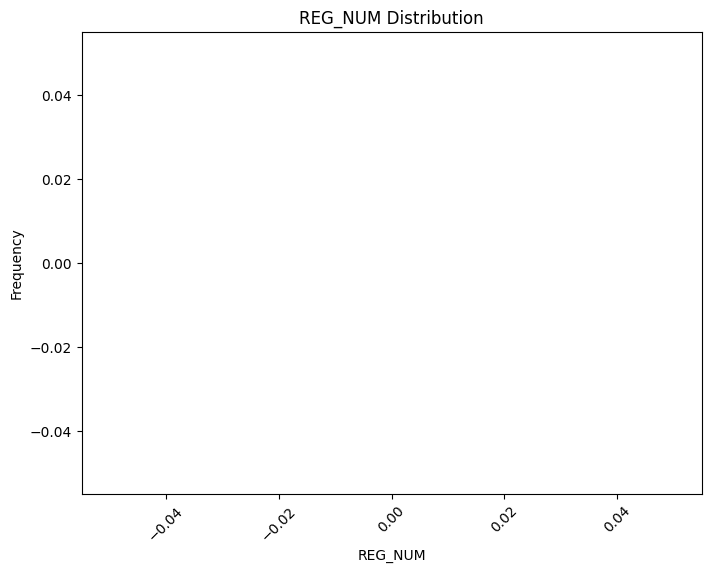

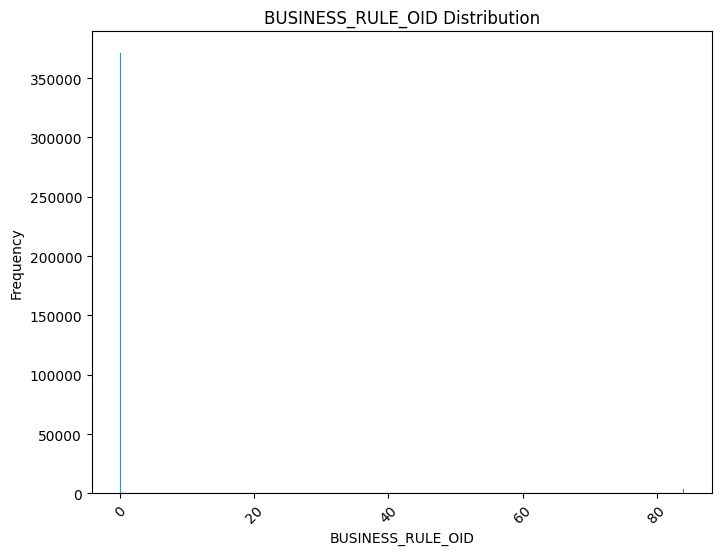

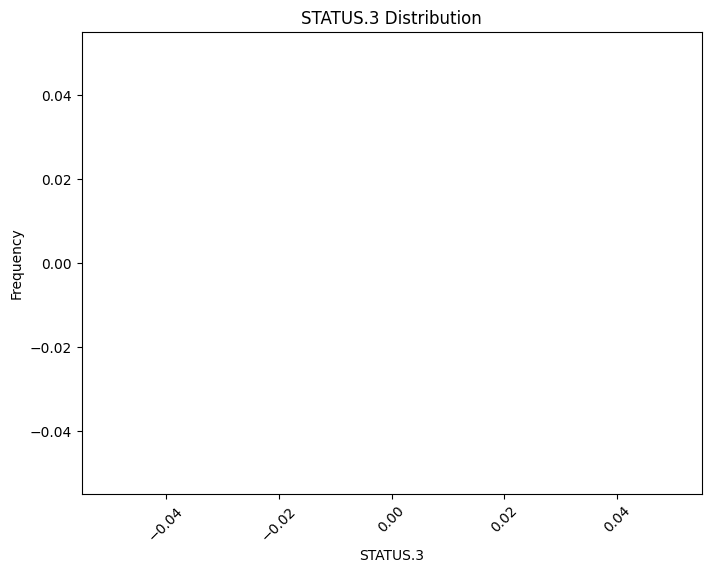

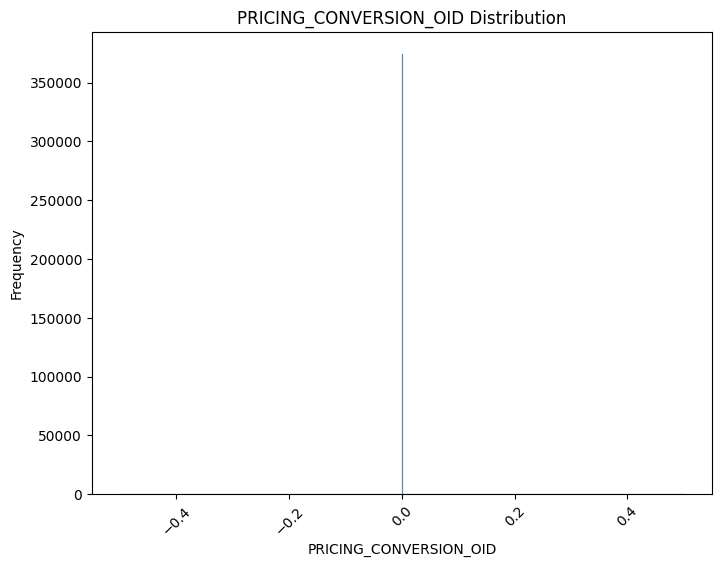

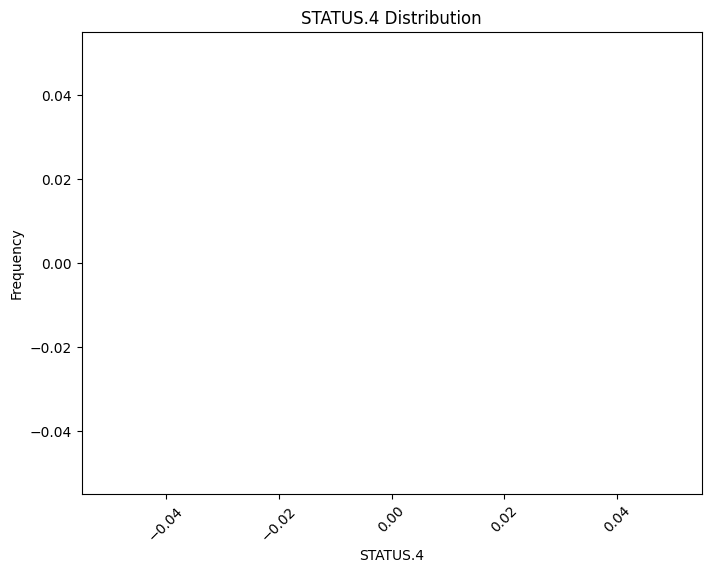

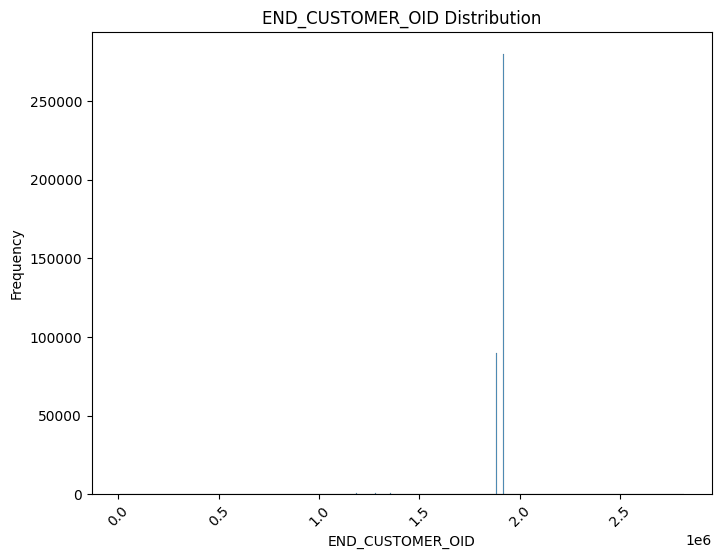

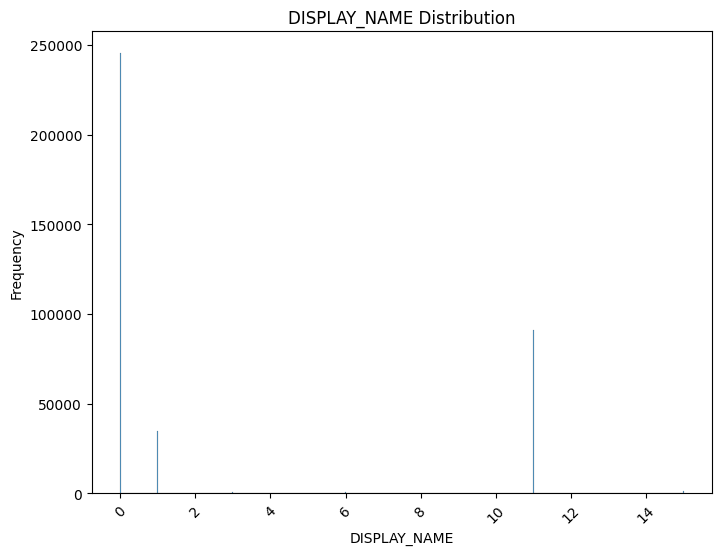

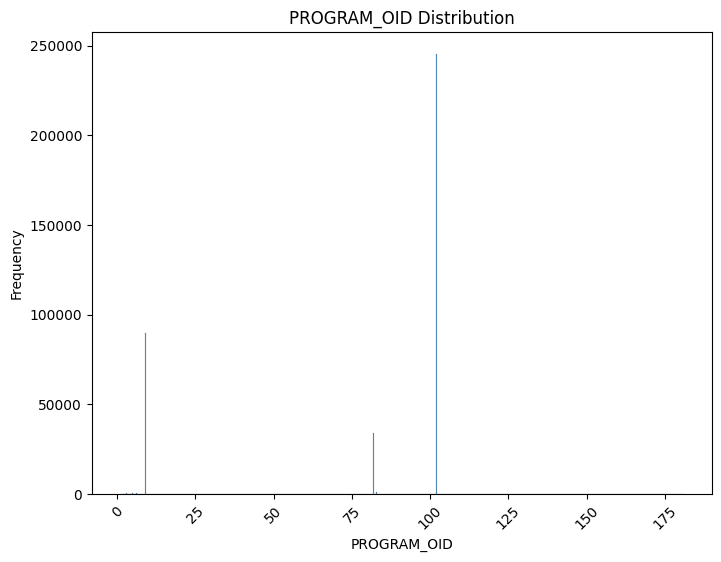

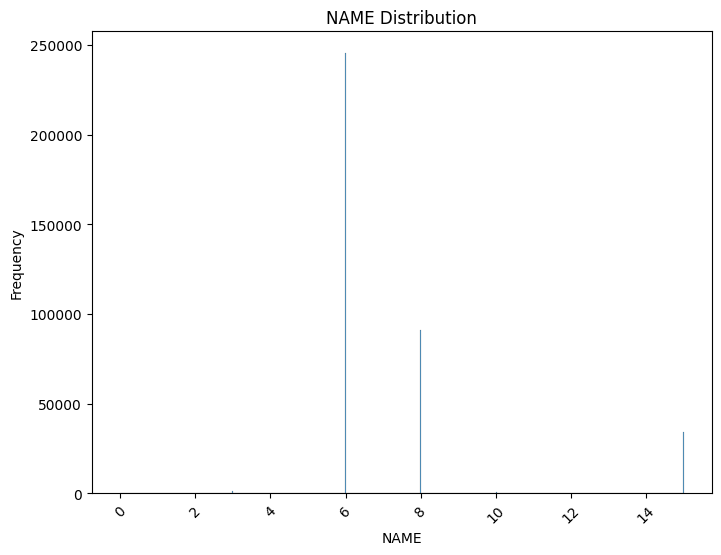

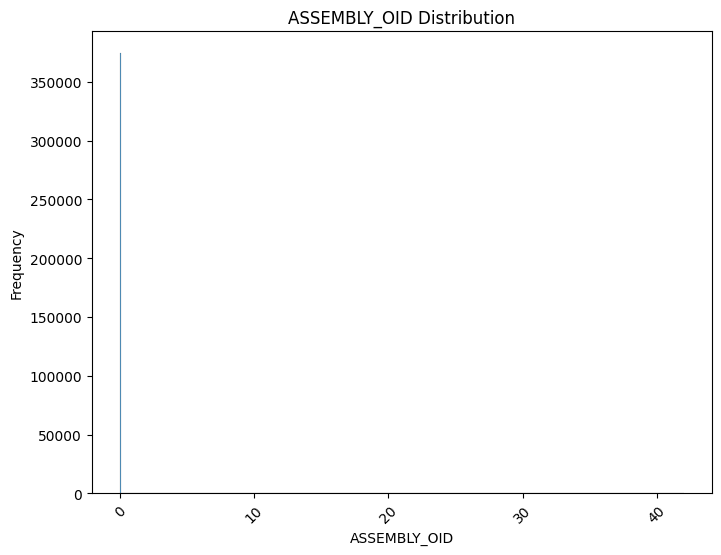

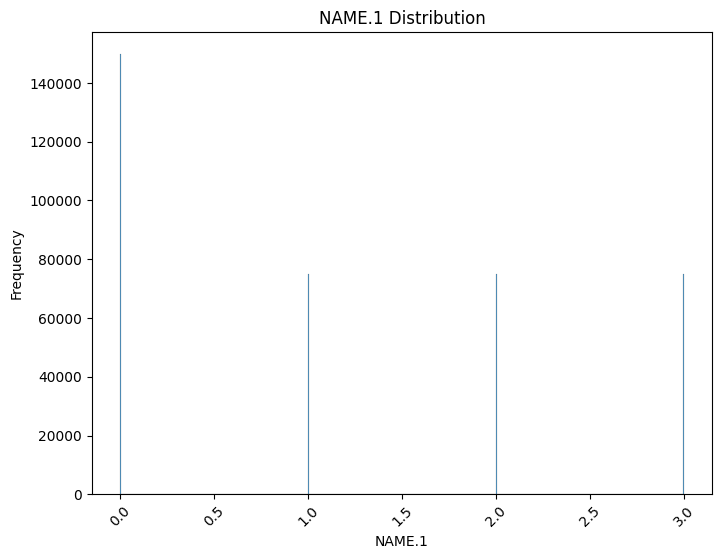

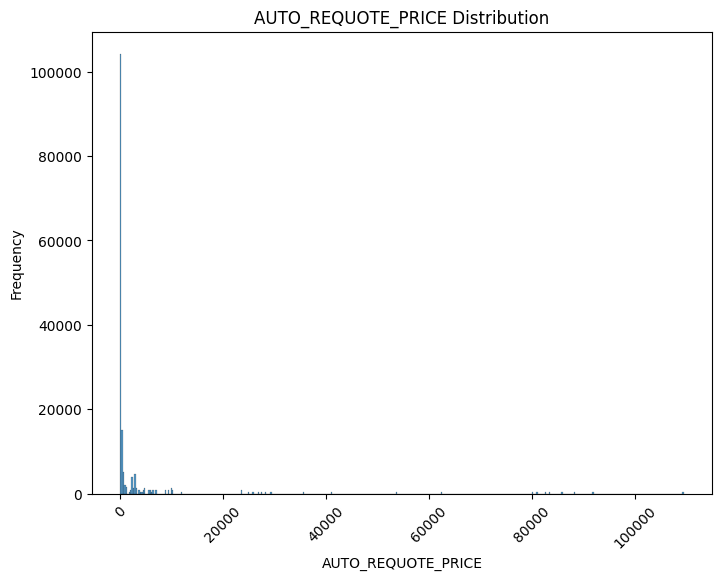

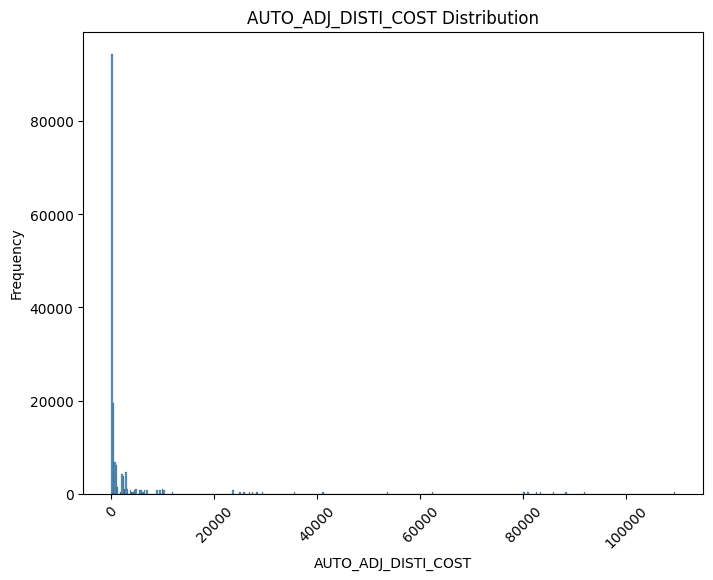

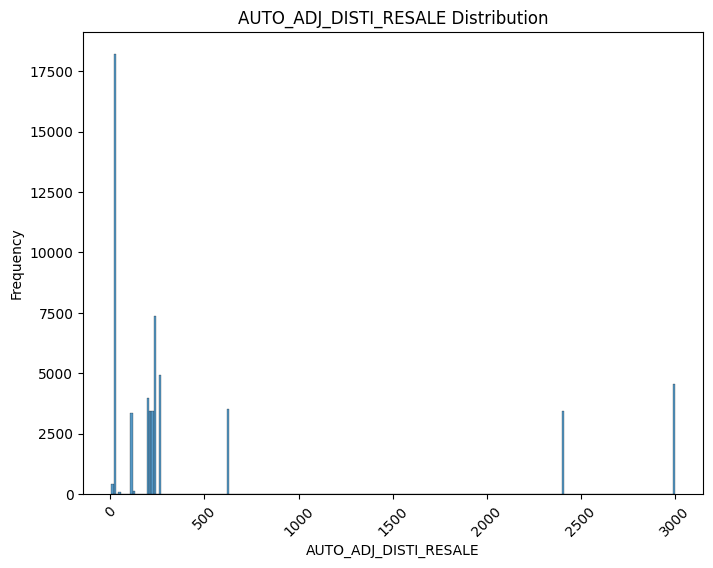

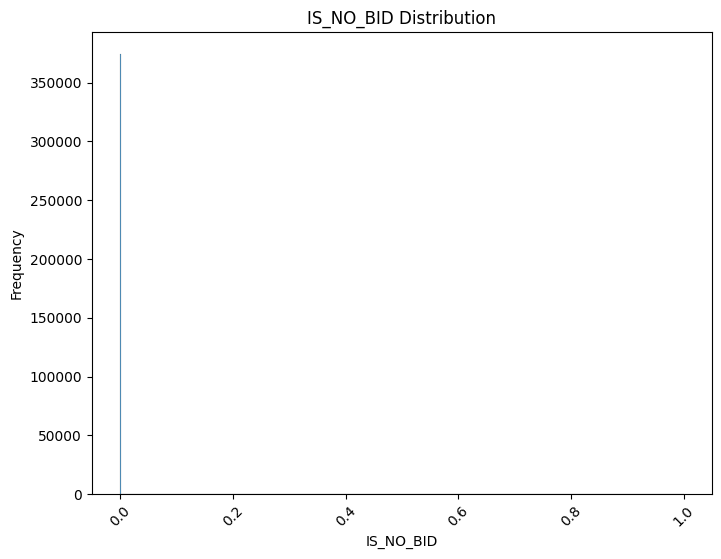

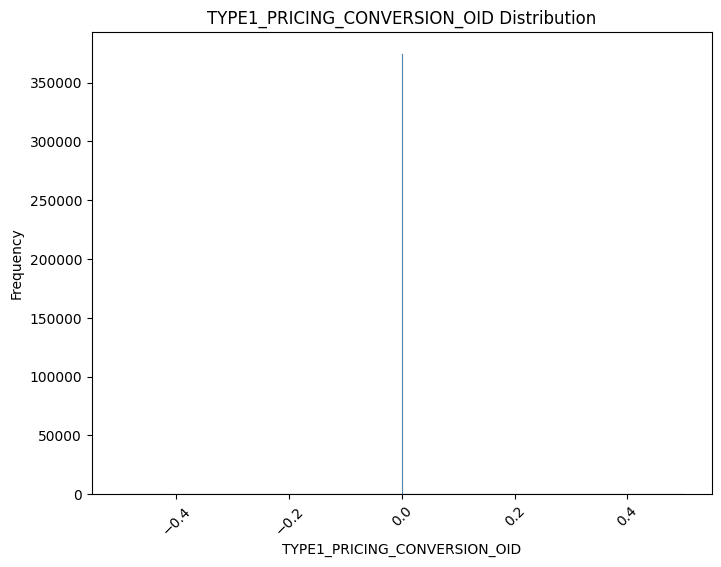

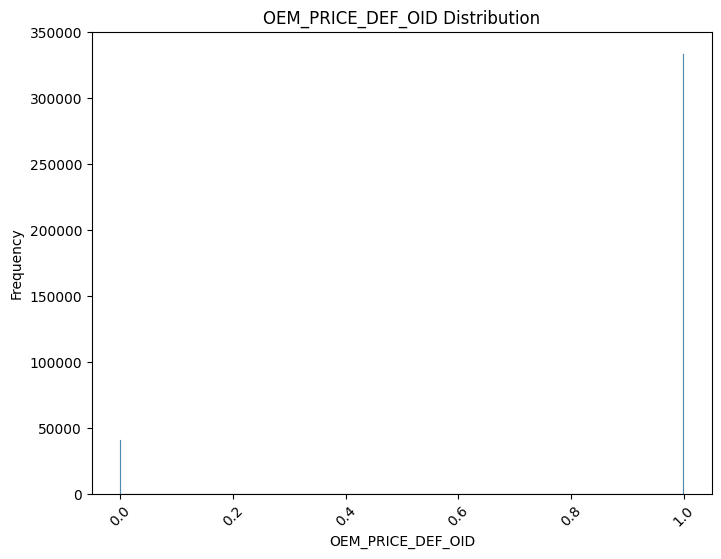

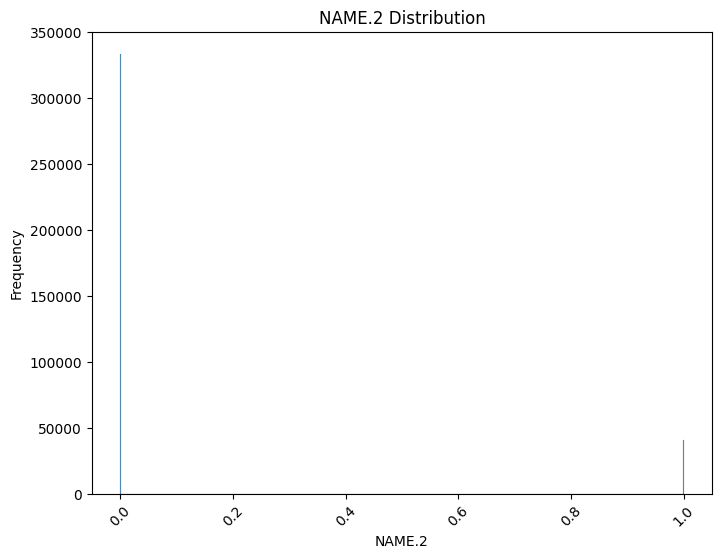

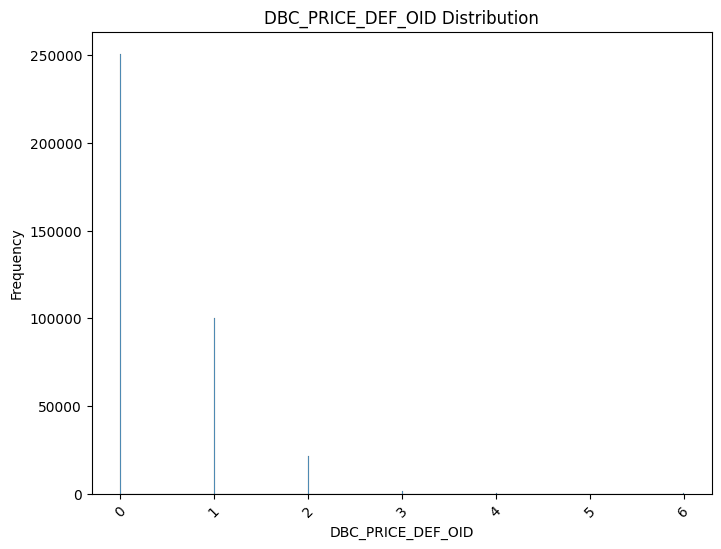

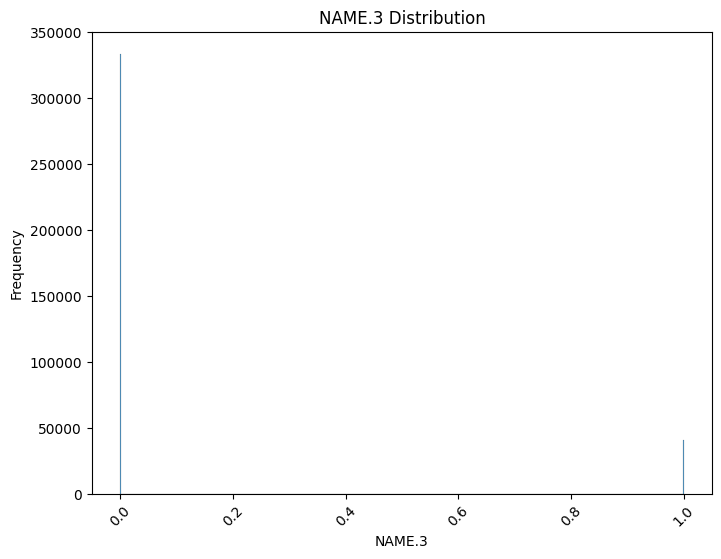

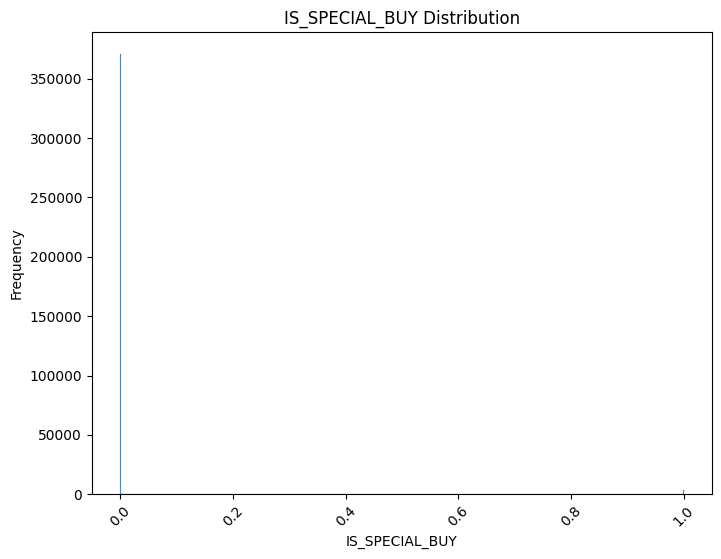

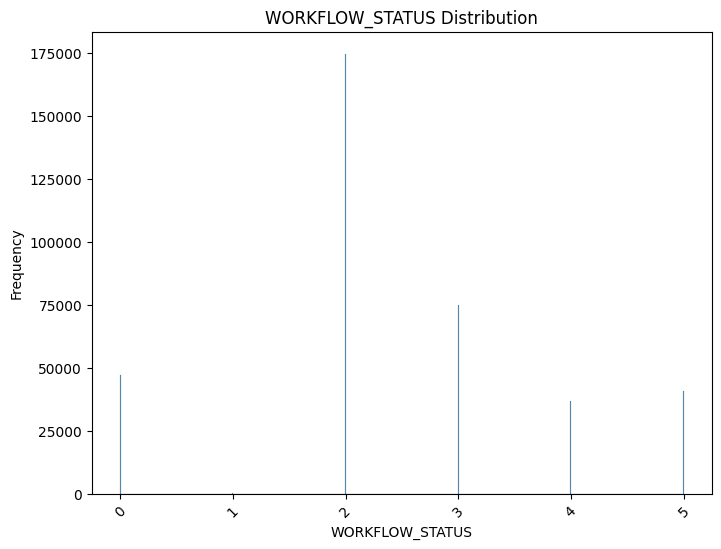

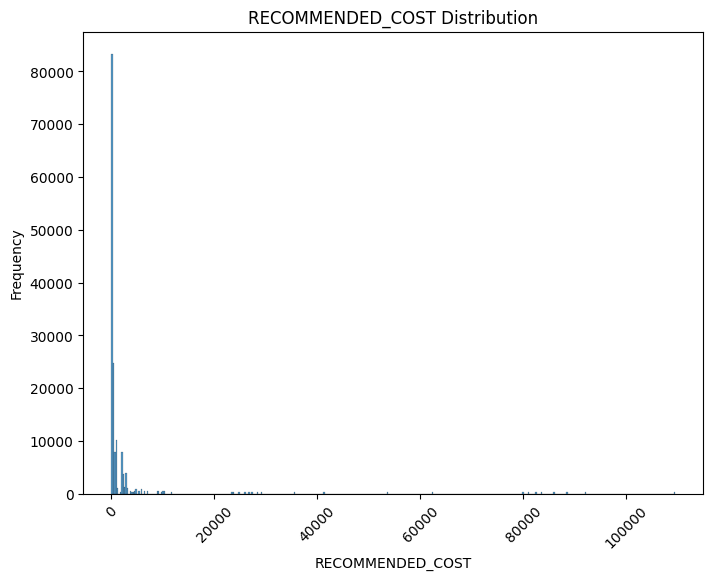

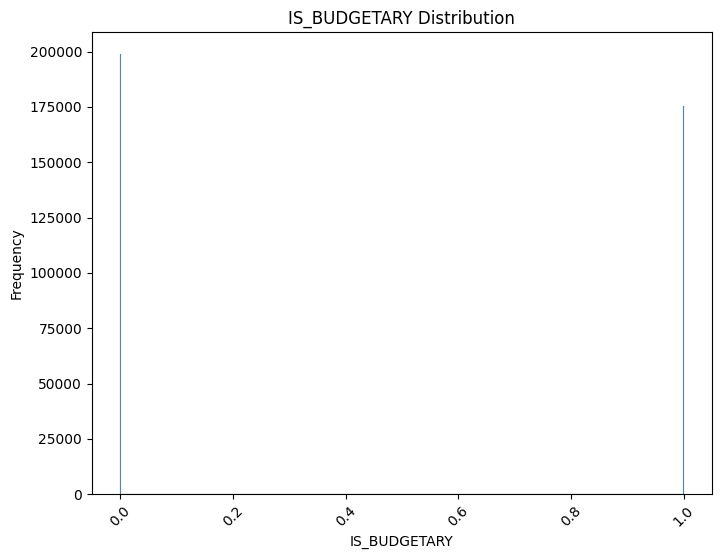

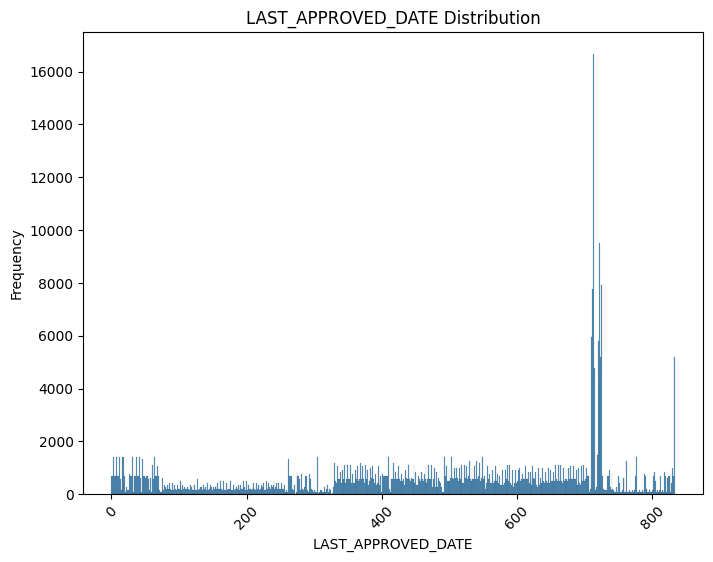

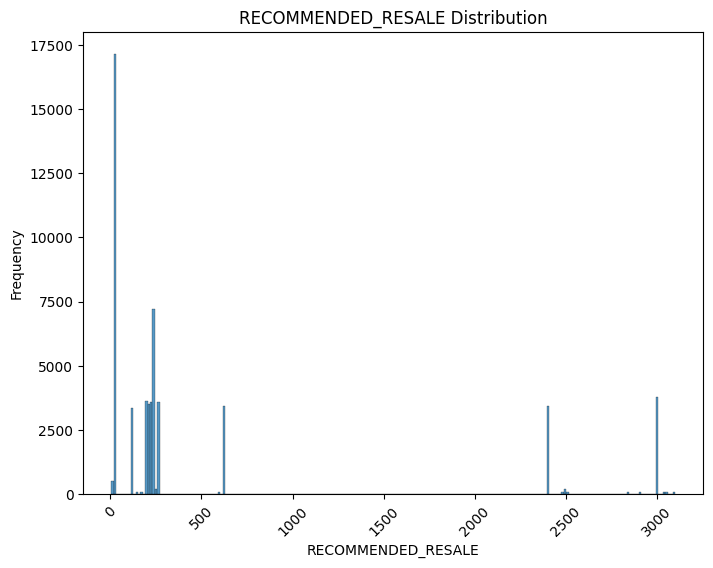

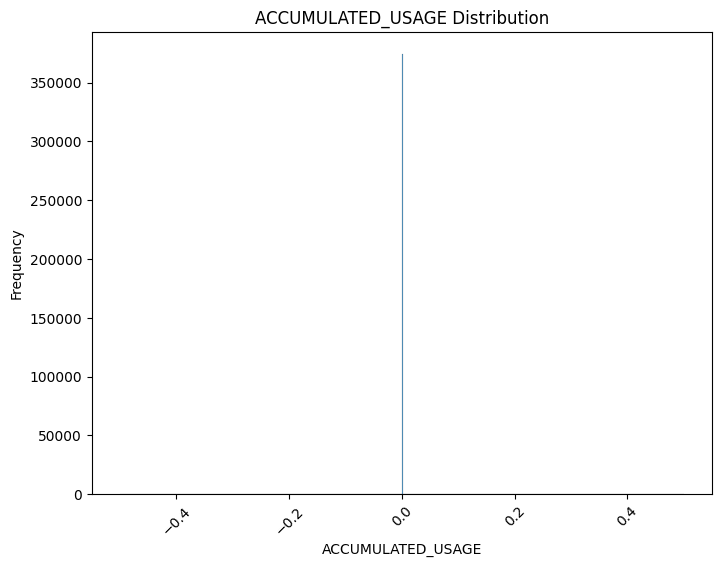

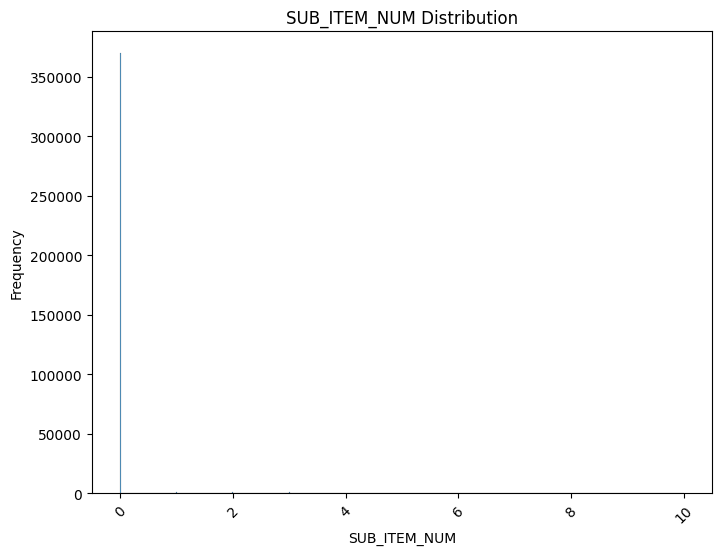

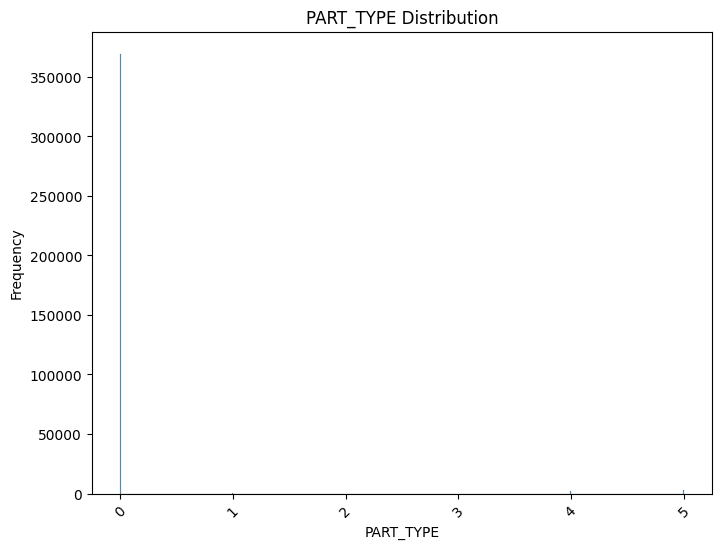

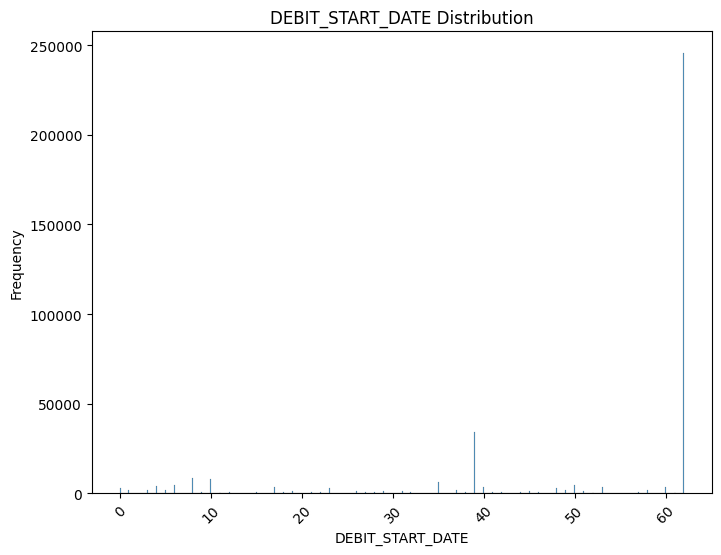

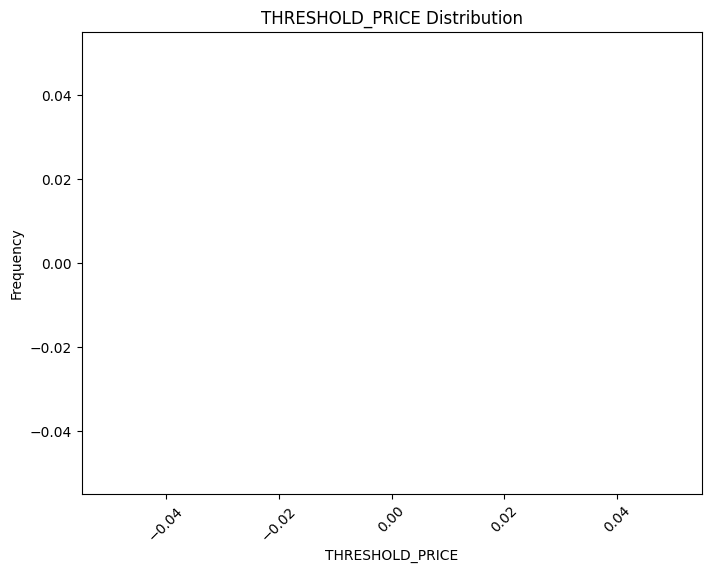

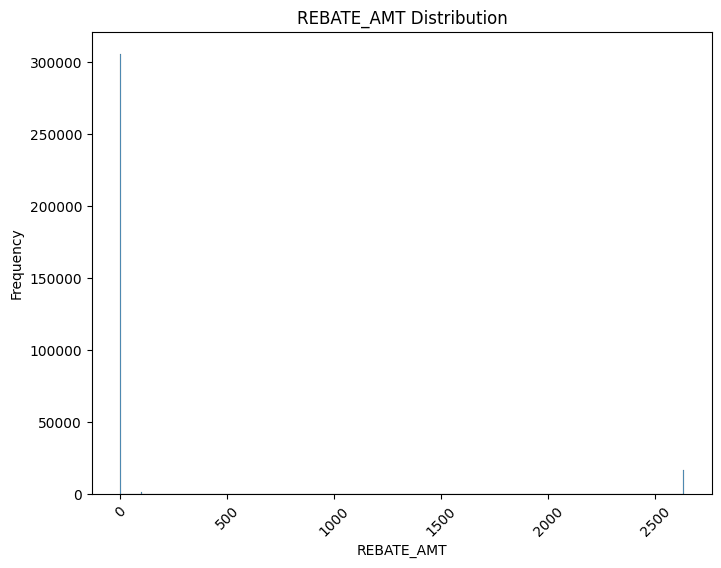

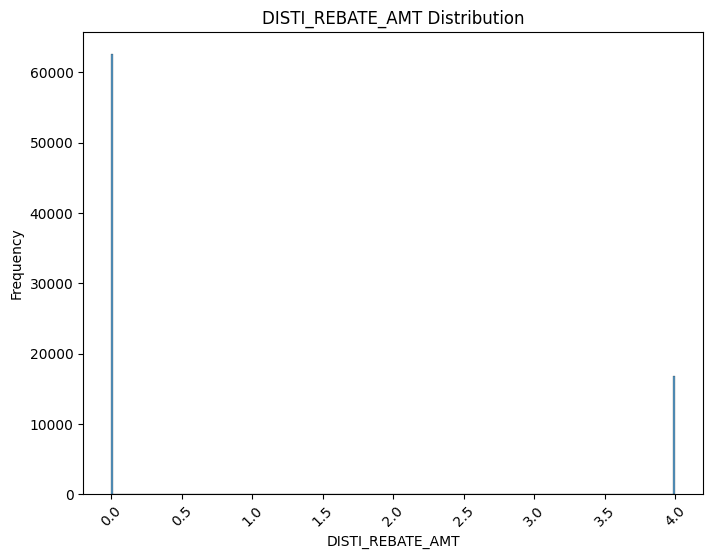

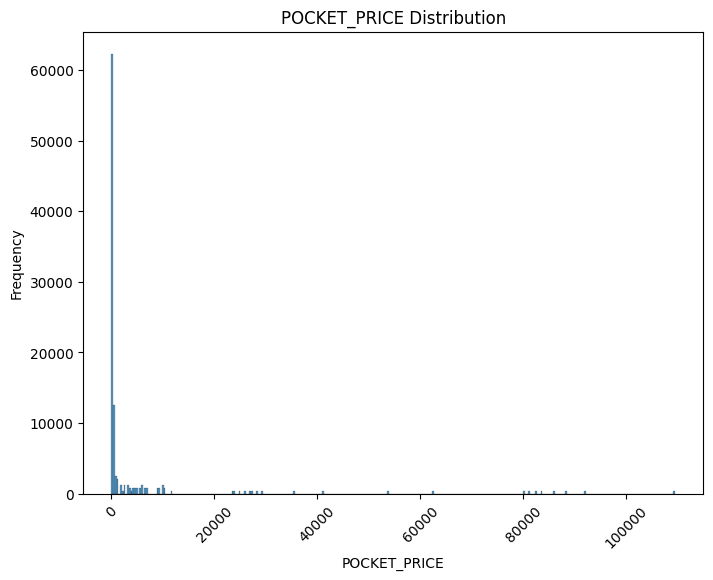

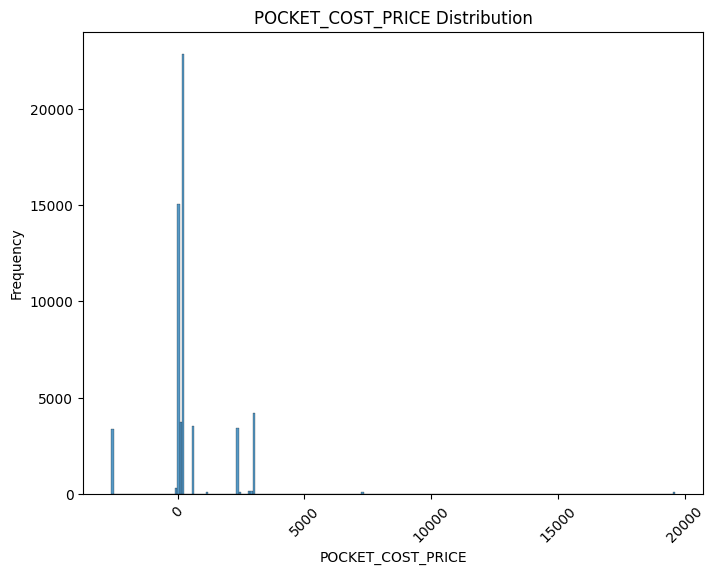

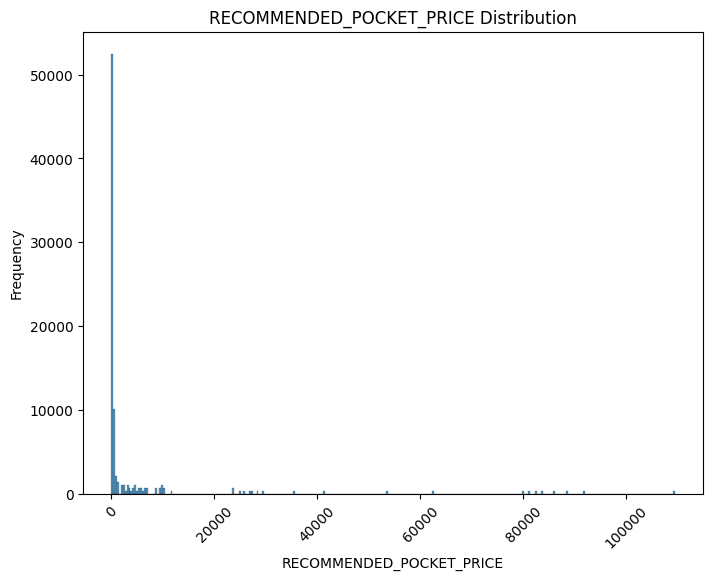

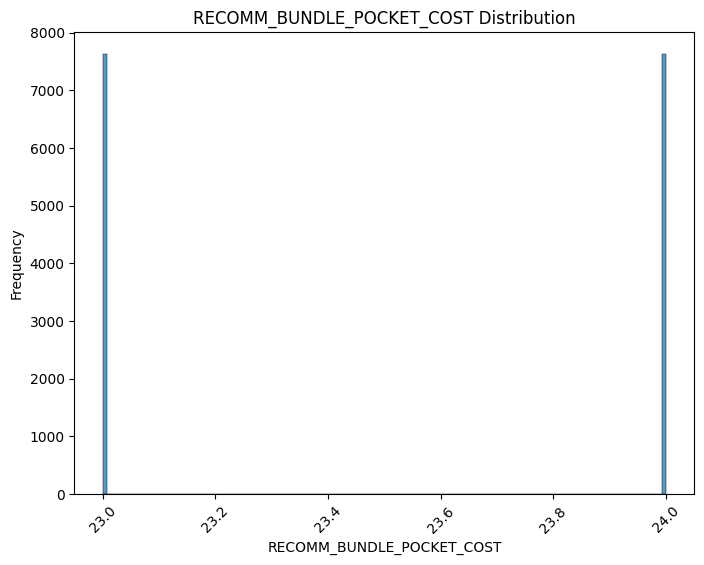

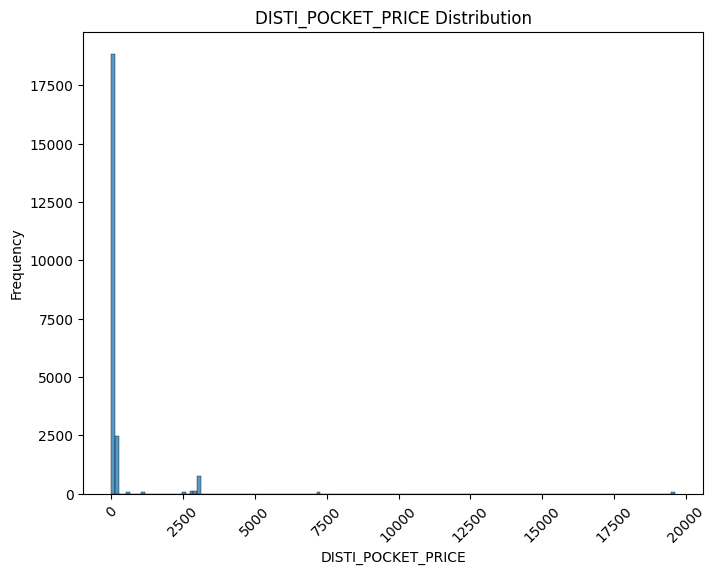

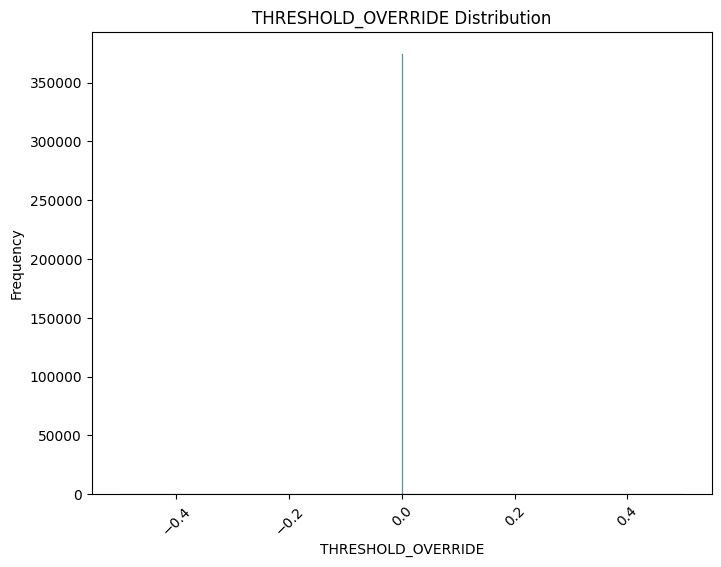

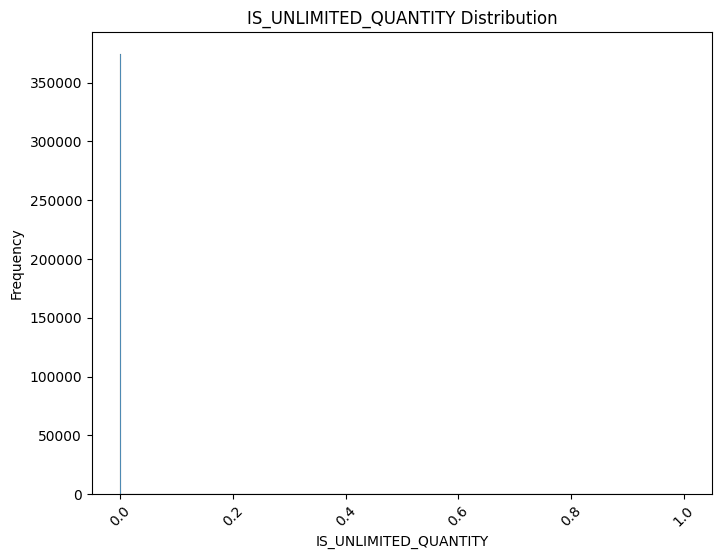

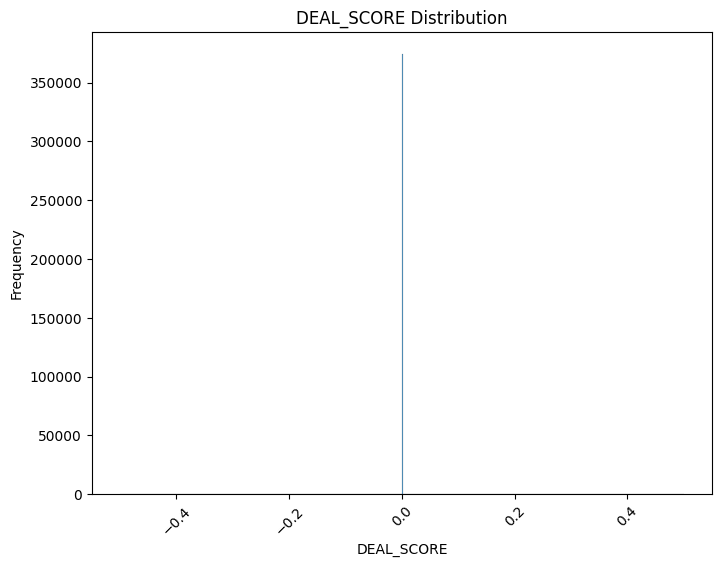

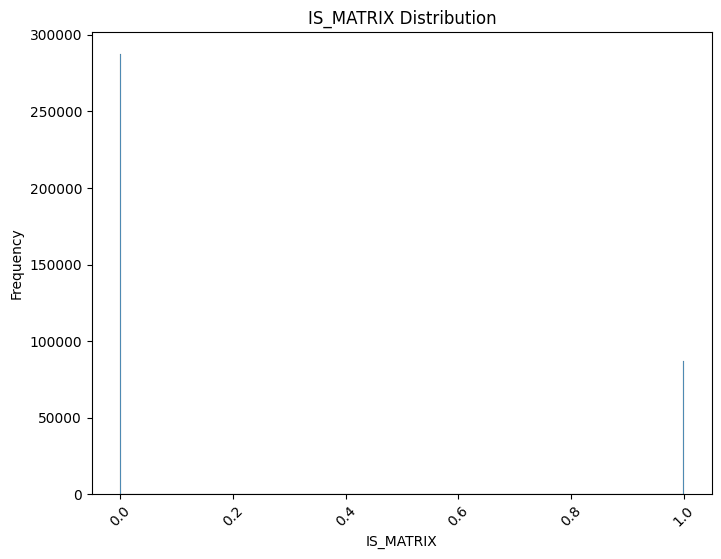

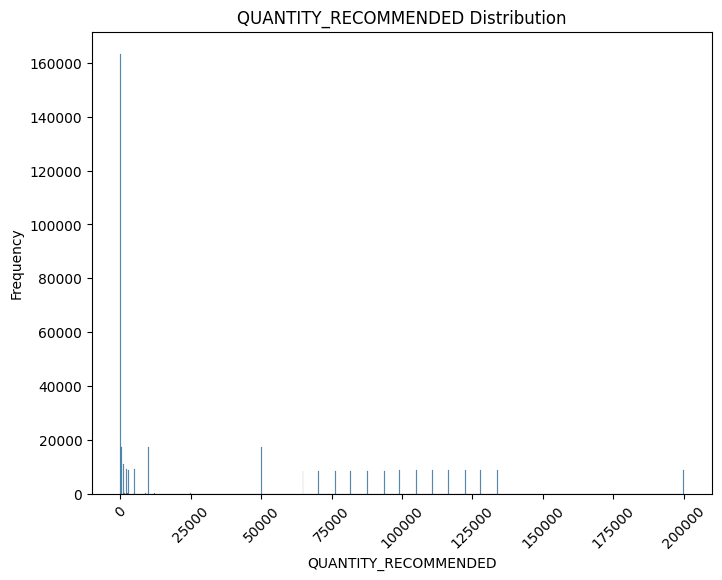

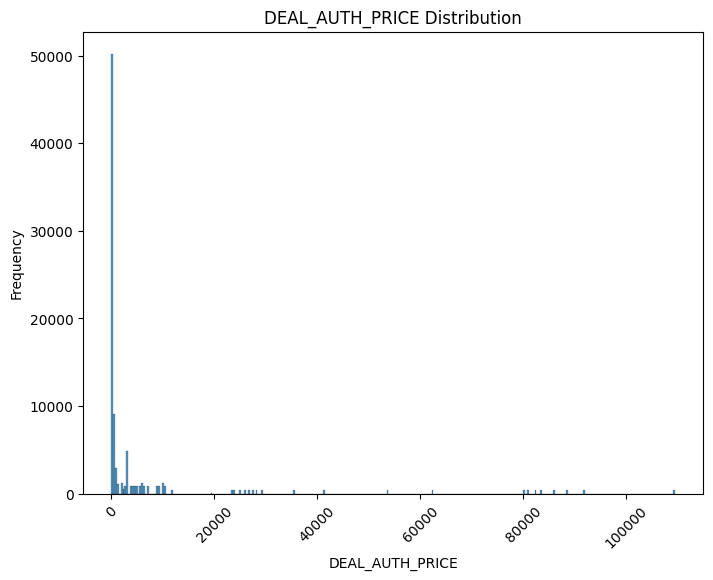

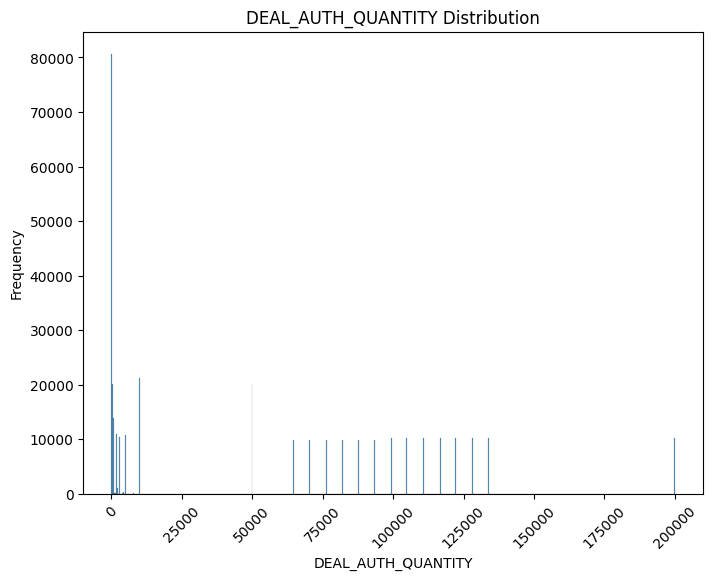

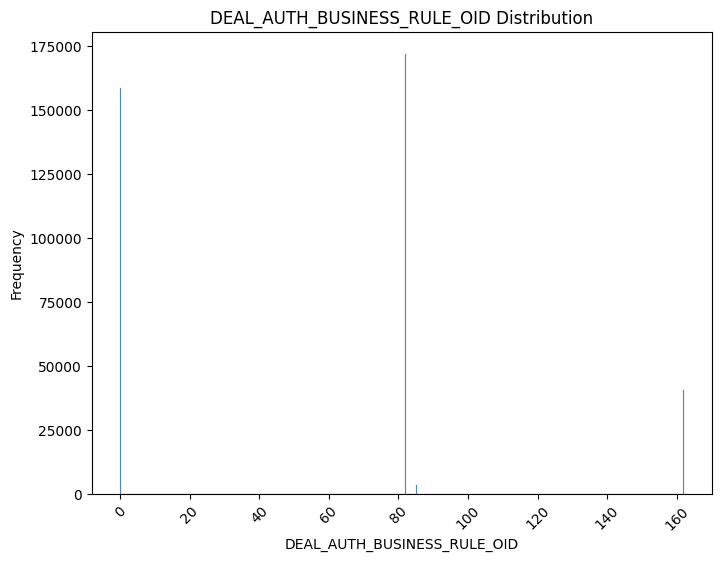

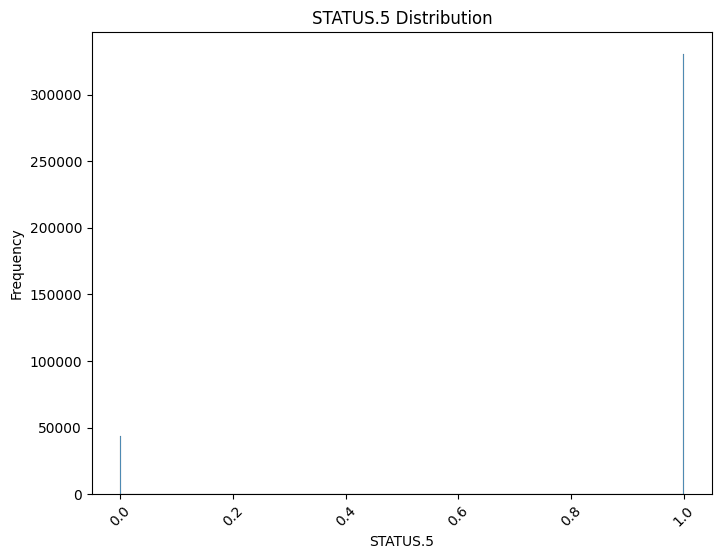

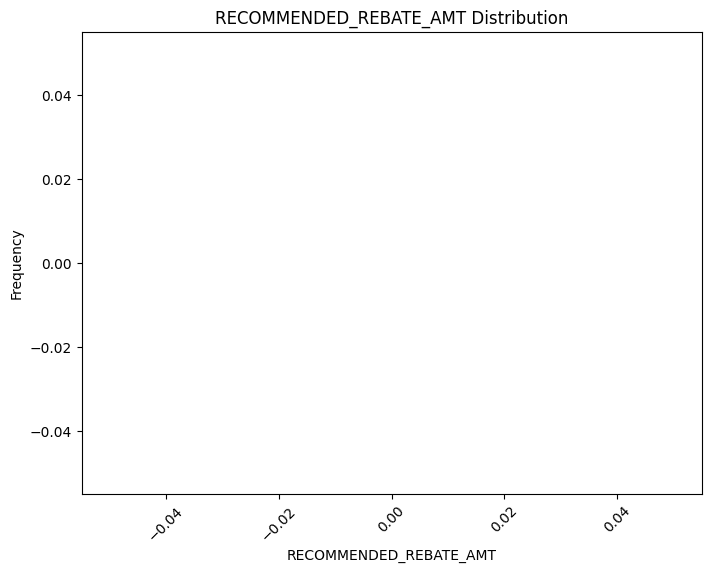

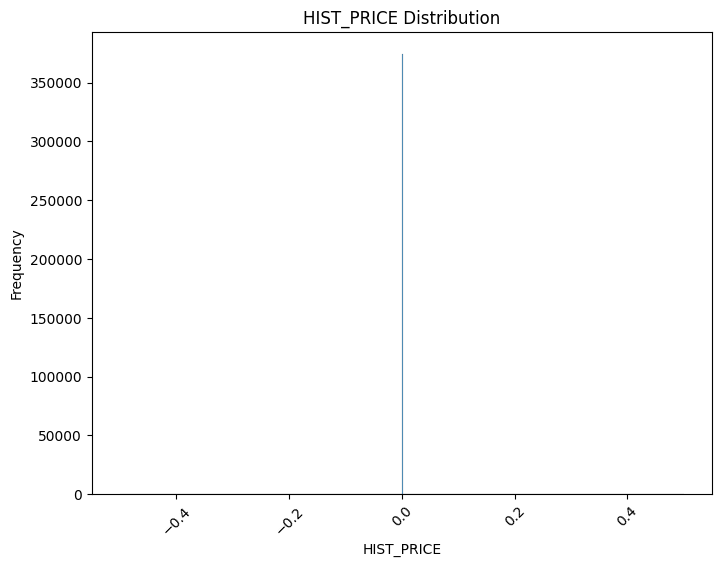

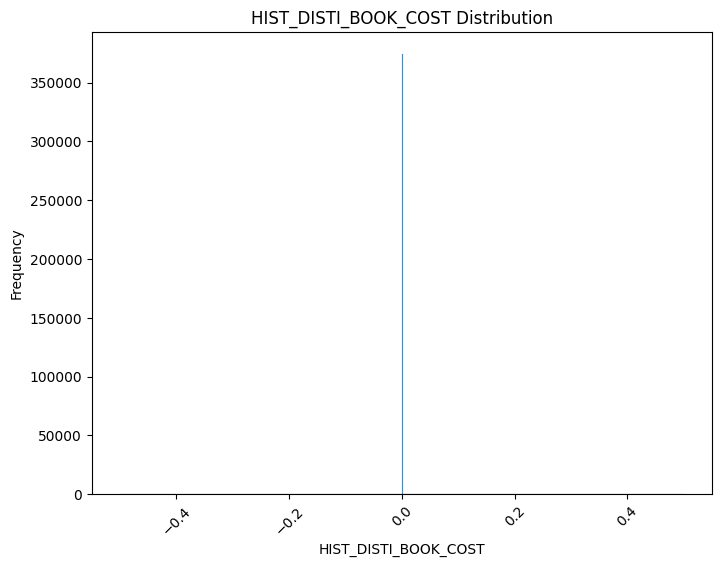

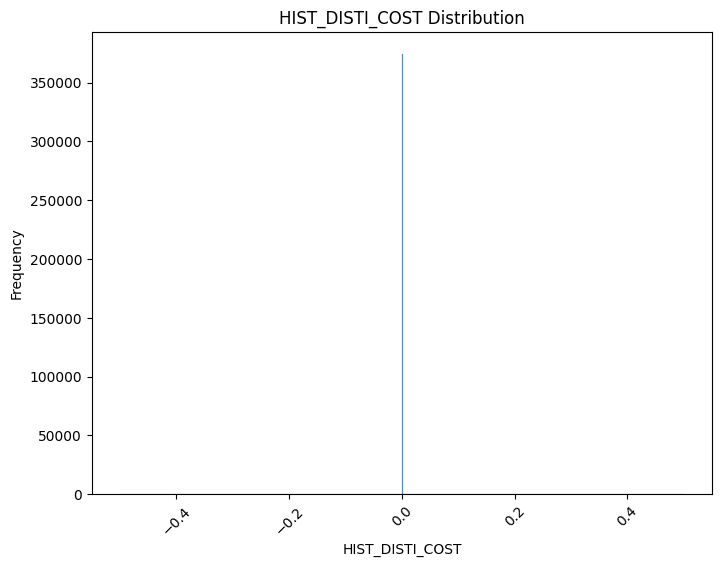

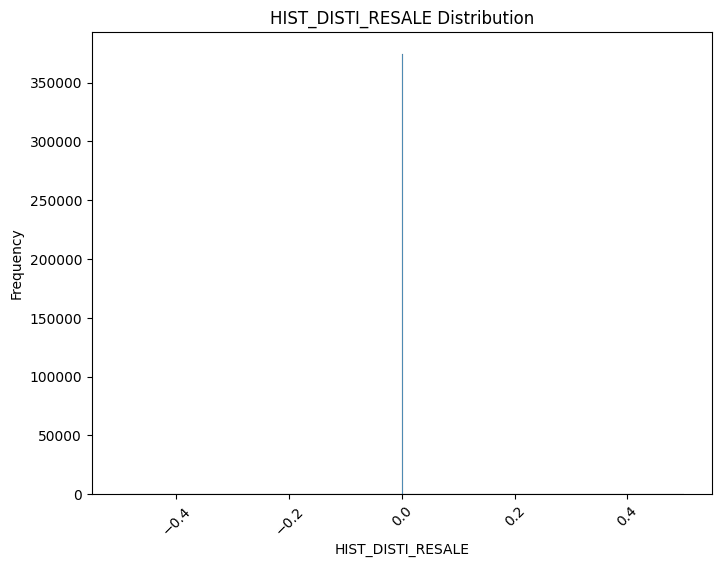

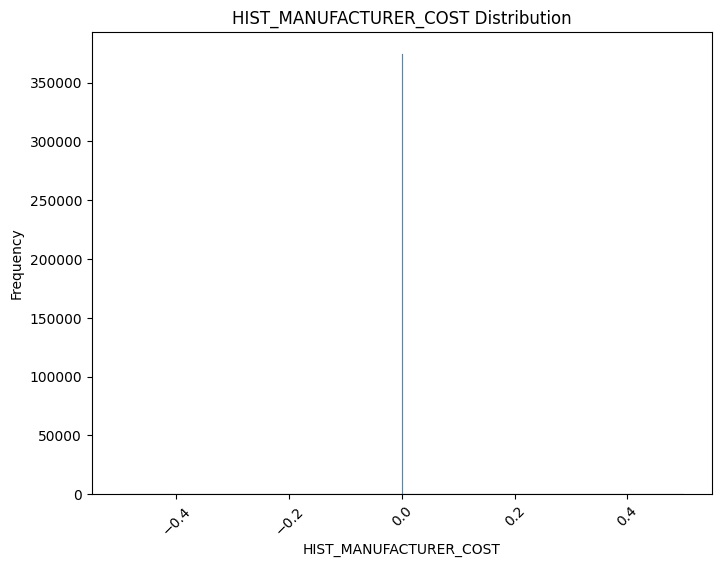

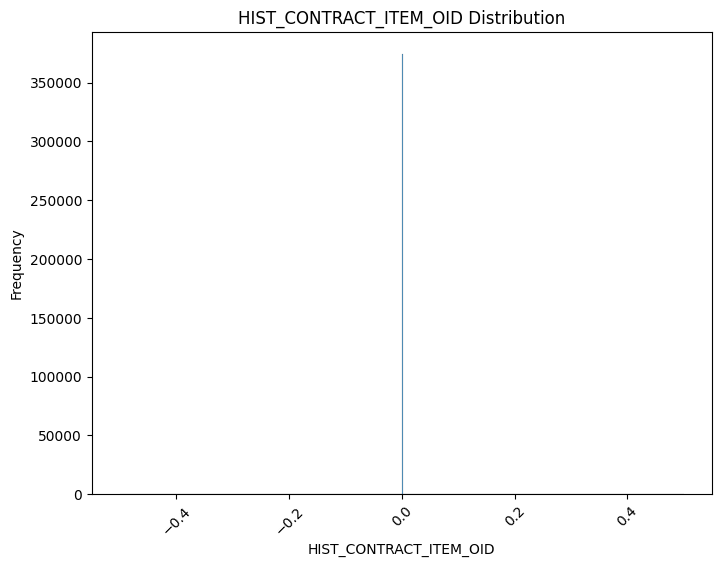

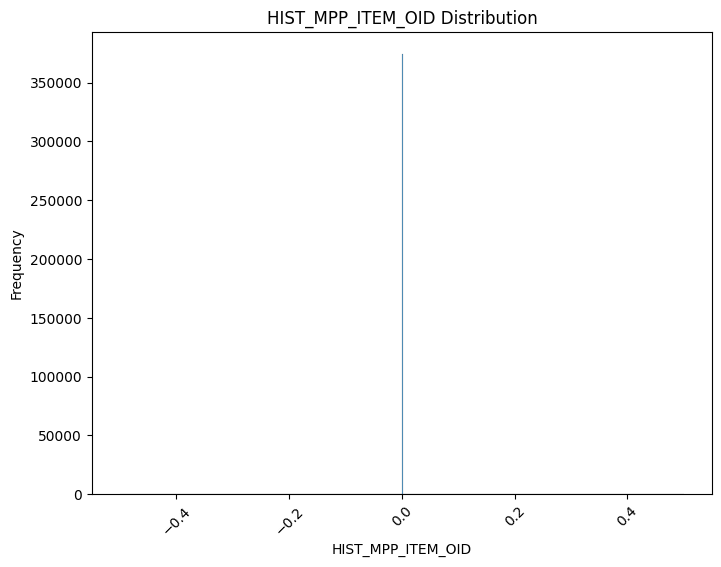

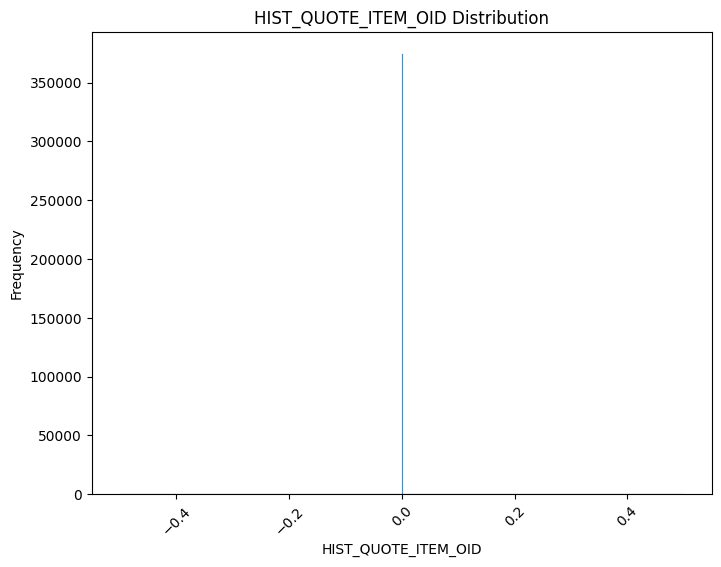

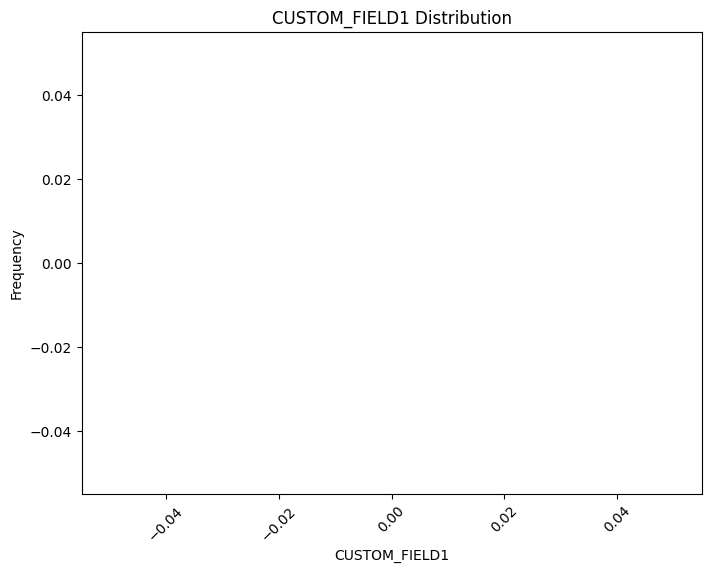

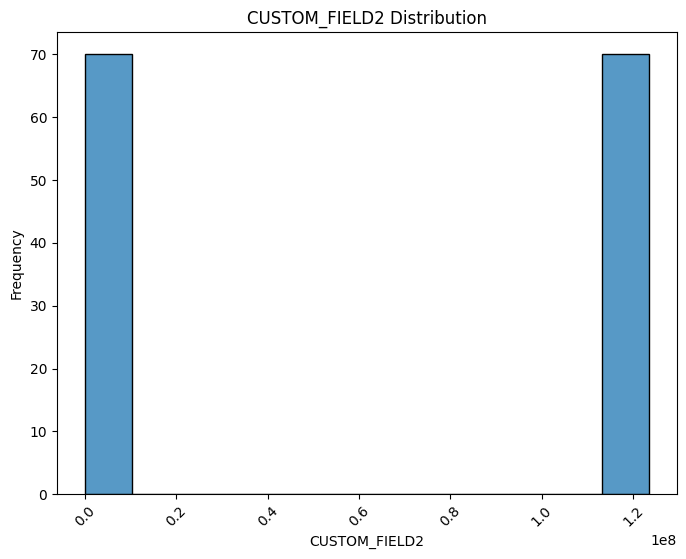

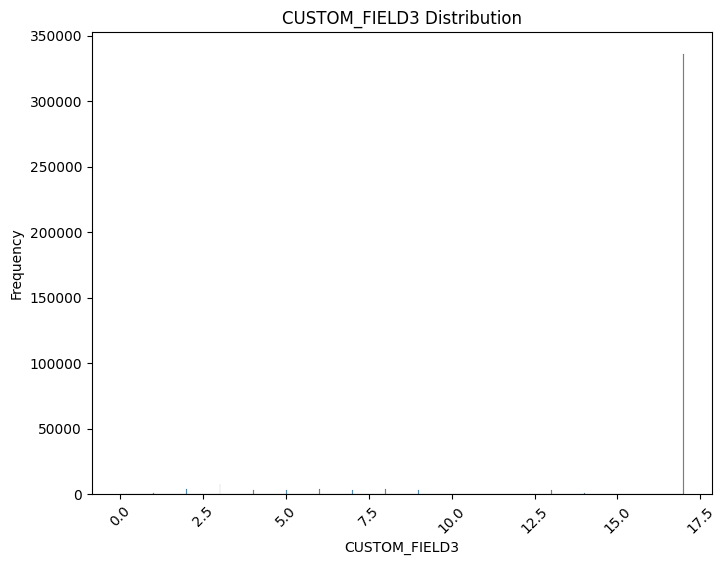

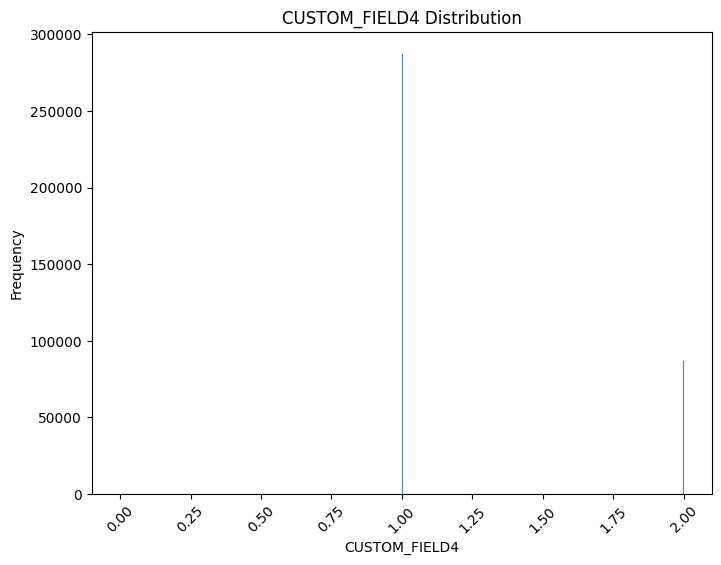

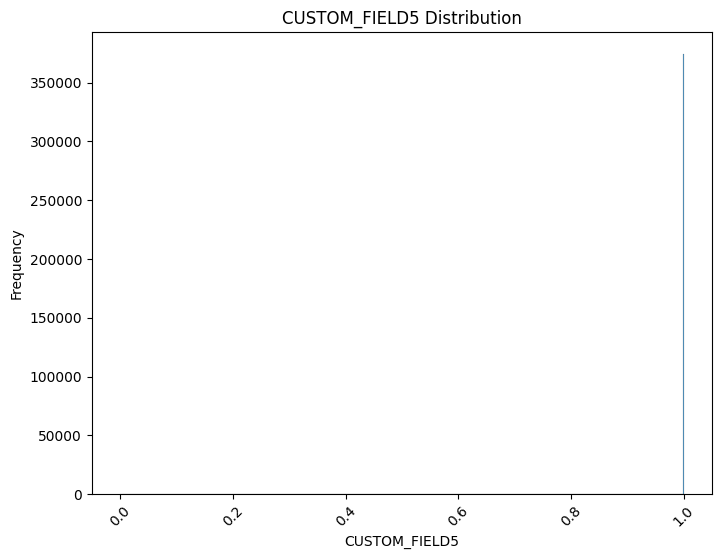

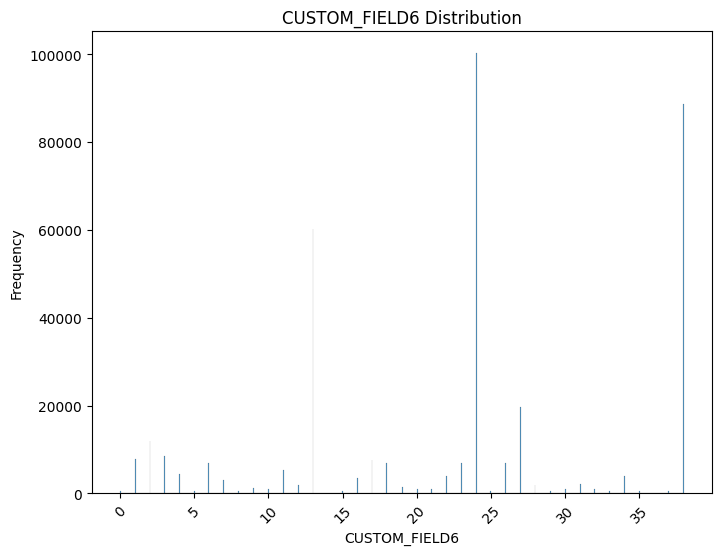

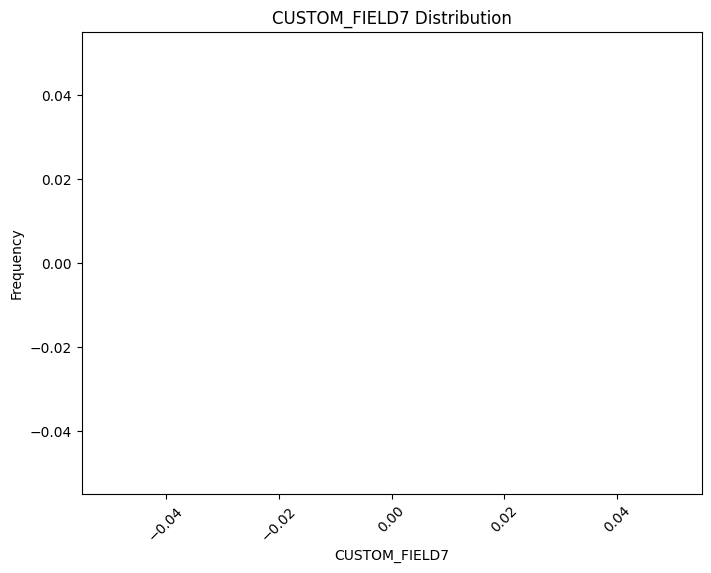

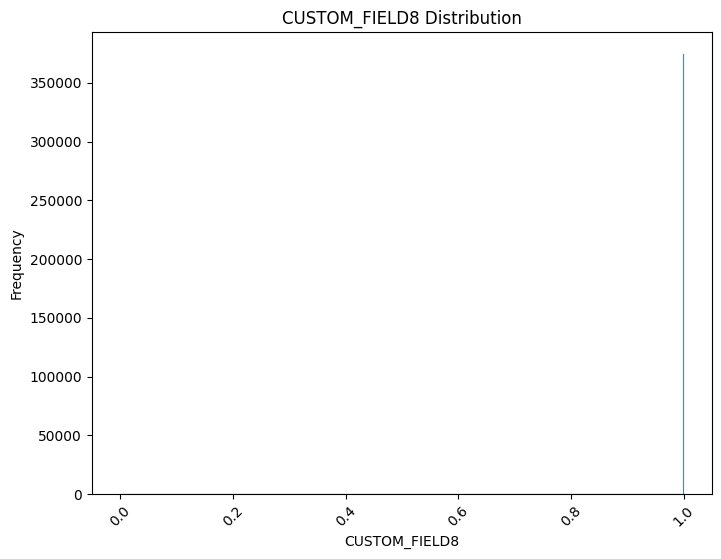

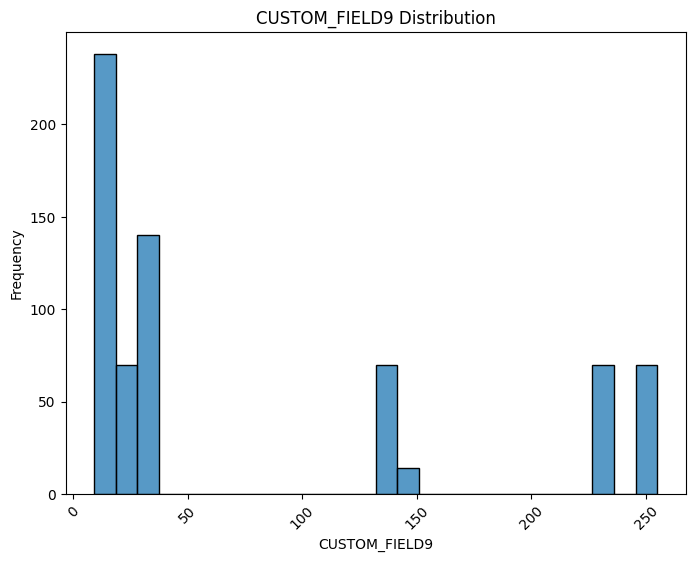

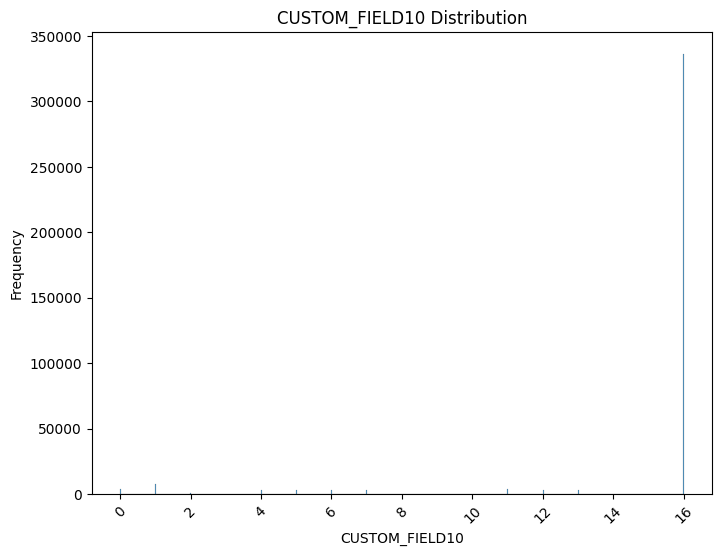

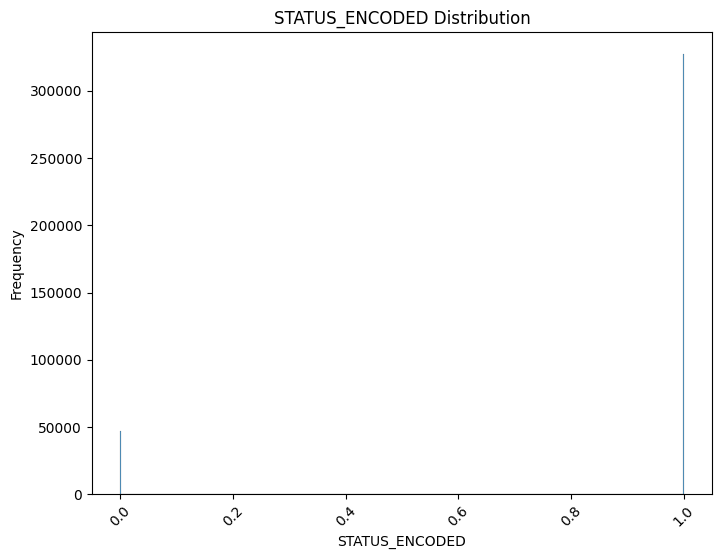

In [25]:
for attribute in df_quote_item_all_encoded.columns:
    fig, ax = plt.subplots(figsize=(8,6))
    non_na_count = df_quote_item[attribute].count()
    num_bins = int(np.ceil(np.sqrt(non_na_count)))
    sns.histplot(data=df_quote_item, x=df_quote_item[attribute], bins=num_bins)
    
    # show distribution of each value. Use z-score bins as an input for the histogram plot. Using this, we can understand more about the distribution of each attribute. 
    
    individuaL_x_values = df_quote_item[attribute].unique()
    ax.tick_params(axis='x', labelrotation = 45)
    ax.set_title(f"{attribute} Distribution")
    ax.set_xlabel(attribute)
    ax.set_ylabel("Frequency")
    #plt.clf()
    # using distribution and frequency it's easy to identify the outliers. an added part here might be to store those outliers and filter them out accordingly. 
    plt.rcParams.update({'figure.max_open_warning': 0})  # allows you to display all the charts at once 
    
plt.show()


In [26]:
# this part was unused. 
# this type of heatmap can be used to show relationship of variables on a standardized scale (z_scores)
attribute_means = quotes_data_matrix.mean()
attribute_stds = quotes_data_matrix.std()

z_scores= quotes_data_matrix.dropna(inplace=True)
z_scores = quotes_data_matrix.apply(stats.zscore)



'''
##  outlier z-score for the quotes dataset

zscore_quotes_data_matrix = quotes_data_matrix
zscore_quotes_data_matrix.dropna(inplace=True)

zscore_quotes_data_matrix = zscore_quotes_data_matrix.apply(lambda x: (x - x.mean()) / x.std())


outliers_quotes = zscore_quotes_data_matrix[(zscore_quotes_data_matrix > 2) | (zscore_quotes_data_matrix < -2)]

#outliers rows
outliers_quotes_rows = zscore_quotes_data_matrix[outliers_quotes.any(axis=1)]
outlier_neat_quotes = pd.concat([outliers_quotes_rows, outliers_quotes[outliers_quotes.any(axis=1)]], axis=1)


print("Outliers: ")
print(outlier_neat_quotes.head(10))

plt.hist(outlier_neat_quotes['COMPANY_SIZE'])
plt.xlabel('COMPANY_SIZE')
plt.ylabel('Frequency')
plt.title('HISTOGRAM OF COMPANY SIZE Z-scores')

# there's only one outlier so can't put histogram

plt.show()
'''

'\n##  outlier z-score for the quotes dataset\n\nzscore_quotes_data_matrix = quotes_data_matrix\nzscore_quotes_data_matrix.dropna(inplace=True)\n\nzscore_quotes_data_matrix = zscore_quotes_data_matrix.apply(lambda x: (x - x.mean()) / x.std())\n\n\noutliers_quotes = zscore_quotes_data_matrix[(zscore_quotes_data_matrix > 2) | (zscore_quotes_data_matrix < -2)]\n\n#outliers rows\noutliers_quotes_rows = zscore_quotes_data_matrix[outliers_quotes.any(axis=1)]\noutlier_neat_quotes = pd.concat([outliers_quotes_rows, outliers_quotes[outliers_quotes.any(axis=1)]], axis=1)\n\n\nprint("Outliers: ")\nprint(outlier_neat_quotes.head(10))\n\nplt.hist(outlier_neat_quotes[\'COMPANY_SIZE\'])\nplt.xlabel(\'COMPANY_SIZE\')\nplt.ylabel(\'Frequency\')\nplt.title(\'HISTOGRAM OF COMPANY SIZE Z-scores\')\n\n# there\'s only one outlier so can\'t put histogram\n\nplt.show()\n'

#### Box Plots 

##### Heatmaps in comments

         OID  OBSOLETE_FLAG  CUSTOMER_OID            DISPLAY_NAME  \
0      11097              0       2954427  Netscout Systems, Inc.   
1      10455              0       2954427  Netscout Systems, Inc.   
2      10468              0       2972311                IO NODES   
3      10527              0       2972311                IO NODES   
4      10396              0       2988243        Alpha Beta Gamma   
...      ...            ...           ...                     ...   
44344  45506              0       1339006                   kevin   
44345  45590              0       1339006                   kevin   
44346  45828              0       1339006                   kevin   
44347  45829              0       1339006                   kevin   
44348  45830              0       1339006                   kevin   

       SALES_CHANNEL  DISTRIBUTOR_OID  NAME  QUOTE_STATUS_OID  PREP_COMPLETE  \
0                  1                1    28                 1              1   
1          

TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

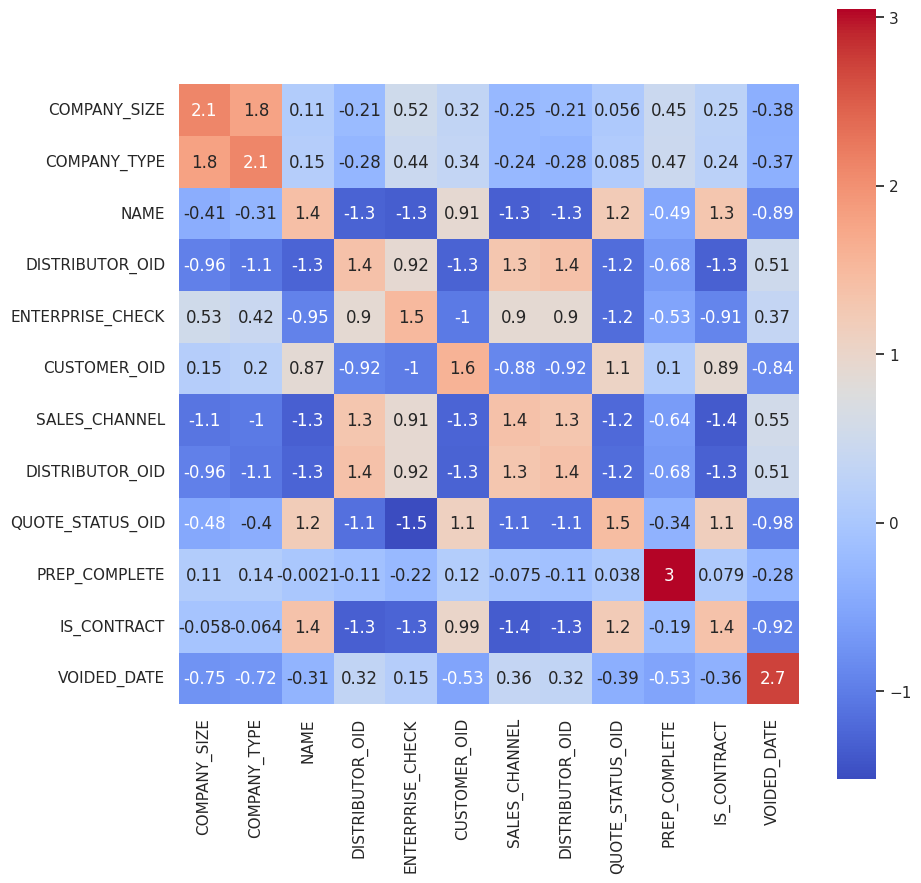

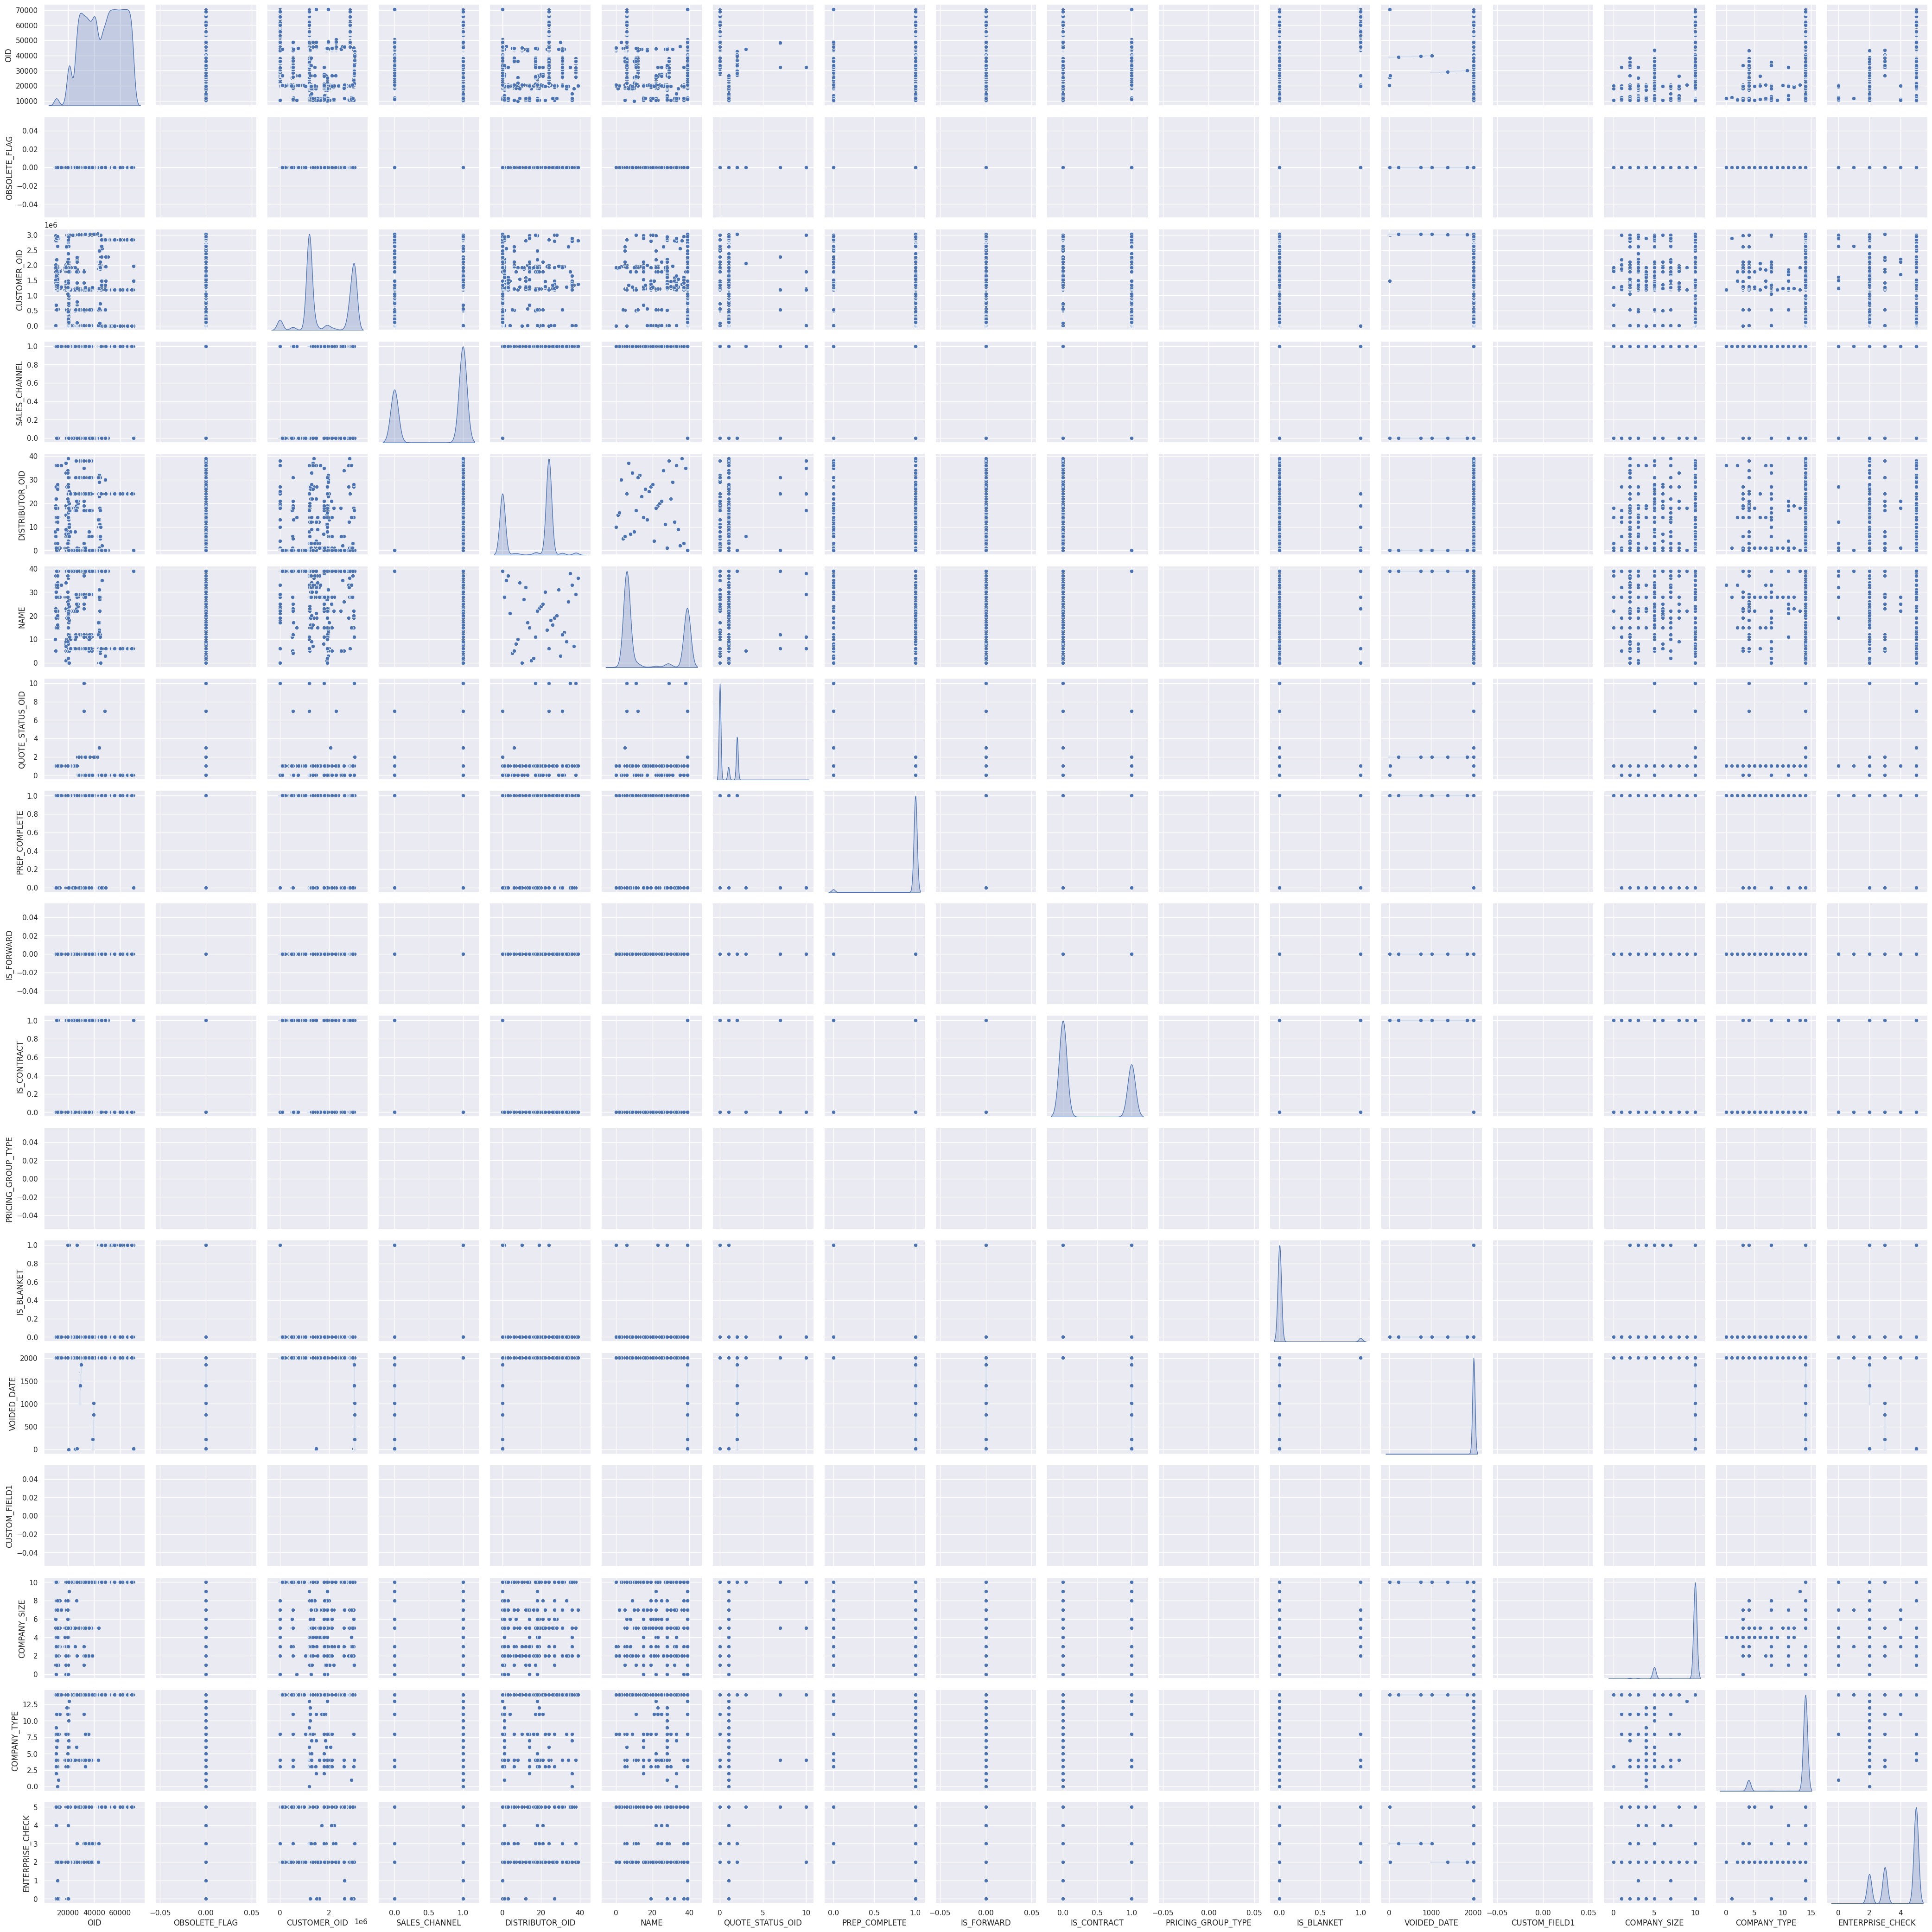

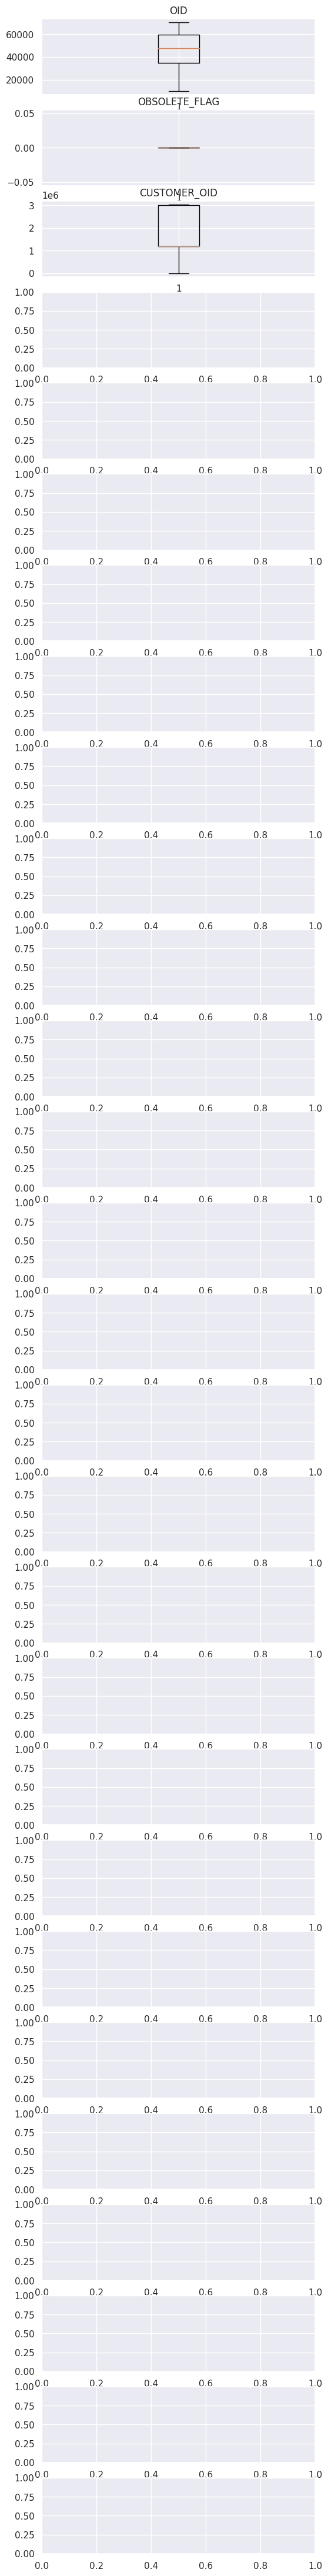

In [27]:
# this was an attempt to have the z-scores in a heatmap, create a pairplot, and also make box-plots. Based on the distribution and the format of the data however, the visualizations do not appear as useful as they would be with real customer data. 
sns.set()
sns.heatmap(z_scores, annot=True, cmap='coolwarm', square=True)
sns.pairplot(df_quotes_encoded, diag_kind="kde")
print(df_quotes_encoded)
fig, ax = plt.subplots(nrows=len(df_quotes_encoded.columns), ncols=1, figsize=(6, 2 * len(df_quotes_encoded.columns)))
for i, col in enumerate(df_quotes_encoded.columns):
    ax[i].boxplot(df_quotes_encoded[col])
    ax[i].set_title(col)
plt.tight_layout()
plt.style.use('seaborn-whitegrid')
print("true")
plt.show()

### PCA Analysis

In [28]:
from sklearn.preprocessing import StandardScaler

#define features based on most correlated df_quote_item values
df_quote_item_encoded = df_quote_item_encoded
## merge dataframes on OID and add better features
features=['OID','PART_OID', 'QUANTITY_REQUESTED', 'DISTI_REBATE_AMT', 'ITEM_NUM', 'REBATE_AMT']

# handle missing values
#df_quote_item_encoded.dropna(subset=['STATUS_ENCODED'], inplace=True)
df_quote_item_encoded.fillna(999, inplace=True) # here will filled in the NA vaulues with 999 
print(df_quote_item_encoded['ACTUAL_STATUS'].str.count('Approved').sum())

x = df_quote_item_encoded.loc[:, features].values # features
y= df_quote_item_encoded.loc[:,['ACTUAL_STATUS']].values # target variable
print(df_quote_item_encoded['ACTUAL_STATUS'].str.count('Approved').sum())

x = StandardScaler().fit_transform(x)
print(df_quote_item_encoded['ACTUAL_STATUS'].str.count('Approved').sum())
print(df_quote_item_encoded['ACTUAL_STATUS'].head(300000))

47110
47110
47110
0         Other
1         Other
2         Other
3         Other
4         Other
          ...  
299995    Other
299996    Other
299997    Other
299998    Other
299999    Other
Name: ACTUAL_STATUS, Length: 300000, dtype: object


Text(0, 0.5, 'cumulative explained variance')

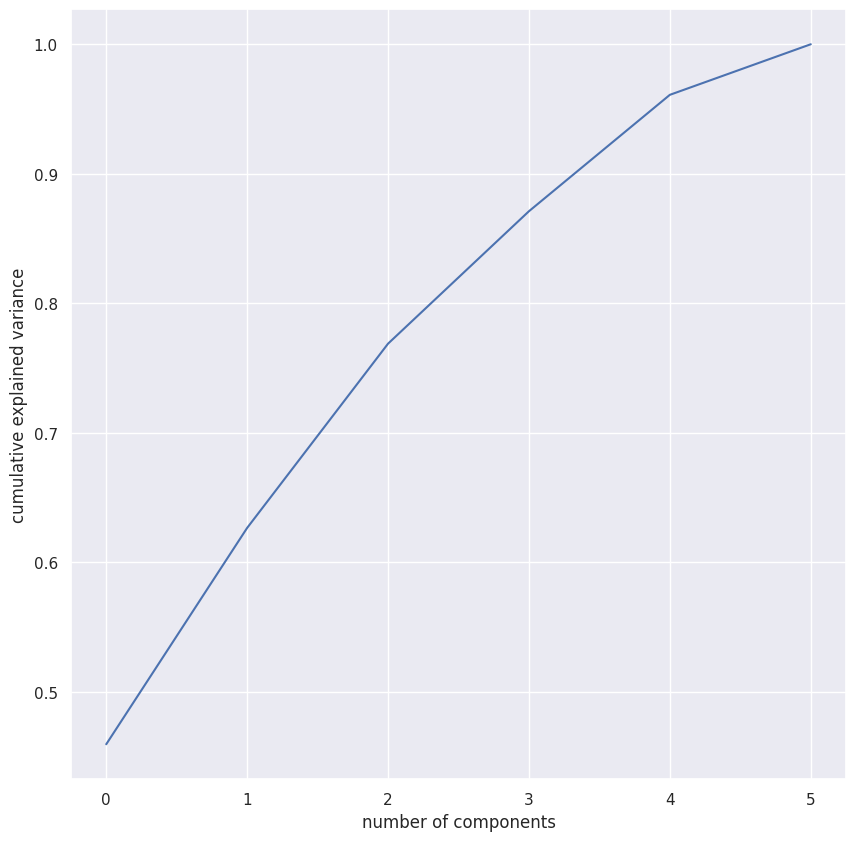

In [29]:
# find how many components explain the variance. Recall that each component is made up of a certain amount of attributes. 
from sklearn.decomposition import PCA
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

# usually select the amount of features that calls for 90+% of variance. 

#### 4 Component PCA Analysis

In [30]:
pca = PCA(n_components=4) # 4 components because it above 90% but not at 100%. 
principalComponents = pca.fit_transform(x)

df_principal = pd.DataFrame(data=principalComponents, columns=['principal component #1','principal component #2', 'principal component #3','principal component #4'])
df_final_principal = pd.concat([df_principal, df_quote_item_encoded[['ACTUAL_STATUS']]], axis=1)
print("done")

done


0         False
1         False
2         False
3         False
4         False
          ...  
374299    False
374300    False
374301    False
374302    False
374303    False
Name: ACTUAL_STATUS, Length: 374304, dtype: bool
0         True
1         True
2         True
3         True
4         True
          ... 
374299    True
374300    True
374301    True
374302    True
374303    True
Name: ACTUAL_STATUS, Length: 374304, dtype: bool


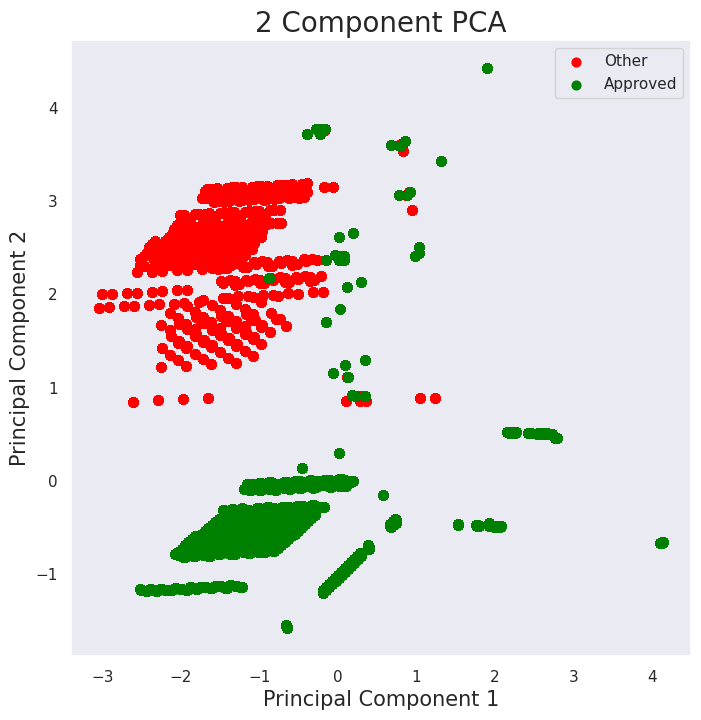

In [31]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 Component PCA', fontsize=20)

ACTUAL_STATUS = ['Approved', 'Other']
colors=['red', 'green'] # had to switch these around afterwards, because the colors were not matching up properly. 

#plt.scatter(df_final_principal[:, 0], df_final_principal[:, 1], )

for status, color in zip(ACTUAL_STATUS, colors):
    saved_indices = (df_final_principal['ACTUAL_STATUS'] == status)
    print(saved_indices)
    ax.scatter(df_final_principal.loc[saved_indices, 'principal component #1'], df_final_principal.loc[saved_indices, 'principal component #2'], c=color, s=40)
ax.legend(['Other', 'Approved']) #switch cause incorrect order first time
# other is referring to quotes which had workflow status set as in progress or rejected.  
ax.grid()    



# we are only able to visualize 2 PCA's on the scatterplot. 


[0.45954915 0.167024   0.14225908 0.10224955]
                    principal component #1  principal component #2  \
OID                               0.520268               -0.017660   
PART_OID                         -0.155715                0.880522   
QUANTITY_REQUESTED               -0.383694               -0.314262   
DISTI_REBATE_AMT                 -0.498769               -0.223840   
ITEM_NUM                         -0.436197               -0.019600   
REBATE_AMT                        0.344696               -0.274082   

                    principal component #3  principal component #4  
OID                              -0.126738                0.171882  
PART_OID                          0.408014                0.019247  
QUANTITY_REQUESTED                0.401942                0.713070  
DISTI_REBATE_AMT                  0.208233               -0.363746  
ITEM_NUM                         -0.326339               -0.363848  
REBATE_AMT                        0.711370       

([<matplotlib.patches.Wedge at 0x7fb79e129b10>,
 [Text(-0.09512648248825806, 1.095879077421141, 'principal component #1'),
  Text(-0.7854377182107304, -0.7701218025818523, 'principal component #2'),
  Text(0.34623052445573216, -1.0440902374484253, 'principal component #3'),
  Text(1.026049664335851, -0.3965124037357314, 'principal component #4')],
 [Text(-0.05188717226632258, 0.5977522240478951, '52.8%'),
  Text(-0.42842057356948926, -0.4200664377719194, '19.2%'),
  Text(0.18885301333949026, -0.5695037658809592, '16.3%'),
  Text(0.5596634532741005, -0.21627949294676255, '11.7%')])

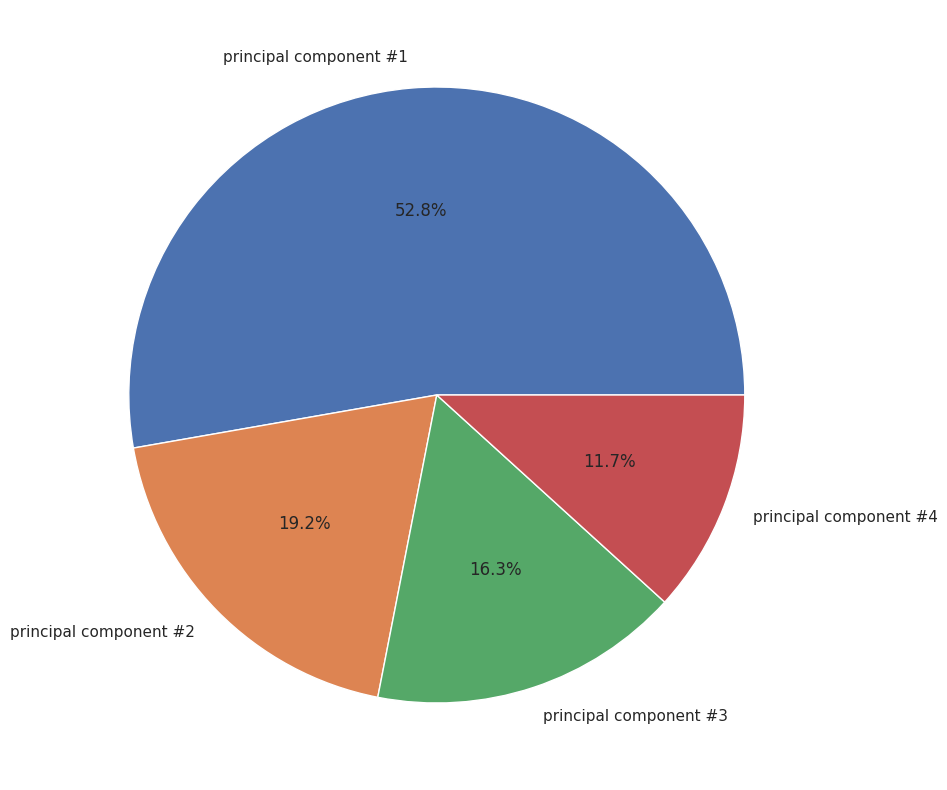

In [32]:
print(pca.explained_variance_ratio_) # high variance in each PCA component is also a measure of how well it is maintaining a dataset. 
loadings = pca.components_
importance = np.abs(loadings).sum()
print(pd.DataFrame(loadings.T, columns=['principal component #1', 'principal component #2','principal component #3', 'principal component #4' ], index=features))

pc1 = pca.explained_variance_ratio_[0] * 100
pc2 = pca.explained_variance_ratio_[1] * 100 
pc3  =  pca.explained_variance_ratio_[2] * 100 
pc4 =  pca.explained_variance_ratio_[3] * 100 

print(f"\nThe first component explains {pc1}% of variance\nThe second principal component explains {pc2}% of variance\nThe third principal component explains {pc3}% of variance\nThe fourth principal component explains {pc4}% of variance\nTotal Variance Explained:", pc1 + pc2 + pc3 + pc4,"%")

plt.pie([pc1, pc2, pc3, pc4], labels=['principal component #1', 'principal component #2','principal component #3', 'principal component #4'], autopct='%1.1f%%')

# the first four principal components are preserving 87% of the original dataset. 

### 2 Component Logistic Regression PCA Analysis

In [33]:

from sklearn.model_selection import train_test_split
X = df_quote_item_encoded.loc[:, features].values
y= df_quote_item_encoded.loc[:,['STATUS_ENCODED']].values
print(df_quote_item_encoded['STATUS_ENCODED'])

X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), test_size = 0.25, random_state = 0)

explained_variance = pca.explained_variance_ratio_
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

from sklearn.linear_model import LogisticRegression  

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

0         1
1         1
2         1
3         1
4         1
         ..
374299    1
374300    1
374301    1
374302    1
374303    1
Name: STATUS_ENCODED, Length: 374304, dtype: int64


LogisticRegression(random_state=0)

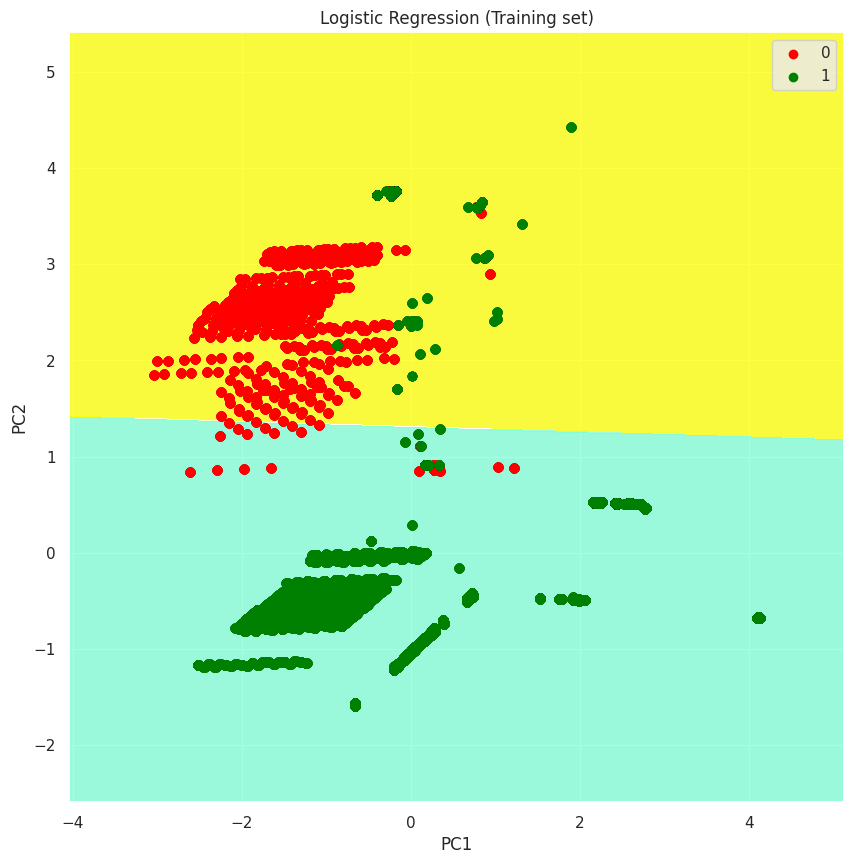

accuracy:  0.959968367957596


In [34]:

# this was tested from a geeksforgeeks tutorial. Same logic was applied here just to see if there would be any differences in the visualizations. 
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap
y_pred = classifier.predict(X_test)



cm = confusion_matrix(y_test, y_pred)


X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') 
plt.ylabel('PC2') 
plt.legend()


plt.show() #1 success, 2 other

print("accuracy: ", accuracy_score(y_test, y_pred))



In [35]:
print(pca.explained_variance_ratio_) # the first two principal components are preserving 62% of the original dataset. 
loadings = pca.components_
importance = np.abs(loadings).sum()
print(pd.DataFrame(loadings.T, columns=['principal component #1', 'principal component #2'], index=features))

pc1 = pca.explained_variance_ratio_[0] * 100
pc2 = pca.explained_variance_ratio_[1] * 100 

print(f"\nThe first component explains {pc1}% of variance\nThe second principal component explains {pc2}% of variance", pc1 + pc2,"%")

[0.45949775 0.16701913]
                    principal component #1  principal component #2
OID                               0.520373               -0.016255
PART_OID                         -0.155952                0.878987
QUANTITY_REQUESTED               -0.383733               -0.315560
DISTI_REBATE_AMT                 -0.499068               -0.224565
ITEM_NUM                         -0.436352               -0.017510
REBATE_AMT                        0.343755               -0.277133

The first component explains 45.94977500199063% of variance
The second principal component explains 16.701912895219817% of variance 62.65168789721045 %
